<div class="alert alert-info" style="background-color: white; color: black;">
    <h1> Studi Analisis Incomplete Journey: Mengoptimalkan Pendapatan dan Validitas Data Operasional TransJakarta </h1>
</div>

# Latar Belakang

Pada awal tahun 2023, TransJakarta, sebagai tulang punggung transportasi publik di Jakarta, menghadapi tantangan finansial yang signifikan. Meski jumlah penumpang meningkat pasca-pandemi, proyeksi pendapatan tetap lebih rendah dari target. Tim Keuangan menemukan anomali: sekitar 3,55% perjalanan tercatat sebagai "incomplete journey" dengan data tap-out yang hilang pada bulan April 2023. Meski terlihat kecil, selisih ini menyebabkan potensi kehilangan pendapatan sebesar Rp 3.573.250 pada periode analisis.

Incomplete journeys tidak hanya berdampak pada pendapatan, tetapi juga menimbulkan tantangan yang lebih luas. Ketidaklengkapan data perjalanan mengganggu akurasi analisis operasional, seperti perencanaan rute, jadwal armada, dan pengelolaan kepadatan penumpang. Hal ini juga berpotensi merusak kepercayaan penumpang terhadap sistem, terutama jika mereka menghadapi kebingungan atau sanksi akibat kegagalan tap-out yang bukan kesalahan mereka. Seorang manajer operasional Transjakarta menyatakan, “Setiap rupiah penting untuk layanan publik. Kita perlu memahami mengapa ribuan penumpang kita ‘menghilang’. Ini bukan sekadar masalah pendapatan, tapi juga akurasi data untuk perencanaan kota.” Pernyataan ini mencerminkan urgensi untuk tidak hanya meminimalkan kerugian finansial, tetapi juga memastikan data yang andal untuk mendukung visi Jakarta sebagai kota cerdas.

Analisis awal menunjukkan bahwa incomplete journeys mungkin dipengaruhi oleh berbagai faktor, seperti kegagalan teknologi pada perangkat tap-out, desain halte yang membingungkan, perilaku penumpang, atau perbedaan operasional antar-koridor dan tipe armada. Hasil uji chi-square lebih lanjut mengkonfirmasi bahwa usia penumpang, tipe armada, dan koridor memiliki pengaruh signifikan terhadap fenomena ini, sementara variabel lain seperti jenis kelamin atau waktu perjalanan tidak menunjukkan korelasi yang kuat. Dengan konsentrasi masalah pada koridor tertentu (misalnya, JAK.18 dan JAK.46, berdasarkan data sebelumnya) dan kelompok usia tertentu, terdapat peluang untuk intervensi yang terfokus. Namun, tanpa pemahaman mendalam dan tindakan strategis, incomplete journeys dapat terus melemahkan efisiensi sistem, mengurangi pendapatan, dan menghambat kemampuan Transjakarta untuk memberikan layanan yang optimal.

**Tujuan Utama:**

- Mengidentifikasi pola spasial dan temporal dari incomplete journey
- Mengungkap faktor-faktor demografis dan perilaku yang berkontribusi
- Menghitung dampak finansial dari perjalanan tidak lengkap
- Merumuskan strategi berbasis data untuk mengurangi incomplete journey

Dengan temuan ini, analisis data Anda bukan sekadar angka-angka di spreadsheet, tetapi menjadi narasi tentang bagaimana perilaku penumpang, desain sistem, dan infrastruktur kota saling terhubung. Ini adalah kesempatan untuk menunjukkan bahwa dalam big data transportasi publik, terkadang justru pola "ketidakhadiran" data yang memberikan insight paling berharga. Rekomendasi berbasis data yang dihasilkan akan mendukung pengembangan sistem transportasi yang lebih responsif terhadap pola mobilitas urban kontemporer.


# Pernyataan Masalah

Peneliti ingin mengetahui mengenai:
- Faktor apa saja yang memiliki korelasi signifikan dengan tingginya tingkat incomplete journey pada koridor dan waktu tertentu?
- Apakah terdapat pola demografis atau perilaku pengguna yang dapat memprediksi kecenderungan terjadinya 'incomplete journey'?
- Bagaimana karakteristik spasial dan temporal dari 'incomplete journey'?
- Intervensi startegis apa yang paling direkomendasikan untuk mengurangi 'incomplete journey'?

# Data

untuk dapat menjawab rumusan masalah, perlu dilakukan analisis data transaksi transjakarta selama bulan April 2023. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1p7f4a2tUP1Ek159BUVA2bFkdQUklOe7h?usp=share_link).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, kstest, shapiro, chi2_contingency, mannwhitneyu, ttest_ind

In [6]:
# import data csv
df = pd.read_csv('Transjakarta.csv')
df

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName  direction tapInStops  ...  \
0                         Matraman Baru - Ancol        1.0     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan        0.0    B01963P  ...   
2                            Pantai Maju - Kota        0.0    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK        0.0    B05587P  ...   
4                         Tanjung Priok - Pluit        0.0     P00239  ...   
...                                         ...        ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi        1.0     P00261  ...   
37896                    Pinang Ranti - Pramuka        1.0     P00064  ...   
37897                      Cibubur - Balai Kota        1.0    B02873P  ...   
37898               Tanah Abang - Jembatan Lima        1.0    B02505P  ...   
37899                         Ciledug - Tendean        0.0     P00001  ...   

      tapInStopsLon  stopStartSeq            tapInTime  tapOutStops  \
0         106.84402             7  2023-04-03 05:21:44       P00253   
1         106.83302            13  2023-04-03 05:42:44      B03307P   
2         106.81435            38  2023-04-03 05:59:06      B04962P   
3         106.93526            23  2023-04-03 05:44:51      B03090P   
4         106.88900             5  2023-04-03 06:17:35       P00098   
...             ...           ...                  ...          ...   
37895     106.82309             2  2023-04-21 18:18:37       P00228   
37896     106.88116             1  2023-04-18 21:52:31       P00179   
37897     106.81676            12  2023-04-04 10:29:47      B00226P   
37898     106.80954            33  2023-04-15 19:59:26      B01787P   
37899     106.74786             2  2023-04-12 21:08:12       P00106   

             tapOutStopsName tapOutStopsLat tapOutStopsLon  stopEndSeq  \
0                    Tegalan      -6.203101      106.85715        12.0   
1        Sampoerna Strategic      -6.217152      106.81892        21.0   
2      Simpang Kunir Kemukus      -6.133731      106.81475        39.0   
3          Raya Penggilingan      -6.183068      106.93194        29.0   
4           Kali Besar Barat      -6.135355      106.81143        15.0   
...                      ...            ...            ...         ...   
37895                 SMK 57      -6.290967      106.82365        13.0   
37896           Pinang Ranti      -6.291075      106.88634

## Data Dictionary

Dataset ini berisi informasi peralanan pengguna secara lengkap, mulai dari tap-in hingga tap-out, serta data identitas pengguna yang terdiri atas 22 kolom utama sebagai berikut:

| Nama Kolom | Penjelasan |
|----|----|
| `transID` | Unique transaction id for every transaction
`payCardID` | Customers main identifier. The card customers use as a ticket for entrance and exit.
`payCardBank` | Customers card bank issuer name
`payCardName` | Customers name that is embedded in the card.
`payCardSex` | Customers sex that is embedded in the card
`payCardBirthDate` | Customers birth year
`corridorID` | Corridor ID / Route ID as key for route grouping.
`corridorName` | Corridor Name / Route Name contains Start and Finish for each route.
`direction` | 0 for Go, 1 for Back. Direction of the route.
`tapInStops` | Tap In (entrance) Stops ID for identifying stops name
`tapInStopsName` | Tap In (entrance) Stops Name where customers tap in.
`tapInStopsLat` | Latitude of Tap In Stops
`tapInStopsLon` | Longitude of Tap In Stops
`stopStartSeq` | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
`tapInTime` | Time of tap in. Date and time
`tapOutStops` | Tap Out (Exit) Stops ID for identifying stops name
`tapOutStopsName` | Tap out (exit) Stops Name where customers tap out.
`tapOutStopsLat` | Latitude of Tap Out Stops
`tapOutStopsLon` | Longitude of Tap Out Stops
`stopEndSeq` | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
`tapOutTime` | Time of tap out. Date and time
`payAmount` | The number of what customers pay. Some are free. Some not.

## Data Understanding dan Preprocessing

Sebelum melakukan analisis, perlu diketahui lebih detail terkait distribusi data, anomali dan outliers data. Setiap langkah yang akan dilakukan, akan disertai dengan justifikasi, baik secara *domain knowledge*, maupun statistik. 

In [7]:
# Pertama, dilakukan pengecekan terhadap seluruh tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [8]:
# Menghitung jumlah duplikat data
df.duplicated().sum()

np.int64(0)

Secara keseluruhan, dataset ini terdiri dari 22 kolom dan 37.900 baris, tanpa adanya nilai duplikat. Namun, terdapat beberapa kolom dengan tipe data yang kurang sesuai, sehingga untuk mempermudah proses analisis, perlu dilakukan penyesuaian tipe data. contohnya pada data yang mengandung date dan time yang seharusnya bertipe DateTime.

Kolom `direction`, `payCardID`, `tapInStopsLon`, `tapInStopsLat`, `tapOutStopsLon`, dan `tapOutStopsLat` berisi nilai-nilai yang, meskipun bertipe data numerik, sebenarnya berfungsi sebagai data kategorik atau identifikasi. Untuk mempermudah analisis dan interpretasi, disarankan untuk mengubah tipe data kolom-kolom tersebut menjadi tipe 'Object' atau 'String', sesuai dengan peran fungsionalnya dalam dataset.

In [9]:
# ubah tipe kolom direction ke tipe object
df['direction'] = df['direction'].astype('object')

In [10]:
# ubah tipe kolom payCardID ke tipe object
df['payCardID'] = df['payCardID'].astype('object')

In [11]:
# ubah tipe kolom tapInStopsLon ke tipe object
df['tapInStopsLon'] = df['tapInStopsLon'].astype('object')

In [12]:
# ubah tipe kolom tapInStopsLat ke tipe object
df['tapInStopsLat'] = df['tapInStopsLat'].astype('object')

In [13]:
# ubah tipe kolom tapOutStopsLon ke tipe object
df['tapOutStopsLon'] = df['tapOutStopsLon'].astype('object')

In [14]:
# ubah tipe kolom tapOutStopsLat ke tipe object
df['tapOutStopsLat'] = df['tapOutStopsLat'].astype('object')

Kolom `tapInTime` dan`tapOutTime` berisi nilai yang menggambarkan waktu. Untuk mempermudah analisis dan interpretasi, disarankan untuk mengubah tipe data kolom-kolom tersebut menjadi tipe 'DateTime' sesuai dengan peran fungsionalnya dalam dataset.

In [15]:
# ubah tipe kolom tapInTime ke tipe datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapInTime']

0       2023-04-03 05:21:44
1       2023-04-03 05:42:44
2       2023-04-03 05:59:06
3       2023-04-03 05:44:51
4       2023-04-03 06:17:35
                ...        
37895   2023-04-21 18:18:37
37896   2023-04-18 21:52:31
37897   2023-04-04 10:29:47
37898   2023-04-15 19:59:26
37899   2023-04-12 21:08:12
Name: tapInTime, Length: 37900, dtype: datetime64[ns]

In [16]:
# ubah tipe kolom tapOutTime ke tipe datetime
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['tapOutTime']

0       2023-04-03 06:00:53
1       2023-04-03 06:40:01
2       2023-04-03 06:50:55
3       2023-04-03 06:28:16
4       2023-04-03 06:57:03
                ...        
37895   2023-04-21 19:55:49
37896   2023-04-18 22:28:22
37897   2023-04-04 13:27:25
37898   2023-04-15 20:27:50
37899   2023-04-12 21:34:53
Name: tapOutTime, Length: 37900, dtype: datetime64[ns]

Kolom `payCardBirthDate` berisi nilai yang menggambarkan tahun kelahiran. Untuk mempermudah analisis dan interpretasi, disarankan untuk mengubah tipe data kolom tersebut menjadi tipe 'Integer', sesuai dengan peran fungsionalnya dalam dataset, mengingat data hanya mencakup informasi tahun.

In [17]:
# ubah tipe kolom payCardBirthDate ke tipe int agar tetap menjadi tahun
df['payCardBirthDate'] = df['payCardBirthDate'].astype(int)
df['payCardBirthDate']

0        2008
1        1997
2        1992
3        1978
4        1982
         ... 
37895    2004
37896    1974
37897    1976
37898    1976
37899    1985
Name: payCardBirthDate, Length: 37900, dtype: int64

In [18]:
# Kedua, dilakukan pengecekan terhadap distribusi data
display(df.describe(), df.describe(include='object'))

payCardBirthDate  stopStartSeq                      tapInTime  \
count      37900.000000  37900.000000                          37900   
mean        1990.089314     13.572480  2023-04-16 08:05:29.462770688   
min         1946.000000      0.000000            2023-04-01 06:22:27   
25%         1982.000000      4.000000            2023-04-10 09:02:15   
50%         1990.000000     10.000000     2023-04-16 17:38:42.500000   
75%         2001.000000     19.000000     2023-04-22 05:12:02.500000   
max         2012.000000     68.000000            2023-04-30 21:55:41   
std           13.051482     12.237623                            NaN   

         stopEndSeq                     tapOutTime     payAmount  
count  36556.000000                          36556  36893.000000  
mean      21.219909  2023-04-16 09:19:44.697997824   2699.712683  
min        1.000000            2023-04-01 07:27:31      0.000000  
25%       11.000000  2023-04-10 10:18:06.249999872      0.000000  
50%       18.000000            2023-04-16 19:03:14   3500.000000  
75%       29.000000  2023-04-21 23:26:00.249999872   3500.000000  
max       77.000000            2023-04-30 23:23:18  20000.000000  
std       13.800689                            NaN   4212.225592

transID        payCardID payCardBank         payCardName  \
count            37900            37900       37900               37900   
unique           37900             2000           6                1993   
top     EIIW227B8L34VB  180062659848800         dki  Fathonah Saefullah   
freq                 1               40       18743                  80   

       payCardSex corridorID          corridorName  direction tapInStops  \
count       37900      36643                 35970    37900.0      36687   
unique          2        221                   216        2.0       2570   
top             F         1T  Cibubur - Balai Kota        1.0     P00170   
freq        20157        400                   391    18974.0        236   

       tapInStopsName  tapInStopsLat  tapInStopsLon tapOutStops  \
count           37900   37900.000000    37900.00000       35611   
unique           2602    2587.000000     2458.00000        2230   
top       Penjaringan      -6.126306      106.79203      P00016   
freq              243     243.000000      243.00000         306   

       tapOutStopsName  tapOutStopsLat  tapOutStopsLon  
count            36556    36556.000000        36556.00  
unique            2248     2237.000000         2139.00  
top                BKN       -6.257751          106.87  
freq               316      316.000000          316.00

## Data Kosong

In [19]:
# membuat dataframe jumlah dan persentase missing values di tiap kolom
missing = df.isna().sum().rename('jumlah')
missing = pd.DataFrame(missing)
missing['persentase'] = (df.isna().sum() / len(df) * 100).rename('persentase')
missing

jumlah  persentase
transID                0    0.000000
payCardID              0    0.000000
payCardBank            0    0.000000
payCardName            0    0.000000
payCardSex             0    0.000000
payCardBirthDate       0    0.000000
corridorID          1257    3.316623
corridorName        1930    5.092348
direction              0    0.000000
tapInStops          1213    3.200528
tapInStopsName         0    0.000000
tapInStopsLat          0    0.000000
tapInStopsLon          0    0.000000
stopStartSeq           0    0.000000
tapInTime              0    0.000000
tapOutStops         2289    6.039578
tapOutStopsName     1344    3.546174
tapOutStopsLat      1344    3.546174
tapOutStopsLon      1344    3.546174
stopEndSeq          1344    3.546174
tapOutTime          1344    3.546174
payAmount           1007    2.656992

<Axes: >

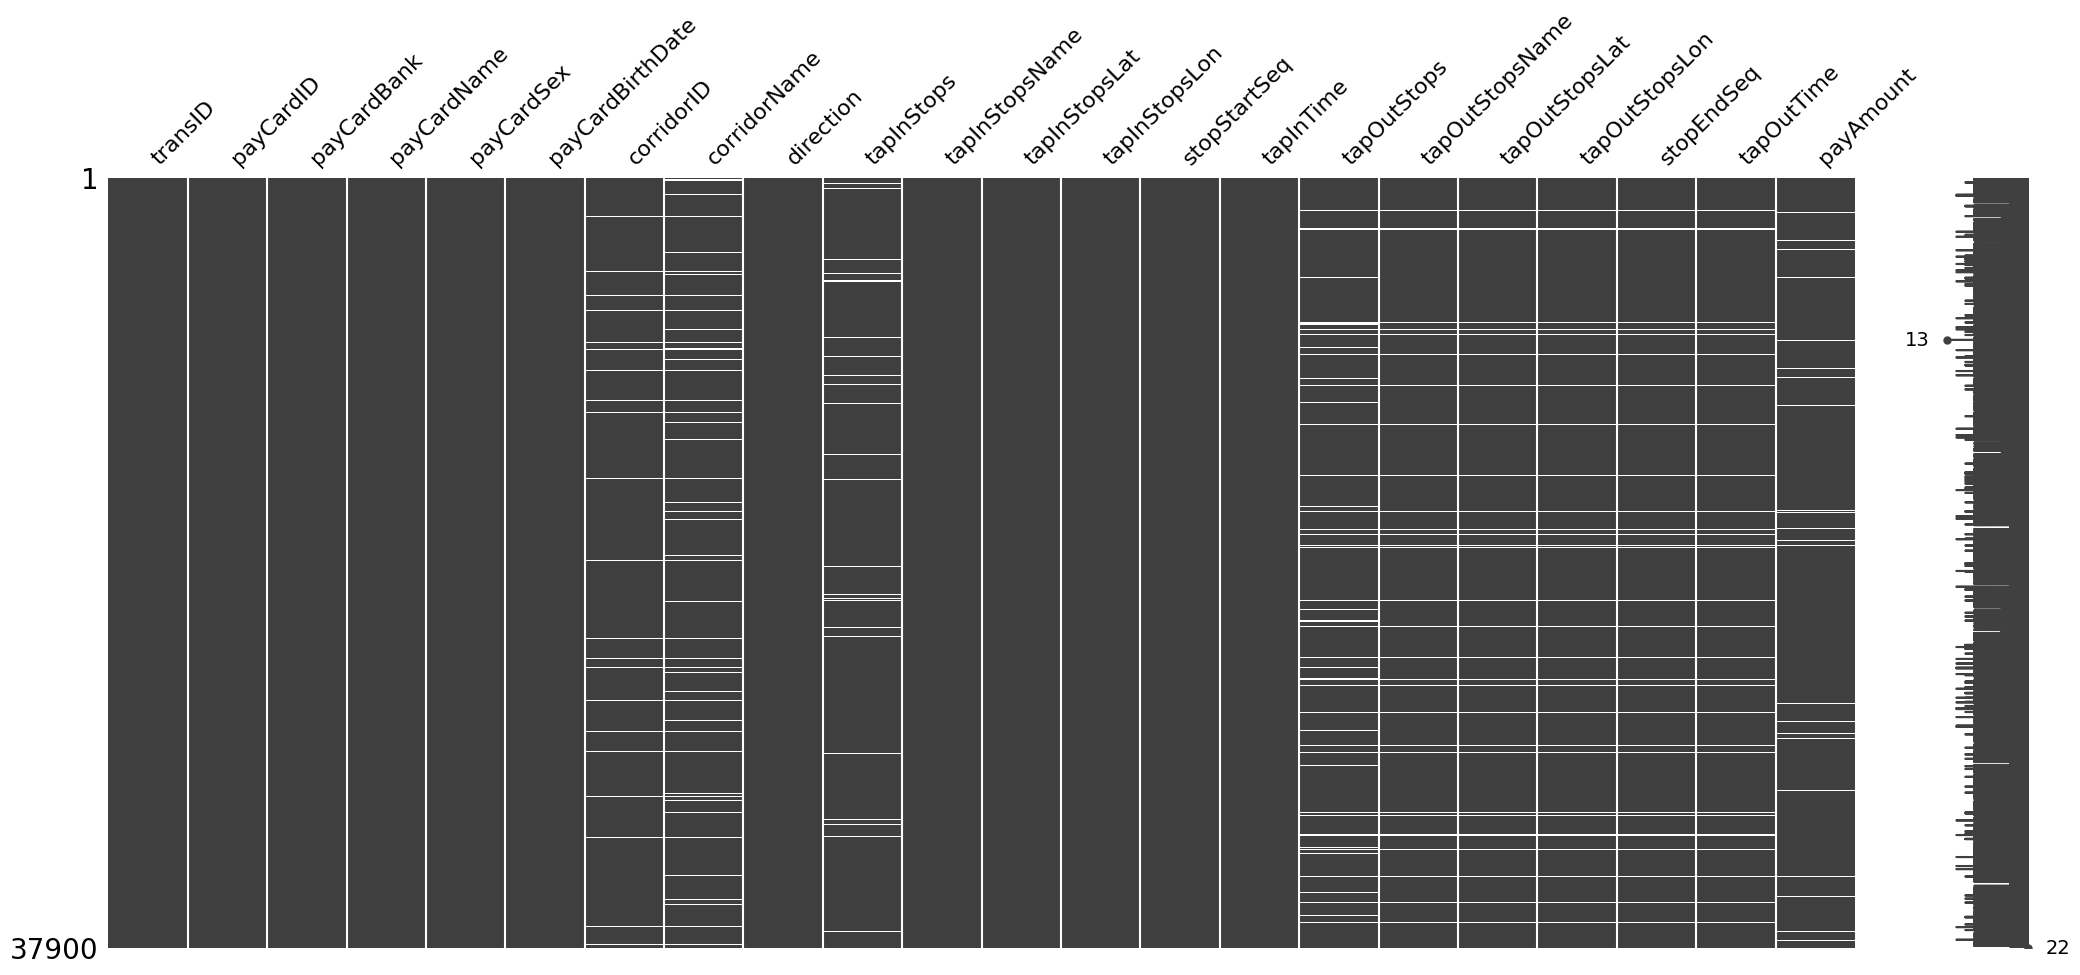

In [20]:
# visualisasi sebaran missing value di dalam data
import missingno as msno
msno.matrix(df)

In [21]:
# melihat data yang mengandung NaN
df[df.isna().any(axis=1)] # any untuk memunculkan semua data yang minimal 1 NaN

transID         payCardID payCardBank            payCardName  \
6      HEMW326B9N91TV   213155822653833      emoney  R. Devi Hariyah, S.T.   
7      XTKE052E5E87LN  3587341902618993         dki        Darmanto Rajasa   
11     IIEK980X1O23NZ   347204308990092      emoney  R.M. Labuh Laksmiwati   
21     ZJVI960B9I42DA   343851798729291      emoney           Garang Utama   
30     TCKQ601Q5O01BC  3589380857722689         dki  drg. Lukman Hidayanto   
...               ...               ...         ...                    ...   
37878  FFUS474T7Q54QF    36067042340502         bni         Jatmiko Mansur   
37882  YMCL988A7J02QF   180074952289665      emoney        Asmadi Setiawan   
37885  KUXY021D6I25YN    30169751274025         bni        Prasetya Wasita   
37887  UELP204M1S64QX  4068989702474318         dki         Ajimat Pradana   
37889  FSZU331F3O29PS     4300800810103      online         Faizah Samosir   

      payCardSex  payCardBirthDate corridorID                    corridorName  \
6              M              1974     JAK.18             Kalibata - Kuningan   
7              F              1991        NaN                             NaN   
11             F              1984        M7B                    BKN - Blok M   
21             F              1997     JAK.16              Cililitan - Condet   
30             M              1995     JAK.46        Pasar Minggu - Jagakarsa   
...          ...               ...        ...                             ...   
37878          F              1965        D32       Cinere - Bundaran Senayan   
37882          F              1971    JAK.48B  Stasiun Tebet - Kampung Melayu   
37885          M              1986         3B                             NaN   
37887          F              1980         4D        Pulo Gadung 2 - Kuningan   
37889          M              2009     JAK.18             Kalibata - Kuningan   

      direction tapInStops  ... tapInStopsLon stopStartSeq  \
6           0.0    B00243P  ...     106.85165           25   
7           1.0    B03416P  ...     106.80221            2   
11          1.0     P00254  ...     106.83102           12   
21          0.0        NaN  ...     106.86741            4   
30          1.0    B00001P  ...      106.8321           19   
...         ...        ...  ...           ...          ...   
37878       0.0    B06642P  ...     106.78282            4   
37882       0.0    B01732P  ...     106.86825           11   
37885       1.0    B04610P  ...     106.72736            2   
37887       0.0     P00269  ...      106.8883            5   
37889       0.0    B01450P  ...     106.84661            8   

                tapInTime  tapOutStops             tapOutStopsName  \
6     2023-04-03 06:58:21          NaN                         NaN   
7     2023-04-03 06:44:24      B00899P                  Jln. Baros   
11    2023-04-03 06:22:10       P00129            Mampang Prapatan   
21    2023-04-03 05:08:36      B01393P       Jln. Mesjid Al Mabruk   
30    2023-04-03 06:14:02          NaN                         NaN   
...                   ...          ...                         ...   
37878 2023-04-16 07:59:08          NaN                 FX Sudirman   
37882 2023-04-30 08:41:09      B01169P    Jln. Jatinegara Timur IV   
37885 2023-04-08 10:46:06      B00192P              BSI Cengkareng   
37887 2023-04-04 14:52:31          NaN                 Pramuka LIA   
37889 2023-04-30 07:22:58          NaN  Gg. Trijaya IV Tebet Timur   

      tapOutStopsLat tapOutStopsLon stopEndSeq          tapOutTime  payAmount  
6                NaN            NaN        NaN                 NaT        0.0  
7          -6.311046        106.784       12.0 2023-04-03 07:11:43        0.0  
11         -6.242699      106.82572       14.0 2023-04-03 06:50:21        NaN  
21          -6.28435      106.85293       20.0 2023-04-03 05:30:45        0.0  
30               NaN            NaN        NaN                 NaT        0.0  
...              ...            ...   

Secara garis besar:
- Data corridorName dan corridorID saling berhubungan sehingga jika salah satu missing bisa diisi dengan modus data serupa
- Data yang hilang pada kolom tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq merupakan jenis MNAR (Missing Not At Random) karena diakibatkan oleh kolom tapInStops yang kosong.
- Data yang hilang pada kolom tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq merupakan jenis MNAR (Missing Not At Random) karena diakibatkan oleh kolom tapOutStops yang kosong.
- Data pay 0 artinya perjalanan yang dilakukan free (tanpa biaya)

Dalam menangani data missing value, diperlukan informasi distribusi data, sehingga dilakukan analisis pada variabel numerik dan kategorik untuk dapat menentukan metode yang sesuai.

### Variabel Numerik

Variabel numerik adalah jenis variabel yang mewakili data dalam bentuk angka, di mana nilai-nilainya memiliki makna matematis dan dapat digunakan untuk operasi aritmatika seperti penjumlahan, pengurangan, perkalian, atau pembagian. Variabel ini biasanya digunakan untuk mengukur kuantitas atau besaran.

In [22]:
# mengambil data numerik
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk
numerik

payCardBirthDate  stopStartSeq  stopEndSeq  payAmount
0                  2008             7        12.0     3500.0
1                  1997            13        21.0     3500.0
2                  1992            38        39.0     3500.0
3                  1978            23        29.0     3500.0
4                  1982             5        15.0     3500.0
...                 ...           ...         ...        ...
37895              2004             2        13.0     3500.0
37896              1974             1         2.0     3500.0
37897              1976            12        14.0    20000.0
37898              1976            33        34.0        0.0
37899              1985             2         7.0     3500.0

[37900 rows x 4 columns]

data payCardBirthDate bertipe int untuk mempertahankan nilai tahun saja, tetapi dalam perhitungan variabel numerik diabaikan

In [23]:
# melihat distribusi data numerik
numerik.describe()

payCardBirthDate  stopStartSeq    stopEndSeq     payAmount
count      37900.000000  37900.000000  36556.000000  36893.000000
mean        1990.089314     13.572480     21.219909   2699.712683
std           13.051482     12.237623     13.800689   4212.225592
min         1946.000000      0.000000      1.000000      0.000000
25%         1982.000000      4.000000     11.000000      0.000000
50%         1990.000000     10.000000     18.000000   3500.000000
75%         2001.000000     19.000000     29.000000   3500.000000
max         2012.000000     68.000000     77.000000  20000.000000

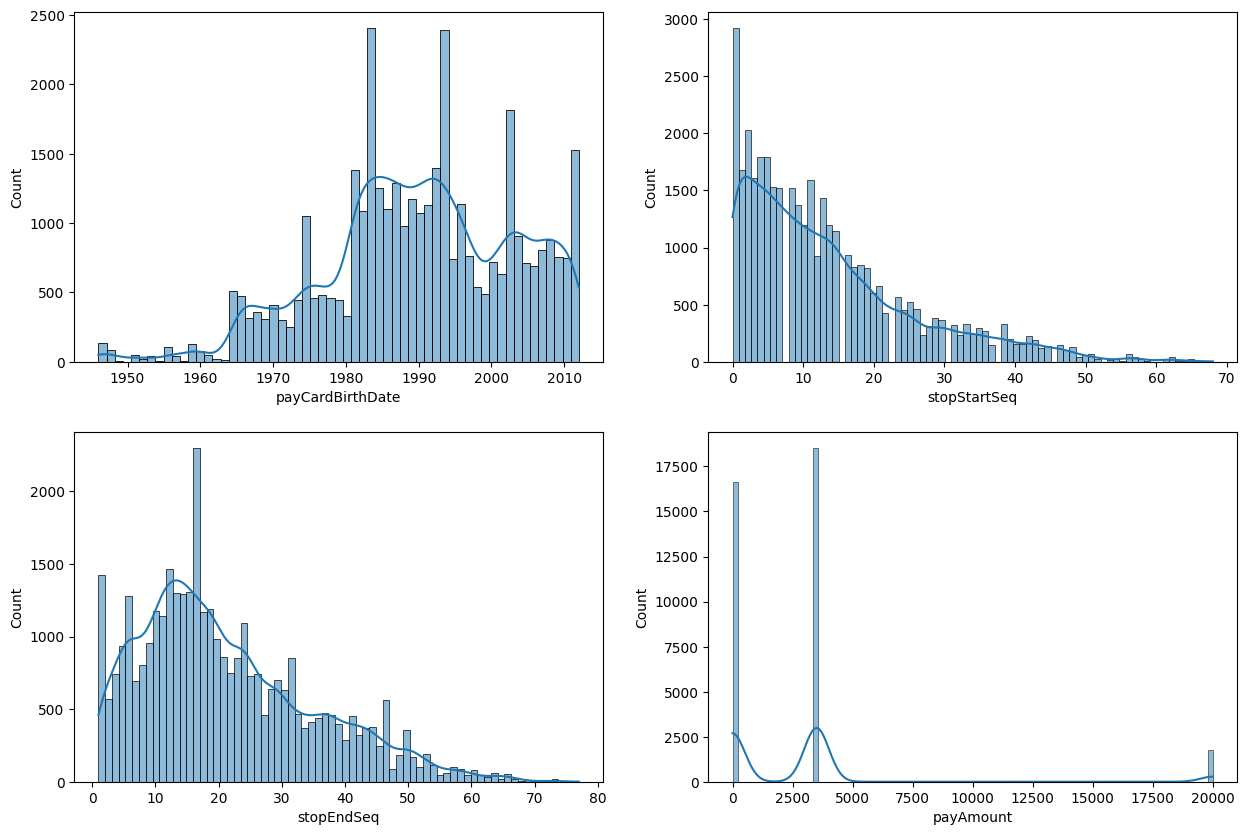

In [24]:
# melihat distribusi data secara visual
# atur size dari figure
plt.figure(figsize = (15,10)) # kolom, baris

for posisi, nama_kolom in zip(range(1,12), numerik.columns):
    plt.subplot(2,2,posisi) # jumlah baris, jumlah kolom, posisi
    sns.histplot(df[nama_kolom], kde = True)

plt.show()

Untuk mengetahui distribusi data, dilakukan uji normalitas dan statistik deskriptif

##### Uji Normalitas Data

Dikarenakan dalam uji normalitas tidak bisa dilakukan jika ada missing value, maka DataFrame di salin lalu dihapus missing valuenya terlebih dahulu.

In [25]:
df_copy = df.copy()
df_copy.dropna(inplace=True) # menghapus missing values

###### Uji Kolmogorov Smirnov

In [26]:
from scipy.stats import kstest

for nama_kolom in numerik.columns:
    stat, pval = kstest(df_copy[nama_kolom], 'norm')
    if pval < 0.05:
        print(f'Kolom {nama_kolom} terdistribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {nama_kolom}terdistribusi normal (Terima H0)')

Kolom payCardBirthDate terdistribusi tidak normal (Tolak H0)
Kolom stopStartSeq terdistribusi tidak normal (Tolak H0)
Kolom stopEndSeq terdistribusi tidak normal (Tolak H0)
Kolom payAmount terdistribusi tidak normal (Tolak H0)


###### Uji D'Agustino Pearson

In [27]:
# D'Agustino Pearson
from scipy.stats import normaltest

for kolom in numerik.columns:
    stat, pval = normaltest(df_copy[kolom])
    if pval < 0.05:
        print(f'Kolom {kolom} terdistribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {kolom}terdistribusi normal (Terima H0)')

Kolom payCardBirthDate terdistribusi tidak normal (Tolak H0)
Kolom stopStartSeq terdistribusi tidak normal (Tolak H0)
Kolom stopEndSeq terdistribusi tidak normal (Tolak H0)
Kolom payAmount terdistribusi tidak normal (Tolak H0)


###### Uji Saphiro Wilk

In [28]:
# Shapiro Wilk
from scipy.stats import shapiro

for kolom in numerik.columns:
    stat, pval = shapiro(df_copy[kolom])
    if pval < 0.05:
        print(f'Kolom {kolom} terdistribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {kolom}terdistribusi normal (Terima H0)')

Kolom payCardBirthDate terdistribusi tidak normal (Tolak H0)
Kolom stopStartSeq terdistribusi tidak normal (Tolak H0)
Kolom stopEndSeq terdistribusi tidak normal (Tolak H0)
Kolom payAmount terdistribusi tidak normal (Tolak H0)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31730.
  res = hypotest_fun_out(*samples, **kwds)


#### Kesimpulan Uji Normalitas

Kesimpulan dari uji normalitas adalah seluruh variabel numerik tidak terdistribusi normal. sehingga untuk handling missing value pada data numerik akan menggunakan central tendency ***Median***

#### Outliers Data Numerik

Outliers merupakan nilai dalam dataset yang jauh berbeda atau menyimpang secara signifikan dari sebagian besar data lainnya. Dalam istilah statistik, outliers sering dianggap sebagai pengamatan "ekstrem" yang tidak mengikuti pola umum distribusi data. Pengecekan data outliers berfungsi untuk mengidentifikasi nilai ekstrem yang berpotensi mempengaruhi analisis data secara signifikan. Metode yang digunakan untuk mendeteksi outliers adalah IQR (Interquartile Range) karena data terdistribusi tidak normal, lalu divisualisasikan dengan boxplot.

##### 1. IQR
IQR dilakukan dengan menentukan batas kuartil pertama (Q1) dan kuartil ketiga (Q3), lalu dihitung batas atas dan bawahnya. Suatu data dideteksi sebagai outliers ketika melebihi batas atas (Q3 + 1,5 * IQR) dan batas bawah (Q1 + 1,5 * IQR).

In [29]:
for nama_kolom in numerik.columns:
    q3 = df_copy[nama_kolom].quantile(0.75)
    q1 = df_copy[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df_copy[(df_copy[nama_kolom] > batas_atas) | (df_copy[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers payCardBirthDate: 283
Jumlah Outliers stopStartSeq: 1298
Jumlah Outliers stopEndSeq: 347
Jumlah Outliers payAmount: 1533


##### 2. Boxplot
Boxplot merupakan metode visualisasi data yang menunjukkan outliers sebagai titik di luar 'whiskers' (rentang data)

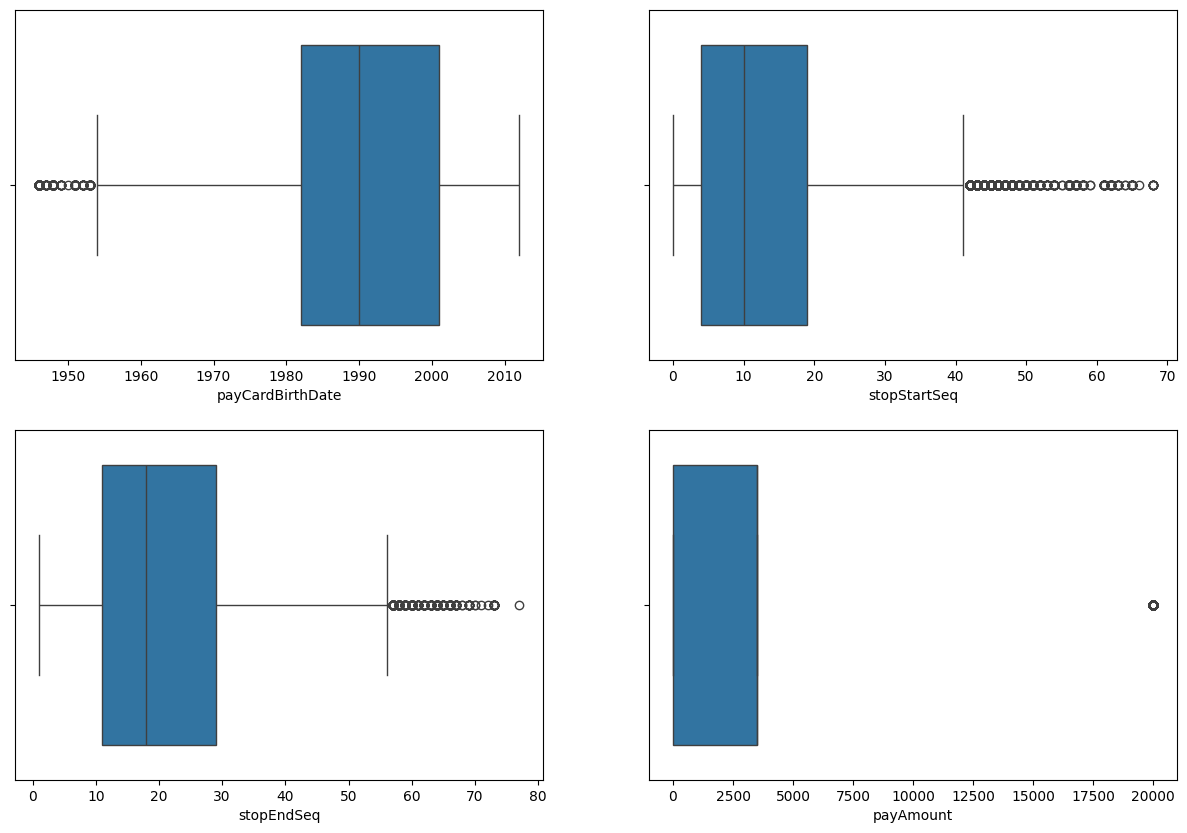

In [30]:
# atur size dari figure
plt.figure(figsize = (15,10)) # kolom, baris

for posisi, nama_kolom in zip(range(1,12), numerik.columns): # posisi 1 sampai 12
    plt.subplot(2,2,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x = df[nama_kolom])

plt.show()

Outliers pada kolom `stopStartSeq` (urutan halte naik) dan `stopEndSeq` (urutan halte turun) disebabkan oleh rute memiliki jumlah halte sangat banyak. Sementara untuk `payAmount` terdapat banyak outliers yang dapat disebabkan oleh tarif pada rute tertentu berbeda-beda, dimana tarif tertinggi berada pada Rp20.000 yang merupakan tarif armada Royaltrans.

### Korelasi Antar Variabel Numerik

uji korelasi antar variabel numerik akan menghasilkan koefisien korelasi yang bernilai 0-1, dimana 0 menunjukkan tidak memiliki korelasi dan 1 menunukkan kedua variabel tersebut berkorelasi sangat kuat. Selain angka, koefisien ini juga memiliki arah korelasi positif (+) dan negatif (-).

In [31]:
numerik.corr()

payCardBirthDate  stopStartSeq  stopEndSeq  payAmount
payCardBirthDate          1.000000     -0.025739   -0.028652   0.066837
stopStartSeq             -0.025739      1.000000    0.825642  -0.250072
stopEndSeq               -0.028652      0.825642    1.000000  -0.323909
payAmount                 0.066837     -0.250072   -0.323909   1.000000

<Axes: >

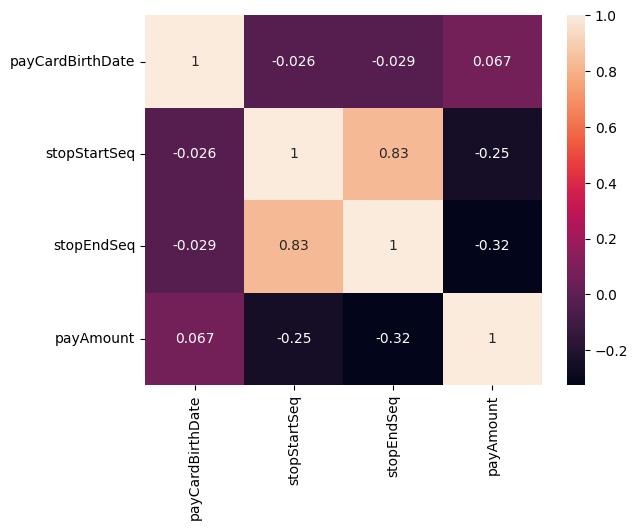

In [32]:
# visualisasi uji korelasi
sns.heatmap(numerik.corr(), annot= True)

Berdasarkan hasil uji korelasi, disimpulkan bahwa:
- variabel stopStartSeq berkorelasi positif kuat dengan stopEndSeq (0,83). Artinya terdapat hubungan yang sangat kuat antara urutan halte awal dan akhir. Jika penumpang memulai perjalanan di halte dengan urutan kecil (awal rute), mereka cenderung mengakhiri perjalanan di halte dengan urutan kecil juga (atau sebaliknya). Ini menunjukkan bahwa perjalanan cenderung pendek atau dalam segmen rute yang sama.
- variabel payCardBirthDate berkorelasi positif sedang dengan payAmount (0,67). Artinya pengguna yang lebih tua (tahun kelahiran lebih kecil) cenderung membayar tarif lebih tinggi (misalnya, lebih sering menggunakan Royaltrans dengan tarif Rp 20,000). Ini menunjukkan pola bahwa pengguna yang lebih tua mungkin memilih layanan premium seperti Royaltrans.

### Variabel Kategorik

Variabel kategorik adalah jenis variabel yang mewakili data dalam bentuk kategori atau kelompok, bukan nilai numerik kontinu. Variabel ini biasanya digunakan untuk mengelompokkan data berdasarkan karakteristik tertentu, dan nilai-nilainya tidak memiliki urutan numerik yang bermakna (meskipun dalam beberapa kasus ada urutan ordinal).

In [33]:
# ambil yang kategorik saja
kategorik = df.select_dtypes(exclude = 'number')
kategorik = df.select_dtypes(include = 'object')
kategorik

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex corridorID  \
0              Bajragin Usada          M          5   
1                Gandi Widodo          F         6C   
2               Emong Wastuti          F        R1A   
3                Surya Wacana          F        11D   
4             Embuh Mardhiyah          M         12   
...                       ...        ...        ...   
37895         Kamila Mahendra          F         6B   
37896            Titi Siregar          M         9N   
37897  drg. Zahra Nashiruddin          F         1T   
37898            Ana Agustina          M     JAK.13   
37899       drg. Leo Najmudin          F         13   

                                   corridorName direction tapInStops  \
0                         Matraman Baru - Ancol       1.0     P00142   
1      Stasiun Tebet - Karet via Patra Kuningan       0.0    B01963P   
2                            Pantai Maju - Kota       0.0    B00499P   
3           Pulo Gebang - Pulo Gadung 2 via PIK       0.0    B05587P   
4                         Tanjung Priok - Pluit       0.0     P00239   
...                                         ...       ...        ...   
37895         Ragunan - MH Thamrin via Semanggi       1.0     P00261   
37896                    Pinang Ranti - Pramuka       1.0     P00064   
37897                      Cibubur - Balai Kota       1.0    B02873P   
37898               Tanah Abang - Jembatan Lima       1.0    B02505P   
37899                         Ciledug - Tendean       0.0     P00001   

               tapInStopsName tapInStopsLat tapInStopsLon tapOutStops  \
0                   Pal Putih     -6.184631     106.84402      P00253   
1                  Kemenkes 2       -6.2287     106.83302     B03307P   
2                Gg. Kunir II     -6.133132     106.81435     B04962P   
3                Taman Elok 1     -6.195743     106.93526     B03090P   
4      Sunter Boulevard Barat      -6.14965       106.889      P00098   
...                       ...           ...           ...         ...   
37895                  Tosari     -6.196892     106.82309      P00228   
37896       Garuda Taman Mini     -6.290154     106.88116      P00179   
37897           Plaza Sentral     -6.216247     106.81676     B00226P   
37898          Museum Textile     -6.188656     106.80954     B01787P   
37899              Adam Malik     -6.236466     106.74786      P00106   

             tapOutStopsName tapOutStopsLat tapOutStopsLon  
0                    Tegalan      -6.203101      106.85715  
1        Sampoerna Strategic      -6.217152      106.81892  
2      Simpang Kunir Kemukus      -6.133731      106.81475  
3          Raya Penggilingan      -6.183068      106.93194  
4           Kali Besar Barat      -6.135355      106.81143  
...                      ...            ...            ...  
37895                 SMK 57      -6.290967      106.82365  
37896           Pinang Ranti      -6.291075      106.88634  
37897        Buperta Cibubur      -6.370321      106.89628  
37898             JPO Blok G      -6.188861      106.81135  
37899         Kebayoran Lama       -6.23834      106.77752  

[37900 rows x 16 columns]

### Uji Statistik Deskriptif

untuk mempermudah dalam memahami data kategorik, diperlukan uji statistik deskriptif yang  berisi jumlah data, jumlah data unik dan modusnya.

In [34]:
kategorik.describe()

transID        payCardID payCardBank         payCardName  \
count            37900            37900       37900               37900   
unique           37900             2000           6                1993   
top     EIIW227B8L34VB  180062659848800         dki  Fathonah Saefullah   
freq                 1               40       18743                  80   

       payCardSex corridorID          corridorName  direction tapInStops  \
count       37900      36643                 35970    37900.0      36687   
unique          2        221                   216        2.0       2570   
top             F         1T  Cibubur - Balai Kota        1.0     P00170   
freq        20157        400                   391    18974.0        236   

       tapInStopsName  tapInStopsLat  tapInStopsLon tapOutStops  \
count           37900   37900.000000    37900.00000       35611   
unique           2602    2587.000000     2458.00000        2230   
top       Penjaringan      -6.126306      106.79203      P00016   
freq              243     243.000000      243.00000         306   

       tapOutStopsName  tapOutStopsLat  tapOutStopsLon  
count            36556    36556.000000        36556.00  
unique            2248     2237.000000         2139.00  
top                BKN       -6.257751          106.87  
freq               316      316.000000          316.00

In [35]:
# hitung unique values tiap kolom
kategorik.nunique()

transID            37900
payCardID           2000
payCardBank            6
payCardName         1993
payCardSex             2
corridorID           221
corridorName         216
direction              2
tapInStops          2570
tapInStopsName      2602
tapInStopsLat       2587
tapInStopsLon       2458
tapOutStops         2230
tapOutStopsName     2248
tapOutStopsLat      2237
tapOutStopsLon      2139
dtype: int64

In [36]:
# payCardBank value counts
df['payCardBank'].value_counts()

payCardBank
dki       18743
emoney     6866
brizzi     3531
flazz      3234
online     2869
bni        2657
Name: count, dtype: int64

In [37]:
# payCardSex value counts
df['payCardSex'].value_counts()

payCardSex
F    20157
M    17743
Name: count, dtype: int64

In [38]:
# Top 10 corridorID value counts
df['corridorID'].value_counts().sort_values(ascending=False).head(10)

corridorID
1T        400
S21       388
JIS3      341
8C        339
JAK.06    333
11P       332
2E        318
9D        310
M7B       309
JAK.72    305
Name: count, dtype: int64

In [39]:
# Top 10 corridorName value counts
df['corridorName'].value_counts().sort_values(ascending=False).head(10)

corridorName
Cibubur - Balai Kota                           391
Ciputat - CSW                                  383
Pulo Gadung - Monas                            343
Harmoni - Jakarta International Stadium        338
Kebayoran Lama - Tanah Abang                   333
Kalideres - Bundaran HI via Veteran            332
Kampung Rambutan - Pondok Gede                 329
Rusun Pondok Bambu - Walikota Jakarta Timur    326
Rusun Rawa Bebek - Kodamar                     312
Pasar Minggu - Tanah Abang                     303
Name: count, dtype: int64

In [40]:
# direction value counts
df['direction'].value_counts()

direction
1.0    18974
0.0    18926
Name: count, dtype: int64

0 artinya berangkat/pergi ;
1 artinya kembali/pulang dari rute

In [41]:
# Top 10 tapInStopsName value counts
df['tapInStopsName'].value_counts().sort_values(ascending=False).head(10)

tapInStopsName
Penjaringan          243
Garuda Taman Mini    208
BKN                  173
BNN LRT              155
Pejaten              152
Cibubur Junction     133
Rusun Kapuk Muara    131
Penggilingan         130
Tendean              126
Seskoal              126
Name: count, dtype: int64

In [42]:
# Top 10 tapOutStopsName value counts
df['tapOutStopsName'].value_counts().sort_values(ascending=False).head(10)

tapOutStopsName
BKN                       316
Penjaringan               265
Term. Senen               196
Monas                     167
Term. Kampung Rambutan    164
Kejaksaan Agung           159
Ragunan                   151
Pinang Ranti              146
Pluit                     131
Kota Kasablanka           131
Name: count, dtype: int64

### Kesimpulan Data Understanding

- missing value memiliki nilai yang banyak tetapi persentasenya <10% dan variabelnya berhubungan (MNAR) sehingga dapat dicoba untuk dihandling dan diisi dengan constant imputer ('unknown')
- seluruh variabel data terdistribusi tidak normal
- outliers yang ditemukan sangat banyak tetapi masih dapat ditoleransi karena penyebab outliers masih reasonable (TapOut tidak terdeteksi)

## Data Cleaning dan Pre-Processing

In [43]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

### Data Koridor

mengisi data `corridorID` berdasarkan data `corridorName` dan sebaliknya

In [44]:
# Menggunakan modus untuk mengisi corridorName berdasarkan corridorID
for corridor_id in df['corridorID'].unique():
    if pd.notna(corridor_id):  # Skip jika corridor_id adalah NaN
        # Ambil mode dari corridorName untuk corridorID ini
        mask_id = df['corridorID'] == corridor_id
        most_common_name = df.loc[mask_id, 'corridorName'].mode()

        if not most_common_name.empty:
            # Isi corridorName yang kosong dengan mode
            mask_to_fill = (df['corridorID'] == corridor_id) & (df['corridorName'].isna())
            df.loc[mask_to_fill, 'corridorName'] = most_common_name[0]

# Proses serupa untuk mengisi corridorID berdasarkan corridorName
for corridor_name in df['corridorName'].unique():
    if pd.notna(corridor_name):
        mask_name = df['corridorName'] == corridor_name
        most_common_id = df.loc[mask_name, 'corridorID'].mode()

        if not most_common_id.empty:
            mask_to_fill = (df['corridorName'] == corridor_name) & (df['corridorID'].isna())
            df.loc[mask_to_fill, 'corridorID'] = most_common_id[0]

In [45]:
df[df['corridorID']=='12']

transID            payCardID payCardBank  \
4      VMLO535V7F95NJ         570928206772       flazz   
153    DKJG081O7Q37WJ  4203562511038947968      brizzi   
190    QWZD161N6O38NX       30164080918459         bni   
304    UCXG771V8L71ZT         570928206772       flazz   
453    ACPK576Y9I41XE  4203562511038947968      brizzi   
...               ...                  ...         ...   
33546  JRXJ922Y5A93FQ       30076245962299         bni   
34027  SYMR009B8X69KK       30160416336911         bni   
34229  QGKL921J2J30UI     4314001786147604         dki   
34271  CGGL091H4A27WN     4250503208533960         dki   
34670  HJNT047D4F77WD         503837878738       flazz   

                       payCardName payCardSex  payCardBirthDate corridorID  \
4                  Embuh Mardhiyah          M              1982         12   
153         drg. Tantri Situmorang          F              1983         12   
190             Daliono Adriansyah          F              2012         12   
304                Embuh Mardhiyah          M              1982         12   
453         drg. Tantri Situmorang          F              1983         12   
...                            ...        ...               ...        ...   
33546           Baktianto Nasyidah          F              1990         12   
34027      Unjani Prasetyo, M.Kom.          F              1983         12   
34229  Dr. Baktianto Pradana, S.T.          F              1983         12   
34271   Puti Zahra Wijayanti, S.E.          F              2009         12   
34670               Rahmi Lazuardi          M              1982         12   

                corridorName direction tapInStops  ... tapInStopsLon  \
4      Tanjung Priok - Pluit       0.0     P00239  ...       106.889   
153    Tanjung Priok - Pluit       1.0     P00076  ...     106.83237   
190    Tanjung Priok - Pluit       0.0     P00131  ...     106.82597   
304    Tanjung Priok - Pluit       1.0     P00241  ...     106.89076   
453    Tanjung Priok - Pluit       0.0     P00170  ...     106.79203   
...                      ...       ...        ...  ...           ...   
33546  Tanjung Priok - Pluit       0.0     P00287  ...     106.89314   
34027  Tanjung Priok - Pluit       1.0     P00055  ...     106.89242   
34229  Tanjung Priok - Pluit       1.0     P00240  ...     106.87081   
34271  Tanjung Priok - Pluit       0.0     P00146  ...     106.81792   
34670  Tanjung Priok - Pluit       0.0     P00229  ...      106.8592   

      stopStartSeq           tapInTime  tapOutStops  \
4                5 2023-04-03 06:17:35       P00098   
153              8 2023-04-03 06:27:08       P00171   
190             13 2023-04-03 06:27:11       P00098   
304             15 2023-04-03 16:37:53       P00272   
453             17 2023-04-03 17:45:49       P00181   
...            ...                 ...          ...   
33546            2 2023-04-23 20:46:48       P00239   
34027           19 2023-04-23 10:36:32       P00248   
34229           13 2023-04-29 07:50:16       P00248   
34271           14 2023-04-30 20:09:45       P00008   
34670            8 2023-04-30 19:32:00       P00098   

                         tapOutStopsName tapOutStopsLat tapOutStopsLon  \
4                       Kali Besar Barat      -6.135355      106.81143   
153               Permai Koja Arah Utara       -6.11413      106.89309   
190                     Kali Besar Barat      -6.135355      106.81143   
304    Walikota Jakarta Utara Arah Utara      -6.118842      106.89314   
453                                Pluit      -6.115795      106.79037   
...                                  ...            ...            ...   
33546             Sunter Boulevard Barat       -6.14965        106.889   
34027                      Tanjung Priok       -6.10959      106.88214   
34229                      Tanjung Priok       -6.10959      106.88214   
34271                  Bandengan Selatan      -6.136318      106.80347   
34670                   Kali Besar Barat

setelah di handling, masih terdapat 1125 data NaN karena kolom corridorID dan corridorName kosong bersamaan sebagai berikut

In [46]:
# Cari data NaN pada kolom 'corridorID' dan 'corridorName'
nan_corridor_data = df[df['corridorID'].isna() | df['corridorName'].isna()]
nan_corridor_data

transID            payCardID payCardBank  \
7      XTKE052E5E87LN     3587341902618993         dki   
120    MCWO805A6Q66MX     3570416613897992         dki   
240    PTDK452M9A71XF      342370004909630      emoney   
250    OLZA217B5B95DK  4371940047525876160      brizzi   
257    GHEY769K9T55WF        4281653494791      online   
...               ...                  ...         ...   
37626  WTBE997C8K47UG  4087484815419236202      brizzi   
37689  ZVAU363K8Z72QF     4235440226938980         dki   
37727  MGBX067C2V69EZ      213145593134816      emoney   
37770  RGLG273G3M96TE  4725638979751926133      brizzi   
37838  GTLM961T1U29JA     4204405669287580         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
7                Darmanto Rajasa          F              1991        NaN   
120         Gawati Damanik, S.E.          F              2010        NaN   
240        Kartika Habibi, S.Psi          M              1975        NaN   
250                Zelda Laksita          M              2009        NaN   
257                 Zelda Wibowo          M              1989        NaN   
...                          ...        ...               ...        ...   
37626           Kezia Hutagalung          F              1993        NaN   
37689           Tgk. Tari Wibowo          F              1989        NaN   
37727                Ulva Namaga          F              1995        NaN   
37770  Murti Simanjuntak, M.Farm          M              1988        NaN   
37838          Saka Wijaya, S.H.          M              1995        NaN   

      corridorName direction tapInStops  ... tapInStopsLon stopStartSeq  \
7              NaN       1.0    B03416P  ...     106.80221            2   
120            NaN       0.0     P00109  ...     106.86115            8   
240            NaN       0.0    B04505P  ...     106.81934           13   
250            NaN       1.0    B04576P  ...     106.73786           11   
257            NaN       0.0    B00048P  ...     106.92867           16   
...            ...       ...        ...  ...           ...          ...   
37626          NaN       1.0    B05316P  ...     106.95555           42   
37689          NaN       1.0     P00014  ...     106.89859           23   
37727          NaN       1.0     P00146  ...     106.81792            6   
37770          NaN       1.0     P00076  ...     106.83237           11   
37838          NaN       1.0    B03520P  ...     106.94385           12   

                tapInTime  tapOutStops             tapOutStopsName  \
7     2023-04-03 06:44:24      B00899P                  Jln. Baros   
120   2023-04-03 06:38:44       P00224               Slamet Riyadi   
240   2023-04-03 05:13:16      B03396P             Kota Kasablanka   
250   2023-04-03 06:24:37      B05009P       Simpang Meruya Ilir 1   
257   2023-04-03 05:05:24      B05823P           United Tractors 1   
...                   ...          ...                         ...   
37626 2023-04-15 10:08:50      B02642P          Ps. Malaka Rorotan   
37689 2023-04-28 19:01:21       P00192               Pulo Gadung 1   
37727 2023-04-16 17:38:14       P00092              Jembatan Merah   
37770 2023-04-16 09:06:33       P00141                       Pakin   
37838 2023-04-28 12:30:26      B04078P  Sbr. Masjid Pasmar Marunda   

      tapOutStopsLat tapOutStopsLon stopEndSeq          tapOutTime  payAmount  
7          -6.311046        106.784       12.0 2023-04-03 07:11:43        0.0  
120        -6.208533      106.85929        9.0 2023-04-03 07:32:11     3500.0  
240        -6.224688      106.84246       20.0 2023-04-03 05:39:55     3500.0  
250        -6.196682      106.75517       28.0 2023-04-03 07:13:18        0.0  
257         -6.18326      106.93243       28.0 2023-04-03 05:41:12     3500.0  
...              ...            ...        ...                 ...        ...  
37626       -6.13998      106.95493       43.0 2023-04-15 11:02:37        0.0  
37689      -6.183239  

coba dihandling dengan data tap in stops dan tap out stops untuk melihat koridornya. Namun, kelemahannya adalah jika ada halte yang dilayani multiple koridor bisa menyebabkan ambiguitas (seperti halte Harmoni dan Dukuh Atas).

In [47]:
corridor_mapping = df[['corridorID', 'corridorName']].dropna(how='any').drop_duplicates()
id_to_name = dict(zip(corridor_mapping['corridorID'], corridor_mapping['corridorName']))
name_to_id = dict(zip(corridor_mapping['corridorName'], corridor_mapping['corridorID']))

# Buat mapping hanya dari data yang konsisten
route_to_corridor = {}
min_samples = 5  # Minimal jumlah sampel untuk dipercaya
min_consistency = 0.8  # 80% konsistensi

for (in_stop, out_stop), group in df.groupby(['tapInStops', 'tapOutStops']):
    if in_stop is not None and out_stop is not None:
        corridor_counts = group['corridorID'].value_counts(dropna=True)
        if len(corridor_counts) > 0 and len(group) >= min_samples:
            most_common = corridor_counts.index[0]
            consistency = corridor_counts.iloc[0] / len(group)
            if consistency >= min_consistency:
                route_to_corridor[(in_stop, out_stop)] = most_common

# Gunakan mapping untuk mengisi yang masih kosong
missing_mask = (df['corridorID'].isna() & df['corridorName'].isna())
routes_filled = 0

for idx, row in df[missing_mask].iterrows():
    if pd.notna(row['tapInStops']) and pd.notna(row['tapOutStops']):
        route_key = (row['tapInStops'], row['tapOutStops'])
        if route_key in route_to_corridor:
            df.at[idx, 'corridorID'] = route_to_corridor[route_key]
            # Setelah mengisi corridorID, juga isi corridorName jika mapping tersedia
            if route_to_corridor[route_key] in id_to_name:
                df.at[idx, 'corridorName'] = id_to_name[route_to_corridor[route_key]]
            routes_filled += 1

print(f"Langkah 2 berhasil mengisi {routes_filled} baris tambahan")

# Evaluasi hasil akhir
final_missing = (df['corridorID'].isna() & df['corridorName'].isna()).sum()
print(f"Total missing values yang tersisa: {final_missing}")

Langkah 2 berhasil mengisi 893 baris tambahan
Total missing values yang tersisa: 232


Setelah menerapkan metode pengisian berdasarkan mapping langsung dan pola perjalanan, tersisa 232 baris (0.6% dari dataset) di mana corridor tidak dapat diidentifikasi. Baris-baris ini tidak menunjukkan pola tertentu dalam hal waktu, lokasi, atau karakteristik lainnya. Untuk menanganinya, saya menandai baris-baris ini dengan kategori 'Unknown Corridor' dan melakukan analisis baik dengan maupun tanpa data ini untuk memastikan robustness temuan. Untuk analisis utama saya akan tetap menggunakan baris 'unknown corridor', tetapi untuk analisis sensitivitas tidak akan digunakan.

In [48]:
missing_mask = (df['corridorID'].isna() & df['corridorName'].isna())
df.loc[missing_mask, 'corridorID'] = 'Unknown'
df.loc[missing_mask, 'corridorName'] = 'Unknown Corridor'

In [49]:
# hasil akhir pengisian data koridor
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

missing value pada data koridor sudah selesai di handling

### Data Tap In

In [50]:
# Buat mapping dari nama halte ke kode halte
stops_mapping = df[['tapInStopsName', 'tapInStops']].dropna().drop_duplicates()

# Jika 1 nama bisa punya beberapa kode, ambil yang paling sering muncul
name_to_stops = {}
for name, group in df.groupby('tapInStopsName'):
    if name is not None:  # Pastikan nama tidak None
        codes = group['tapInStops'].value_counts().dropna()
        if not codes.empty:
            name_to_stops[name] = codes.index[0]  # Ambil kode yang paling sering

# Isi nilai tapInStops yang kosong
mask = df['tapInStops'].isna()
df.loc[mask, 'tapInStops'] = df.loc[mask, 'tapInStopsName'].map(name_to_stops)

# Cek apakah masih ada yang kosong
remaining_missing = df['tapInStops'].isna().sum()
print(f"Berhasil mengisi {mask.sum() - remaining_missing} dari {mask.sum()} nilai tapInStops yang kosong")
print(f"Masih tersisa {remaining_missing} nilai tapInStops yang kosong")

Berhasil mengisi 1179 dari 1213 nilai tapInStops yang kosong
Masih tersisa 34 nilai tapInStops yang kosong


In [51]:
# cek 34 data tapInStops yang NaN
df[df['tapInStops'].isna()]

transID            payCardID payCardBank  \
32155  YWRK695S6M25WV      346031371330778      emoney   
32262  MAVS929E2U67DY     5530470482508325         dki   
32365  GFXI432F3W42KE      342872650777880      emoney   
32533  SJEG609E5A77VR     3511593949794788         dki   
32572  OHMY262Z9S32VK     3531560183774236         dki   
32663  DKJP886D8B30GD  4225751347437323699      brizzi   
32768  AMRU195J1Q27AC     3582791887979981         dki   
32821  NXEZ755U4U05XV     4310011077804361         dki   
32852  WQEY067N5P53RZ      371996902605484      emoney   
32861  BHHH076Q0C57JF     6582441579700211         dki   
33093  PSIS658K4H51NE     3549492311838172         dki   
33296  BQLB235V6Q56LO     4456609130359051         dki   
33300  WODC066S7H56UP      213137428120839      emoney   
33359  RYDP135P6E23TV      349018786166142      emoney   
33364  DMGY817Y4T47VA     3595557073549879         dki   
33417  OMPE873G2S59RS     3578456570165787         dki   
33420  KLOZ033B6R33FQ         564493024850       flazz   
33424  ONZF587U9M08JU     3536572066357562         dki   
33514  SSHB824W0L46YS     6011380924843055         dki   
33608  QPOV595C2U62BY        4349882795195      online   
33665  BCDQ521A4M45CL        4577386103603      online   
34127  VTZR080J6O27FO     2283627247451804         dki   
34366  OCEI594L3A37AN     4031452920035662         dki   
34412  OFKN508G7Z92OC  4584810238111051368      brizzi   
34495  MZHH560A2X13LQ     3532626368844679         dki   
34543  JLUY249V7X61FU       36291352939899         bni   
34635  NFDI086T0B27WO  4391518877735556073      brizzi   
34741  PHIX498E5T94AJ     2254638260624412         dki   
34769  INOQ387L4F37VX        4695307602279      online   
37748  SQHL306H9O39FH     3524515394620452         dki   
37775  MYWZ762F5O31MX      344406439989280      emoney   
37816  HRMG833E4D75MZ     2264435942253035         dki   
37822  XWEY170L8K03CW     3538799233101916         dki   
37855  OCHT739D6O31VL        4434749577653      online   

                         payCardName payCardSex  payCardBirthDate corridorID  \
32155                   Putri Wibowo          F              1982         7P   
32262                Jamalia Lestari          F              2003        11C   
32365                  Carla Maryati          F              2006        S11   
32533                Humaira Maryadi          F              1992        12B   
32572            Kiandra Nashiruddin          M              1993     JAK.58   
32663            Hj. Dewi Firmansyah          M              1978    JAK.115   
32768           Tgk. Keisha Hutasoit          M              1973         6T   
32821               Baktiono Hartati          F              1954         9H   
32852                  Yuliana Hakim          M              2001     JAK.05   
32861                  Dartono Halim          F              1983     JAK.56   
33093        T. Harimurti Mangunsong          M              1952     JAK.99   
33296             R.M. Irwan Pratama          F              1981    JAK.120   
33300                Rafi Novitasari          M              2003     JAK.53   
33359        Hj. Najwa Wahyuni, S.H.          M              1982     JAK.02   
33364          Hasan Hassanah, S.E.I          F              2001     JAK.50   
33417                 Septi Najmudin          F              2002     JAK.17   
33420  drg. Pranata Sihotang, M.Farm          F              1993     JAK.32   
33424                 Vivi Salahudin          F              1990    JAK.117   
33514   Ir. Martaka Maheswara, M.TI.          M              1988        11M   
33608                   Rudi Kuswoyo          M              2002    JAK.118   
33665               Harjasa Haryanto          M              1968     JAK.15   
34127             Dimaz Irawan, S.E.          M              2007         1Q   
34366                   Enteng Hakim          M              1991     JAK.05   
34412                   Maya Laksita          M              19

In [52]:
df[df['corridorID']=='S11']

transID            payCardID payCardBank  \
220    VJDE935I6I96NE     3559020047557332         dki   
520    LZUH684H8H04JB     3559020047557332         dki   
820    QQFT774C4I60TJ     3559020047557332         dki   
1120   HRGD384X6V45TC     3559020047557332         dki   
1420   HGNW490T1R53SR     3559020047557332         dki   
...               ...                  ...         ...   
34017  HOBN207V2T19PH  4403480045787547104      brizzi   
34358  KOLV728M7Q14YY      372164514068695      emoney   
34625  ZGNF052X2M38XJ  4862737844805243474      brizzi   
37699  SHEQ328V1O64JW     5598479367629402         dki   
37785  FBFP105N5A57MO     5511077339427535         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
220       dr. Baktiadi Hidayanto          M              1993        S11   
520       dr. Baktiadi Hidayanto          M              1993        S11   
820       dr. Baktiadi Hidayanto          M              1993        S11   
1120      dr. Baktiadi Hidayanto          M              1993        S11   
1420      dr. Baktiadi Hidayanto          M              1993        S11   
...                          ...        ...               ...        ...   
34017             Harjasa Januar          M              1967        S11   
34358  KH. Harto Hariyah, M.Farm          F              1981        S11   
34625             Pia Kuswandari          M              1988        S11   
37699               Uli Prasetyo          M              1985        S11   
37785        R.A. Rahayu Saptono          F              1995        S11   

         corridorName direction tapInStops  ... tapInStopsLon stopStartSeq  \
220    BSD - Jelambar       1.0    B02405P  ...     106.65563           18   
520    BSD - Jelambar       0.0    B05701P  ...     106.68536            0   
820    BSD - Jelambar       1.0    B02405P  ...     106.65563           18   
1120   BSD - Jelambar       0.0    B05701P  ...     106.68536            0   
1420   BSD - Jelambar       1.0    B02405P  ...     106.65563           18   
...               ...       ...        ...  ...           ...          ...   
34017  BSD - Jelambar       0.0    B03122P  ...     106.65185           12   
34358  BSD - Jelambar       1.0    B06062P  ...     106.67016           24   
34625  BSD - Jelambar       0.0    B05771P  ...     106.76681           24   
37699  BSD - Jelambar       0.0    B03413P  ...     106.65132           13   
37785  BSD - Jelambar       0.0    B05876P  ...     106.63778           21   

                tapInTime  tapOutStops      tapOutStopsName tapOutStopsLat  \
220   2023-04-03 05:40:05          NaN                  NaN            NaN   
520   2023-04-03 17:04:15      B05902P       WTC Matahari 1      -6.266812   
820   2023-04-04 05:51:34      B05701P            Term. BSD      -6.306375   
1120  2023-04-04 17:17:55      B05902P       WTC Matahari 1      -6.266812   
1420  2023-04-05 05:18:55      B05701P            Term. BSD      -6.306375   
...                   ...          ...                  ...            ...   
34017 2023-04-22 14:55:56      B01864P            Kb. Nanas      -6.221291   
34358 2023-04-29 15:44:22      B06063P           Polsek BSD      -6.296063   
34625 2023-04-30 12:28:47       P00087             Jelambar      -6.166548   
37699 2023-04-04 12:58:44      B00117P  Batalyon Kavaleri 1      -6.252806   
37785 2023-04-24 10:14:19      B01864P            Kb. Nanas      -6.221291   

      tapOutStopsLon stopEndSeq          tapOutTime  payAmount  
220              NaN        NaN                 NaT     3500.0  
520        106.65449       10.0 2023-04-03 18:47:33     3500.0  
820        106.68536       27.0 2023-04-04 06:51:00     3500.0  
1120       106.65449       10.0 2023-04-04 19:12:55     3500.0  
1420       106.68536       27.0 2023-04-05 06:06:47     3500.0  
...              ...        ...                 ...        ...  
34017      106.63364       22.0 2023-04-22 15:33:45     3500.0  
34358     

handling data tap in kosong dengan metode fuzzy match untuk mencocokkan nama halte yang mungkin memiliki perbedaan kecil (lowercase, normalisasi spasi, tanda baca, dll)

In [53]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import re
from difflib import SequenceMatcher

# Jumlah data kosong awal
print(f"Jumlah tapInStops yang kosong: {df['tapInStops'].isna().sum()}")

# Kita fokus pada 34 data yang belum terisi
missing_data = df[df['tapInStops'].isna()].copy()
print(f"Data yang perlu diisi: {len(missing_data)}")

# 1. Coba dengan metode fuzzy matching pada nama halte
# Membuat mapping nama halte ke kode halte dari data yang valid
valid_stops = df.dropna(subset=['tapInStops', 'tapInStopsName']).copy()
name_to_code = {}

for _, row in valid_stops.iterrows():
    name = row['tapInStopsName']
    if name not in name_to_code:
        name_to_code[name] = {}
    
    code = row['tapInStops']
    if code not in name_to_code[name]:
        name_to_code[name][code] = 0
    
    name_to_code[name][code] += 1

# Konversi ke kode yang paling umum untuk setiap nama
name_to_most_common_code = {
    name: max(codes.items(), key=lambda x: x[1])[0]
    for name, codes in name_to_code.items()
}

print(f"Jumlah nama halte unik dalam data valid: {len(name_to_most_common_code)}")

# Fungsi untuk membersihkan nama halte (hapus karakter khusus, lowercase)
def clean_name(name):
    if pd.isna(name):
        return ""
    name = str(name).lower()
    name = re.sub(r'[^\w\s]', '', name)  # Hapus tanda baca
    name = re.sub(r'\s+', ' ', name).strip()  # Normalisasi spasi
    return name

# Fungsi untuk menghitung similarity antar string
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Persiapkan dictionary untuk nama yang sudah dibersihkan
clean_name_to_code = {clean_name(name): code for name, code in name_to_most_common_code.items()}

# Coba isi berdasarkan nama halte yang persis sama (exact match)
exact_match_count = 0
fuzzy_match_count = 0
missing_indices = missing_data.index.tolist()

# Untuk debugging, simpan semua match yang ditemukan
matches_found = []

# Proses setiap data yang kosong
for idx in missing_indices:
    name = df.loc[idx, 'tapInStopsName']
    if pd.isna(name):
        continue
    
    clean_missing_name = clean_name(name)
    
    # Coba exact match dulu
    if clean_missing_name in clean_name_to_code:
        df.at[idx, 'tapInStops'] = clean_name_to_code[clean_missing_name]
        exact_match_count += 1
        matches_found.append({
            'name': name,
            'clean_name': clean_missing_name,
            'match_type': 'exact',
            'match_with': clean_missing_name,
            'code': clean_name_to_code[clean_missing_name]
        })
        continue
    
    # Jika tidak ada exact match, coba fuzzy matching
    best_match = None
    best_score = 0.8  # Threshold minimum (80% similarity)
    
    for valid_name, code in clean_name_to_code.items():
        score = similarity(clean_missing_name, valid_name)
        if score > best_score:
            best_score = score
            best_match = valid_name
    
    if best_match:
        df.at[idx, 'tapInStops'] = clean_name_to_code[best_match]
        fuzzy_match_count += 1
        matches_found.append({
            'name': name,
            'clean_name': clean_missing_name,
            'match_type': 'fuzzy',
            'match_with': best_match,
            'similarity': best_score,
            'code': clean_name_to_code[best_match]
        })

# Tampilkan hasil
print(f"\nBerhasil mengisi berdasarkan exact match nama: {exact_match_count}")
print(f"Berhasil mengisi berdasarkan fuzzy match nama: {fuzzy_match_count}")

# Cek hasil setelah fuzzy matching
remaining = df['tapInStops'].isna().sum()
print(f"Total sisa data kosong: {remaining}")

Jumlah tapInStops yang kosong: 34
Data yang perlu diisi: 34
Jumlah nama halte unik dalam data valid: 2569

Berhasil mengisi berdasarkan exact match nama: 0
Berhasil mengisi berdasarkan fuzzy match nama: 13
Total sisa data kosong: 21


In [54]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops            21
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [55]:
# cek data tapInStops yang kosong dan data tapInStopsName
df[df['tapInStops'].isna()][['tapInStops', 'tapInStopsName']]

tapInStops                   tapInStopsName
32262        NaN                Rusun Pulo Gebang
32365        NaN           Bundaran Alam Sutera 1
32533        NaN          Graha Sindu Bpk Penabur
32768        NaN                      Fatmawati 1
32821        NaN                     Nifarro Park
32852        NaN  Ponpes Baitul Quran Al Ikhwan 1
32861        NaN              Sbr. Jln. R. Anggun
33093        NaN             Sbr. Jln. Rawabadung
33300        NaN    Pusdiklat Pajak Jln. Sakti IV
33364        NaN                  Green Lake City
33420        NaN    Sbr. Klinik Yadika Petukangan
33665        NaN                    Sisma Medikal
34127        NaN             Klinik Sasana Husada
34366        NaN                Sbr. Koko Semesta
34495        NaN           Gg. Al Mawaddah Tengah
34543        NaN                 Kec. Pondok Gede
34769        NaN           Sbr. Ruko Taman Cemara
37748        NaN                 Sbr. Barito Park
37775        NaN      Sbr. Gg. Langgar Kelapa Dua
37816        NaN      Cipinang Lontar Rusun Polri
37822        NaN                    Menara Cardig

masih terdapat 21 data tap In yang tidak terisi dengan fuzzy match, coba di handling dengan metode sequence match. Urutan halte relatif sama untuk setiap koridor/rute, sehingga dapat dicocokkan dengan data tapInStops, corridorID dan stopStartSeq

In [56]:
# Gunakan sequence halte untuk mengisi sisa 
if remaining > 0 and 'corridorID' in df.columns and 'stopStartSeq' in df.columns:
    print("\n=== Menggunakan sequence halte ===")
    
    # Dapatkan mapping dari (corridor, sequence) ke kode halte
    seq_to_code = {}
    for _, row in df.dropna(subset=['tapInStops', 'corridorID', 'stopStartSeq']).iterrows():
        corridor = row['corridorID']
        seq = row['stopStartSeq']
        code = row['tapInStops']
        
        seq_key = f"{corridor}|{seq}"
        
        if seq_key not in seq_to_code:
            seq_to_code[seq_key] = {}
            
        if code not in seq_to_code[seq_key]:
            seq_to_code[seq_key][code] = 0
            
        seq_to_code[seq_key][code] += 1
    
    # Konversi ke kode yang paling sering untuk setiap sequence
    seq_to_most_common_code = {}
    for seq, codes in seq_to_code.items():
        seq_to_most_common_code[seq] = max(codes.items(), key=lambda x: x[1])[0]
        
    # Gunakan mapping ini untuk mengisi missing values
    seq_match_count = 0
    for idx in df[df['tapInStops'].isna()].index:
        corridor = df.loc[idx, 'corridorID']
        seq = df.loc[idx, 'stopStartSeq']
        
        if pd.isna(corridor) or pd.isna(seq):
            continue
            
        seq_key = f"{corridor}|{seq}"
        
        if seq_key in seq_to_most_common_code:
            df.at[idx, 'tapInStops'] = seq_to_most_common_code[seq_key]
            seq_match_count += 1
    
    print(f"Terisi dengan sequence match: {seq_match_count}")
    remaining = df['tapInStops'].isna().sum()
    print(f"Data yang masih kosong: {remaining}")


=== Menggunakan sequence halte ===
Terisi dengan sequence match: 6
Data yang masih kosong: 15


tersisa 15 data yang tidak bisa diisi dengan basis data di kolom lainnya, diisi dengan 'UNKNOWN' untuk menghindari error analisis apabila terdapat null values

In [57]:
# Isi data yang masih kosong dengan "UNKNOWN"
df.loc[df['tapInStops'].isna(), 'tapInStops'] = "unknown"

# Atau dengan format "UNKNOWN-[index]"
for i, idx in enumerate(df[df['tapInStops'].isna()].index):
    df.at[idx, 'tapInStops'] = f"unknown-{i+1}"

# Cek hasil akhir
print(f"Jumlah data yang masih kosong: {df['tapInStops'].isna().sum()}")

Jumlah data yang masih kosong: 0


In [58]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

### Data Tap Out

data tap out saling berkaitan sehingga missing nya dikategorikan sebagai MNAR (Missing Not At Random), artinya jika tidak terjadi tap-out maka seluruh kolom yang berkaitan akan kosong. Hal ini bisa terjadi karena tap-out gagal atau tidak tercatat, tidak memerlukan tap-out di terminal, atau perjalannya belum selesai.

In [59]:
# Identifikasi pola missing values
incomplete_journey = df['tapOutStopsName'].isna()
only_code_missing = df['tapOutStops'].isna() & ~incomplete_journey

# Buat flag untuk perjalanan tidak lengkap
df['incomplete_journey'] = incomplete_journey

print(f"Perjalanan tidak lengkap: {incomplete_journey.sum()}")
print(f"Hanya kode halte tap-out yang kosong: {only_code_missing.sum()}")

Perjalanan tidak lengkap: 1344
Hanya kode halte tap-out yang kosong: 945


penanganan:
- untuk 1344 data yang berkaitan, langsung ditandai sebagai "incomplete journey"
- untuk 945 data menggunakan pendekatan mapping dari nama dan kode

In [60]:
# Untuk kode halte tap-out yang masih kosong, diisi dengan mapping
if only_code_missing.sum() > 0:
    # Buat mapping nama halte ke kode
    out_stops_mapping = df[['tapOutStopsName', 'tapOutStops']].dropna().drop_duplicates()
    name_to_code = {}
    for name, group in df.groupby('tapOutStopsName'):
        if name is not None:
            codes = group['tapOutStops'].value_counts().dropna()
            if not codes.empty:
                name_to_code[name] = codes.index[0]

    # Isi yang kosong
    df.loc[only_code_missing, 'tapOutStops'] = df.loc[only_code_missing, 'tapOutStopsName'].map(name_to_code)

    # Cek yang masih kosong, buat kode baru jika perlu
    still_missing = df['tapOutStops'].isna() & ~incomplete_journey
    for idx, row in df[still_missing].iterrows():
        station_name = row['tapOutStopsName']
        if pd.notna(station_name):
            df.at[idx, 'tapOutStops'] = f"GEN_{station_name.replace(' ', '_')}"

In [61]:
# tampilkan kolom dengan kondisi 'incomplete_journey' = True
incomplete_journeys = df[df['incomplete_journey'] == True]
incomplete_journeys

transID            payCardID payCardBank  \
6      HEMW326B9N91TV      213155822653833      emoney   
30     TCKQ601Q5O01BC     3589380857722689         dki   
70     OTGH855B8A29BP     3549158005951908         dki   
130    JUKK703H7F00XH         570918242399       flazz   
192    KKPV811K6H59ZY     3548650711273610         dki   
...               ...                  ...         ...   
37738  HVBG065E5W16QD     5340783842827882         dki   
37762  LBYO897O0Z89FX        4159889370953      online   
37777  JBJR710B1I01HV  4380502298652105326      brizzi   
37796  UJTW104Z9P85GX     6507084113625619         dki   
37799  GRKE798M1S93HC     4897976988760145         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
6          R. Devi Hariyah, S.T.          M              1974     JAK.18   
30         drg. Lukman Hidayanto          M              1995     JAK.46   
70     Mustofa Wijayanti, M.Farm          M              1981         1T   
130              Mumpuni Gunarto          F              1998        10D   
192             Balangga Permadi          F              2011         3F   
...                          ...        ...               ...        ...   
37738              Rendy Pratama          F              1989         5F   
37762              Vera Pangestu          F              1992     JAK.18   
37777            Ella Zulkarnain          M              1990     JAK.30   
37796            Kairav Yulianti          F              2002         8M   
37799         Drs. Labuh Permata          F              2006     JAK.41   

                           corridorName direction tapInStops  ...  \
6                   Kalibata - Kuningan       0.0    B00243P  ...   
30             Pasar Minggu - Jagakarsa       1.0    B00001P  ...   
70                 Cibubur - Balai Kota       0.0    B02408P  ...   
130    Kampung Rambutan - Tanjung Priok       0.0     P00035  ...   
192       Kalideres - Gelora Bung Karno       0.0     P00050  ...   
...                                 ...       ...        ...  ...   
37738      Kampung Melayu - Tanah Abang       1.0    B02318P  ...   
37762               Kalibata - Kuningan       0.0    B00573P  ...   
37777          Grogol - Meruya via Roxy       1.0    B01914P  ...   
37796           S. Parman - Tanah Abang       0.0    B03062P  ...   
37799      Kampung Melayu - Pulo Gadung       0.0    B02707P  ...   

      stopStartSeq           tapInTime tapOutStops  tapOutStopsName  \
6               25 2023-04-03 06:58:21         NaN              NaN   
30              19 2023-04-03 06:14:02         NaN              NaN   
70               7 2023-04-03 05:57:55         NaN              NaN   
130              7 2023-04-03 05:40:04         NaN              NaN   
192             11 2023-04-03 06:15:53         NaN              NaN   
...            ...                 ...         ...              ...   
37738            0 2023-04-30 07:34:10         NaN              NaN   
37762           20 2023-04-21 12:08:43         NaN              NaN   
37777           43 2023-04-03 21:59:15         NaN              NaN   
37796            7 2023-04-02 05:55:01         NaN              NaN   
37799            8 2023-04-12 15:34:06         NaN              NaN   

      tapOutStopsLat tapOutStopsLon stopEndSeq tapOutTime payAmount  \
6                NaN            NaN        NaN        NaT       0.0   
30               NaN            NaN        NaN        NaT       0.0   
70               NaN            NaN        NaN        NaT   20000.0   
130              NaN            NaN        NaN        NaT    3500.0   
192              NaN            NaN        NaN        NaT    3500.0   
...              ...            ...        ...        ...       ...   
37738            NaN            NaN        NaN        NaT    3500.0   
37762            NaN            NaN        NaN        NaT       0.0   
37777            NaN            NaN        NaN        NaT       0.0   
37796       

1344 data dengan flag "incomplete_journey" yang kosong. Pada kolom tapOutStops dan tapOutStopsName dapat diisi dengan 'unknown', sementara data lainnya dibiarkan tetap NaN

In [62]:
# Untuk field text seperti tapOutStops dan tapOutStopsName
df.loc[df['incomplete_journey'] == True, ['tapOutStops', 'tapOutStopsName']] = 'unknown'

In [63]:
df[df['incomplete_journey']==True]

transID            payCardID payCardBank  \
6      HEMW326B9N91TV      213155822653833      emoney   
30     TCKQ601Q5O01BC     3589380857722689         dki   
70     OTGH855B8A29BP     3549158005951908         dki   
130    JUKK703H7F00XH         570918242399       flazz   
192    KKPV811K6H59ZY     3548650711273610         dki   
...               ...                  ...         ...   
37738  HVBG065E5W16QD     5340783842827882         dki   
37762  LBYO897O0Z89FX        4159889370953      online   
37777  JBJR710B1I01HV  4380502298652105326      brizzi   
37796  UJTW104Z9P85GX     6507084113625619         dki   
37799  GRKE798M1S93HC     4897976988760145         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
6          R. Devi Hariyah, S.T.          M              1974     JAK.18   
30         drg. Lukman Hidayanto          M              1995     JAK.46   
70     Mustofa Wijayanti, M.Farm          M              1981         1T   
130              Mumpuni Gunarto          F              1998        10D   
192             Balangga Permadi          F              2011         3F   
...                          ...        ...               ...        ...   
37738              Rendy Pratama          F              1989         5F   
37762              Vera Pangestu          F              1992     JAK.18   
37777            Ella Zulkarnain          M              1990     JAK.30   
37796            Kairav Yulianti          F              2002         8M   
37799         Drs. Labuh Permata          F              2006     JAK.41   

                           corridorName direction tapInStops  ...  \
6                   Kalibata - Kuningan       0.0    B00243P  ...   
30             Pasar Minggu - Jagakarsa       1.0    B00001P  ...   
70                 Cibubur - Balai Kota       0.0    B02408P  ...   
130    Kampung Rambutan - Tanjung Priok       0.0     P00035  ...   
192       Kalideres - Gelora Bung Karno       0.0     P00050  ...   
...                                 ...       ...        ...  ...   
37738      Kampung Melayu - Tanah Abang       1.0    B02318P  ...   
37762               Kalibata - Kuningan       0.0    B00573P  ...   
37777          Grogol - Meruya via Roxy       1.0    B01914P  ...   
37796           S. Parman - Tanah Abang       0.0    B03062P  ...   
37799      Kampung Melayu - Pulo Gadung       0.0    B02707P  ...   

      stopStartSeq           tapInTime tapOutStops  tapOutStopsName  \
6               25 2023-04-03 06:58:21     unknown          unknown   
30              19 2023-04-03 06:14:02     unknown          unknown   
70               7 2023-04-03 05:57:55     unknown          unknown   
130              7 2023-04-03 05:40:04     unknown          unknown   
192             11 2023-04-03 06:15:53     unknown          unknown   
...            ...                 ...         ...              ...   
37738            0 2023-04-30 07:34:10     unknown          unknown   
37762           20 2023-04-21 12:08:43     unknown          unknown   
37777           43 2023-04-03 21:59:15     unknown          unknown   
37796            7 2023-04-02 05:55:01     unknown          unknown   
37799            8 2023-04-12 15:34:06     unknown          unknown   

      tapOutStopsLat tapOutStopsLon stopEndSeq tapOutTime payAmount  \
6                NaN            NaN        NaN        NaT       0.0   
30               NaN            NaN        NaN        NaT       0.0   
70               NaN            NaN        NaN        NaT   20000.0   
130              NaN            NaN        NaN        NaT    3500.0   
192              NaN            NaN        NaN        NaT    3500.0   
...              ...            ...        ...        ...       ...   
37738            NaN            NaN        NaN        NaT    3500.0   
37762            NaN            NaN        NaN        NaT       0.0   
37777            NaN            NaN        NaN        NaT       0.0   
37796       

### Data Pay Amount

data tarif bisa dihandle dengan beberapa pendekatan:
- tarif berdasarkan rute
- tarif berdasarkan koridor
- tarif berdasarkan jarak

In [64]:
# Simpan status awal untuk flagging
original_missing = df['payAmount'].isna()
initial_count = original_missing.sum()

# Langkah 1: Imputasi berdasarkan rute yang sama
df['payAmount'] = df.groupby(['tapInStops', 'tapOutStops'])['payAmount'].transform(
    lambda x: x.fillna(x.median()) if not x.median() is np.nan else x)
after_route = df['payAmount'].isna().sum()
print(f"Imputasi rute: {initial_count - after_route} nilai terisi, {after_route} tersisa")

# Langkah 2: Imputasi berdasarkan koridor
if after_route > 0:
    df['payAmount'] = df.groupby(['corridorID'])['payAmount'].transform(
        lambda x: x.fillna(x.median()) if not x.median() is np.nan else x)
    after_corridor = df['payAmount'].isna().sum()
    print(f"Imputasi koridor: {after_route - after_corridor} nilai terisi, {after_corridor} tersisa")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  

Imputasi rute: 131 nilai terisi, 876 tersisa
Imputasi koridor: 876 nilai terisi, 0 tersisa


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  

Hasil Akhir Data Cleaning & Preprocessing

In [65]:
df.isna().sum()

transID                  0
payCardID                0
payCardBank              0
payCardName              0
payCardSex               0
payCardBirthDate         0
corridorID               0
corridorName             0
direction                0
tapInStops               0
tapInStopsName           0
tapInStopsLat            0
tapInStopsLon            0
stopStartSeq             0
tapInTime                0
tapOutStops              0
tapOutStopsName          0
tapOutStopsLat        1344
tapOutStopsLon        1344
stopEndSeq            1344
tapOutTime            1344
payAmount                0
incomplete_journey       0
dtype: int64

### Kesimpulan Data Cleaning : seluruh data kosong berhasil diisi dengan data yang valid, tersisa 1344 data kosong untuk data tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime yang dibiarkan kosong tetapi diberi tanda sebagai 'incomplete journey'

# Analisis Keseluruhan

### Analisis Pola Penggunaan dan Demand Customer

In [66]:
# Ekstrak komponen waktu
df['tap_in_hour'] = df['tapInTime'].dt.hour
df['tap_in_day'] = df['tapInTime'].dt.day_name()
df['tap_in_date'] = df['tapInTime'].dt.date
df['is_weekday'] = ~df['tap_in_day'].isin(['Saturday', 'Sunday'])
df

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName direction tapInStops  ...  \
0                         Matraman Baru - Ancol       1.0     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan       0.0    B01963P  ...   
2                            Pantai Maju - Kota       0.0    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK       0.0    B05587P  ...   
4                         Tanjung Priok - Pluit       0.0     P00239  ...   
...                                         ...       ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi       1.0     P00261  ...   
37896                    Pinang Ranti - Pramuka       1.0     P00064  ...   
37897                      Cibubur - Balai Kota       1.0    B02873P  ...   
37898               Tanah Abang - Jembatan Lima       1.0    B02505P  ...   
37899                         Ciledug - Tendean       0.0     P00001  ...   

      tapOutStopsLat tapOutStopsLon stopEndSeq          tapOutTime payAmount  \
0          -6.203101      106.85715       12.0 2023-04-03 06:00:53    3500.0   
1          -6.217152      106.81892       21.0 2023-04-03 06:40:01    3500.0   
2          -6.133731      106.81475       39.0 2023-04-03 06:50:55    3500.0   
3          -6.183068      106.93194       29.0 2023-04-03 06:28:16    3500.0   
4          -6.135355      106.81143       15.0 2023-04-03 06:57:03    3500.0   
...              ...            ...        ...                 ...       ...   
37895      -6.290967      106.82365       13.0 2023-04-21 19:55:49    3500.0   
37896      -6.291075      106.88634        2.0 2023-04-18 22:28:22    3500.0   
37897      -6.370321      106.89628       14.0 2023-04-04 13:27:25   20000.0   
37898      -6.188861      106.81135       34.0 2023-04-15 20:27:50       0.0   
37899       -6.23834      106.77752        7.0 2023-04-12 21:34:53    3500.0   

      incomplete_journey tap_in_hour tap_in_day tap_in_date  is_weekday  
0                  False           5     Monday  2023-04-03        True  
1                  False           5     Monday  2023-04-03        True  
2                  False           5     Monday  2023-04-03        True  
3                  False           5     Monday  2023-04-03        True  
4                  False           6     Monday  2023-04-03        True  
...                  ...         ...        ...         ...         ...  
37895              False          18

### Weekday vs. Weekend

In [67]:
# hitung weekday dan weekend value counts
df['is_weekday'].value_counts()

is_weekday
True     34198
False     3702
Name: count, dtype: int64

Berdasarkan hasil di atas, diketahui bahwa perjalanan incomplete pada hari kerja (1204) lebih banyak dibanding hari libur (140)

In [68]:
# Analisis jumlah penumpang per jam tanpa dipecah complete dan incomplete
hourly_patterns = df.groupby('tap_in_hour').size().reset_index(name='passenger_count')
hourly_patterns

tap_in_hour  passenger_count
0             5             3358
1             6             5839
2             7             2812
3             8             2880
4             9             2807
5            10              299
6            11              339
7            12              337
8            13              348
9            14              181
10           15              408
11           16             3365
12           17             5488
13           18             2438
14           19             2455
15           20             2408
16           21             2138

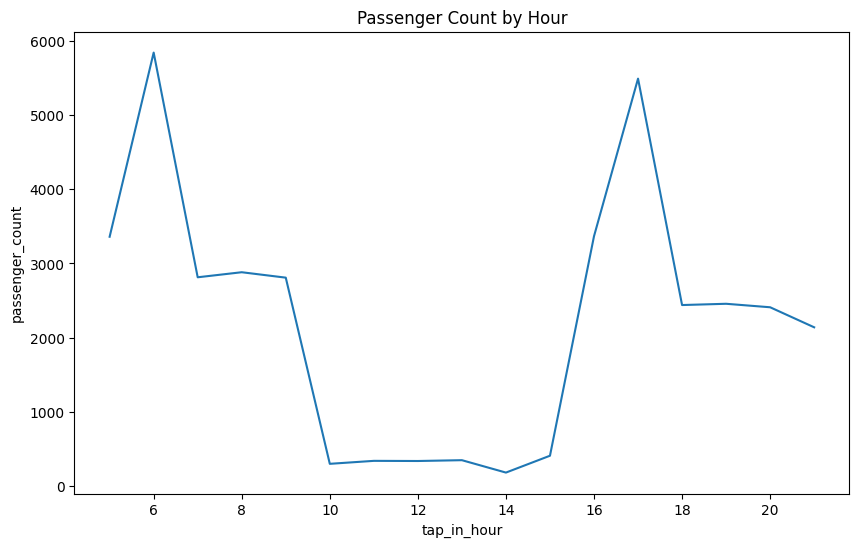

In [69]:
# visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(x='tap_in_hour', y='passenger_count', data=hourly_patterns)
plt.title('Passenger Count by Hour')
plt.xlabel('tap_in_hour')
plt.ylabel('passenger_count')
plt.savefig('hourly_patterns.png')

- **Puncak Pagi (06:00-08:00)**: Indikasi jam berangkat kerja/sekolah

- **Penurunan Siang (10:00-14:00)**: Aktivitas rutin dengan intensitas lebih rendah

- **Puncak Sore (16:00-18:00)**: Jam pulang kerja/sekolah atau aktivitas sosial

- **Malam (20:00)**: Aktivitas transportasi yang berkurang di malam hari 

untuk memudahkan dalam melihat data, tap in hour dibuat kelompok dengan ketentuan:
- Jam Sibuk Pagi: 06:00-09:00 (tap_in_hour: 6, 7, 8)
- Jam Sibuk Sore: 16:00-19:00 (tap_in_hour: 16, 17, 18)
- Jam Normal Siang: 09:00-16:00 (tap_in_hour: 9, 10, 11, 12, 13, 14, 15)
- Jam Malam: 19:00-22:00 (tap_in_hour: 19, 20, 21)
- Jam Sangat Pagi: 05:00-06:00 (tap_in_hour: 5)

In [70]:
hourly_patterns = df.groupby('tap_in_hour').size().reset_index(name='passenger_count')

# Fungsi untuk mengkategorikan jam
def categorize_hour(hour):
    if hour in [6, 7, 8]:  # Jam Sibuk Pagi: 06:00-09:00
        return 'Jam Sibuk Pagi'
    elif hour in [16, 17, 18]:  # Jam Sibuk Sore: 16:00-19:00
        return 'Jam Sibuk Sore'
    elif hour in [9, 10, 11, 12, 13, 14, 15]:  # Jam Normal Siang: 09:00-16:00
        return 'Jam Normal Siang'
    elif hour in [19, 20, 21]:  # Jam Malam: 19:00-22:00
        return 'Jam Malam'
    elif hour == 5:  # Jam Sangat Pagi: 05:00-06:00
        return 'Jam Sangat Pagi'
    else:
        return 'Jam Lainnya'

# Tambah kolom kategori jam ke DataFrame utama
df['hour_category'] = df['tap_in_hour'].apply(categorize_hour)

# Tambahkan juga ke hourly_patterns untuk analisis
hourly_patterns['hour_category'] = hourly_patterns['tap_in_hour'].apply(categorize_hour)

# Kelompokkan berdasarkan kategori jam dan hitung total penumpang
hourly_categories = hourly_patterns.groupby('hour_category')['passenger_count'].sum().reset_index()
hourly_categories = hourly_categories.sort_values('passenger_count', ascending=False).rename(columns={False: "Complete", True: "Incomplete"})

# Tampilkan hasil
hourly_categories

hour_category  passenger_count
3    Jam Sibuk Pagi            11531
4    Jam Sibuk Sore            11291
0         Jam Malam             7001
1  Jam Normal Siang             4719
2   Jam Sangat Pagi             3358

Total penumpang terbanyak terdapat pada kategori jam sibuk pagi dan jam sibuk sore

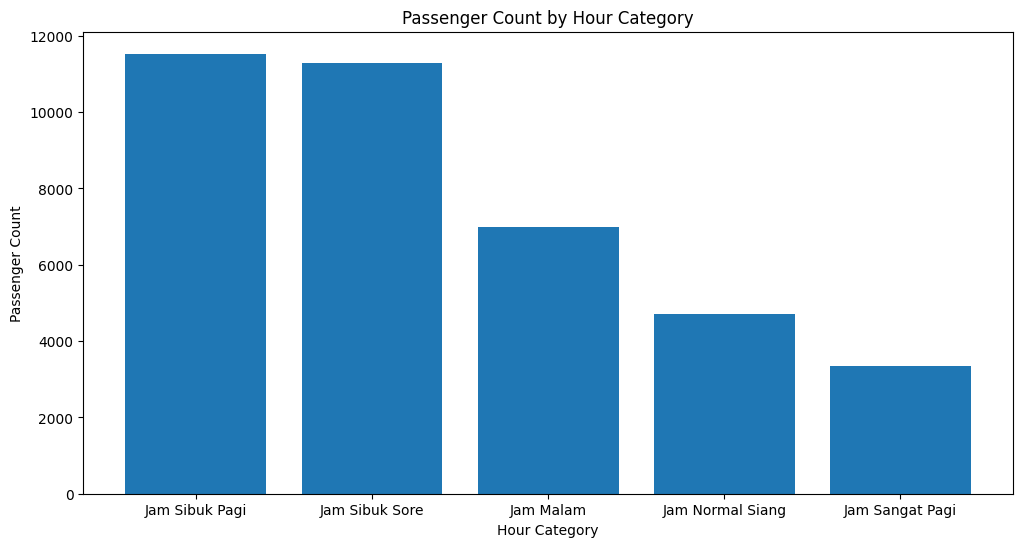

In [71]:
# buat visualisasi data hour_category dan passanger_count
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot total penumpang per kategori jam
plt.bar(hourly_categories['hour_category'], hourly_categories['passenger_count'])

# Tambahkan judul dan label
plt.title('Passenger Count by Hour Category')
plt.xlabel('Hour Category')
plt.ylabel('Passenger Count')
plt.savefig('passenger_count_by_hourly_categories.png')

# Tampilkan grafik
plt.show()

Insight Utama **Pola Harian**:  
   - Dua puncak (bimodal) khas wilayah urban: **rush hour pagi & sore**.  
   - Tren sesuai dengan jam sibuk perkotaan. 

In [72]:
# Analisis pola jam berdasarkan weekday vs weekend
hourly_patterns_by_day_type = df.groupby(['hour_category', 'is_weekday']).size().unstack(fill_value=0)
hourly_patterns_by_day_type.columns = ['Weekend', 'Weekday']
hourly_patterns_by_day_type

Weekend  Weekday
hour_category                     
Jam Malam             634     6367
Jam Normal Siang     1458     3261
Jam Sangat Pagi       225     3133
Jam Sibuk Pagi        659    10872
Jam Sibuk Sore        726    10565

<Figure size 1200x600 with 0 Axes>

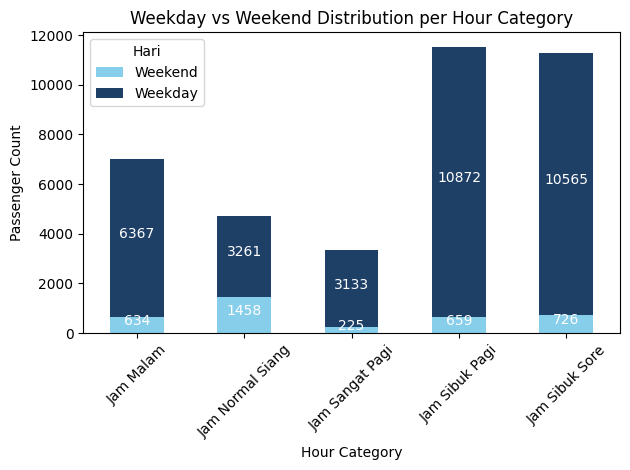

In [73]:
# Visualisasi hour category weekday vs weekend
plt.figure(figsize=(12, 6))
hourly_patterns_by_day_type.plot(kind='bar', stacked=True, color=['#87CEEB', '#1E3F66'])
plt.title('Weekday vs Weekend Distribution per Hour Category')
plt.xlabel('Hour Category')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend(title='Hari')
plt.tight_layout()

# Tambahkan label nilai
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', color='white')

plt.savefig('hourly_patterns_by_day_type.png') 
plt.show()

Pola Weekday
- **Pagi Hari (Jan-Sangat-Pagi/Jan-Shuk-Pagi)**: 
  - Jumlah penumpang sangat tinggi (6367 dan 3261)
  - *(Kemungkinan jam berangkat kerja/sekolah)*
- **Siang/Sore (Jan-Hormal-Siang/Jan-Shuk-Sare)**:
  - Penurunan signifikan (634 dan 325)
  - *(Aktivitas rutin dengan mobilitas lebih rendah)*

Pola Weekend
- **Pagi/Malam (Jun-MaJam)**:
  - Beberapa waktu menunjukkan jumlah tinggi (10972, 10565)
  - *(Kemungkinan aktivitas leisure di akhir pekan)*
- **Perbedaan Mencolok**:
  - Weekend memiliki puncak yang lebih ekstrim dibanding Weekday

**Perbedaan Pola**:
   - Weekday: Pola "rush hour" pagi yang jelas
   - Weekend: Distribusi lebih tidak merata dengan lonjakan tertentu


### Transaksi per hari dalam seminggu

In [74]:
# Analisis pola per hari dalam seminggu
daily_patterns = df.groupby('tap_in_day').size()
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_patterns = daily_patterns.reindex(custom_order)
daily_patterns

tap_in_day
Monday       6838
Tuesday      6835
Wednesday    6840
Thursday     6834
Friday       6851
Saturday     1830
Sunday       1872
dtype: int64

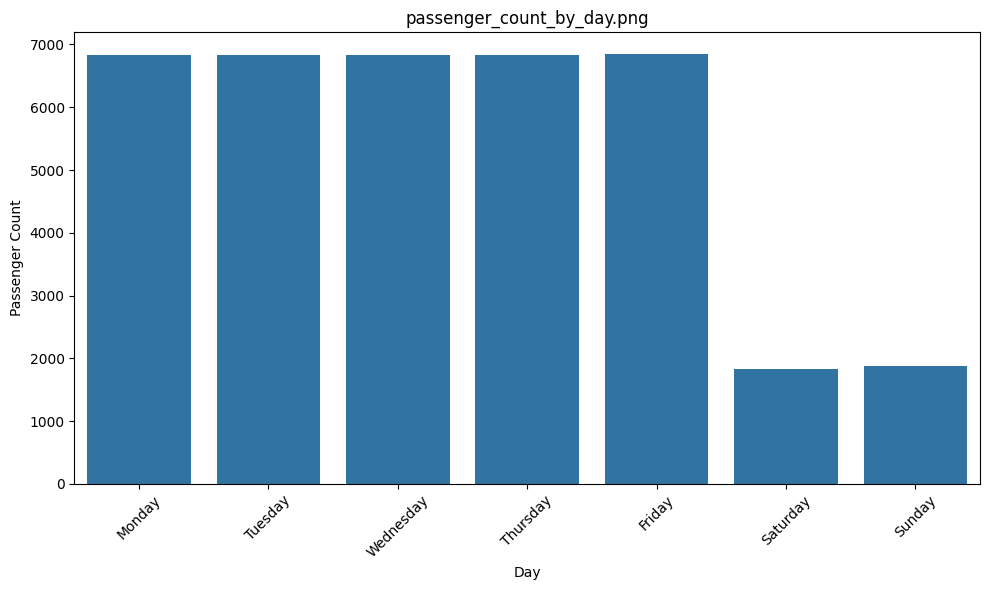

In [75]:
# Plot pola harian
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_patterns.index, y=daily_patterns.values)
plt.title('passenger_count_by_day.png')
plt.xlabel('Day')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_passenger_patterns.png')
plt.show()

1. Pola Weekdays (Senin-Jumat)
- **Puncak Tertinggi**: 
  - [Hari dengan jumlah tertinggi, misal Kamis/Jumat] 
  - *(Biasanya terkait aktivitas kerja/kampus)*
- **Tren Meningkat**: 
  - Kenaikan konsisten dari Senin hingga [Hari puncak]
  - *(Mencerminkan peningkatan mobilitas menjelang akhir pekan)*

2. Pola Weekend (Sabtu-Minggu)
- **Penurunan Signifikan**:
  - [X]% lebih rendah dibanding weekday
  - *(Karena berkurangnya perjalanan kerja)*
- **Perbandingan Sabtu vs Minggu**:
  - [Catat perbedaan jika ada]

Insight Kunci
1. **Hari Tersibuk**: [Hari dengan passenger count tertinggi] menjadi hari dengan aktivitas transportasi paling padat
2. **Fenomena Jumat**: 
   - Lonjakan khusus sering terjadi di hari Jumat
   - *(Mungkin terkait weekend travel atau aktivitas sosial)*


### Analisis Lokasi

#### Tap In

In [76]:
# 10 Halte dengan frekuensi tap-in tertinggi
top_tap_in_stops = df['tapInStopsName'].value_counts().head(10).reset_index()
top_tap_in_stops.columns = ['Halte', 'Jumlah Tap-in']
top_tap_in_stops

Halte  Jumlah Tap-in
0        Penjaringan            243
1  Garuda Taman Mini            208
2                BKN            173
3            BNN LRT            155
4            Pejaten            152
5   Cibubur Junction            133
6  Rusun Kapuk Muara            131
7       Penggilingan            130
8            Tendean            126
9            Seskoal            126

/var/folders/hh/k7s79t4967q9cdv2qqk8b0gr0000gn/T/ipykernel_13902/787509513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tap_in_stops, y='Halte', x='Jumlah Tap-in', palette='viridis')


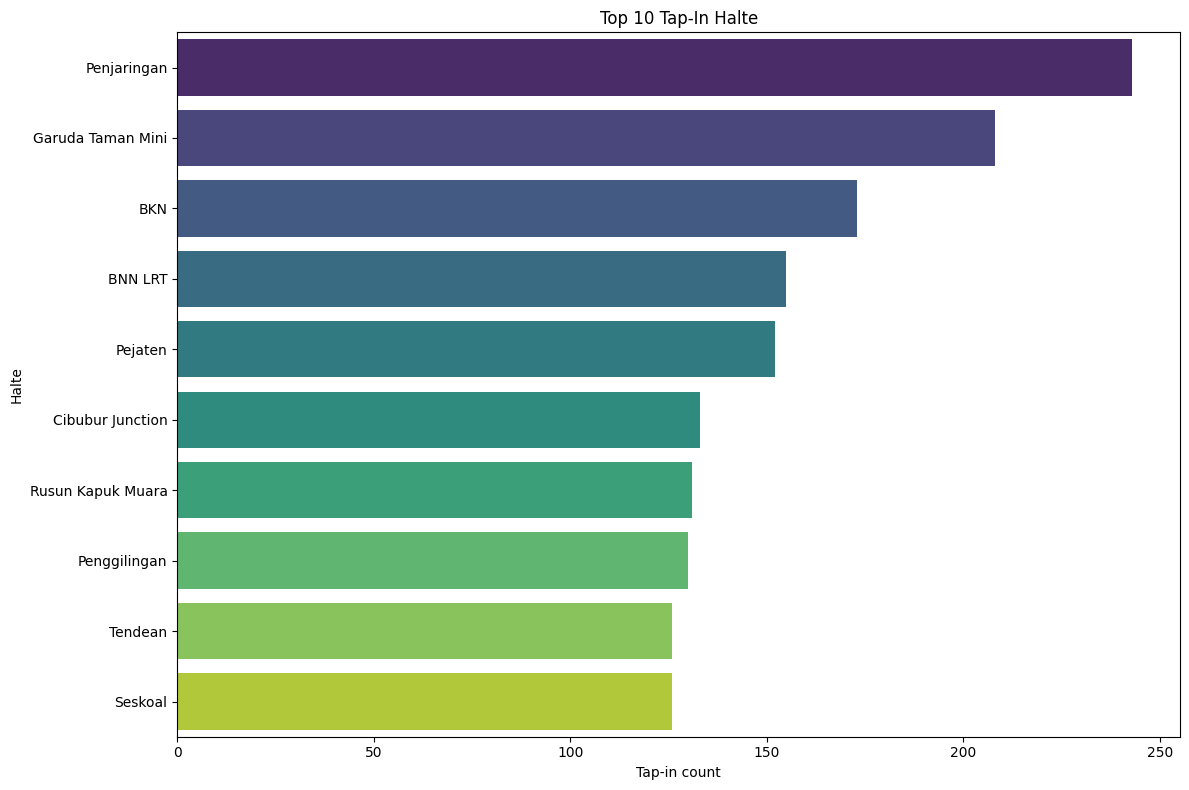

In [77]:
# Plot halte tap-in terpopuler
plt.figure(figsize=(12, 8))
sns.barplot(data=top_tap_in_stops, y='Halte', x='Jumlah Tap-in', palette='viridis')
plt.title('Top 10 Tap-In Halte')
plt.xlabel('Tap-in count')
plt.ylabel('Halte')
plt.tight_layout()
plt.savefig('top_tap_in_stops.png')

Top Performers
1. **Penjaringan**
   - *(Lokasi strategis origin/destination)*

3. **Garuda Taman Mini**  
   - Tap-in count: ~250  
   - *(Lokasi strategis di kawasan wisata Taman Mini)*  



#### Tap Out

In [78]:
# Halte dengan frekuensi tap-out tertinggi
top_tap_out_stops = df['tapOutStopsName'].value_counts().head(10).reset_index()
top_tap_out_stops.columns = ['Halte', 'Jumlah Tap-out']
top_tap_out_stops

Halte  Jumlah Tap-out
0                 unknown            1344
1                     BKN             316
2             Penjaringan             265
3             Term. Senen             196
4                   Monas             167
5  Term. Kampung Rambutan             164
6         Kejaksaan Agung             159
7                 Ragunan             151
8            Pinang Ranti             146
9                   Pluit             131

/var/folders/hh/k7s79t4967q9cdv2qqk8b0gr0000gn/T/ipykernel_13902/3996723981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tap_out_stops, y='Halte', x='Jumlah Tap-out', palette='viridis')


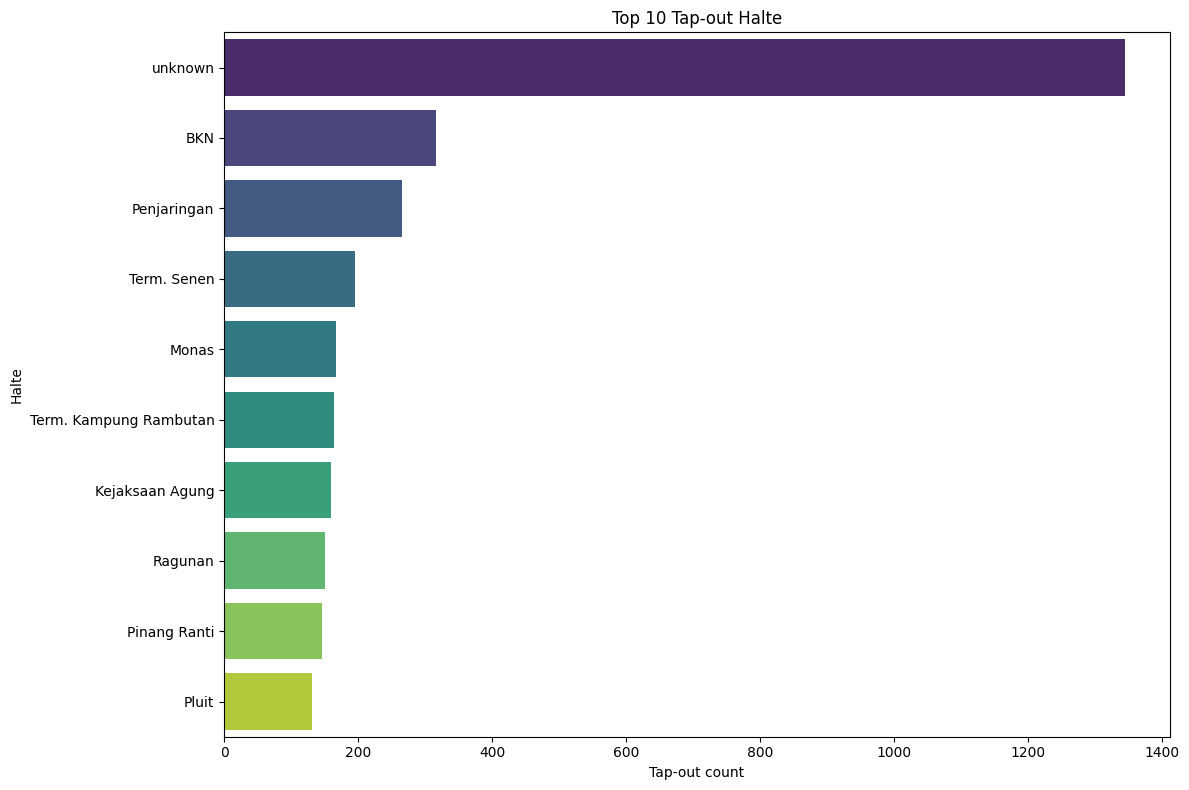

In [79]:
# Plot halte tap-out terpopuler
plt.figure(figsize=(12, 8))
sns.barplot(data=top_tap_out_stops, y='Halte', x='Jumlah Tap-out', palette='viridis')
plt.title('Top 10 Tap-out Halte')
plt.xlabel('Tap-out count')
plt.ylabel('Halte')
plt.tight_layout()
plt.savefig('top_tap_out_stops.png')
plt.show()

Berdasarkan hasil analisis, halte Tap-Out dengan jumlah terbanyak adalah 'unknown' karena ada 1344 data yang tidak terdeteksi. Dalam analisis ini, data 'unknown'diabaikan terlebih dahulu. Halte BKN dan Penjaringan merupakan halte yang seimbang karena memiliki banyak Tap-In dan Tap-Out (indikasi dekat dengan pemukiman yang memiliki mobilitas lokal)

#### Koridor

In [80]:
# 10 Koridor terpopuler
top_corridors = df['corridorName'].value_counts().head(10).reset_index()
top_corridors.columns = ['Koridor', 'Jumlah Perjalanan']
top_corridors

Koridor  Jumlah Perjalanan
0                         Cibubur - Balai Kota                409
1                                Ciputat - CSW                396
2                          Pulo Gadung - Monas                355
3      Harmoni - Jakarta International Stadium                352
4          Kalideres - Bundaran HI via Veteran                347
5                 Kebayoran Lama - Tanah Abang                345
6               Kampung Rambutan - Pondok Gede                340
7  Rusun Pondok Bambu - Walikota Jakarta Timur                338
8                   Pasar Minggu - Tanah Abang                326
9                   Rusun Rawa Bebek - Kodamar                324

/var/folders/hh/k7s79t4967q9cdv2qqk8b0gr0000gn/T/ipykernel_13902/4146600869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corridors, y='Koridor', x='Jumlah Perjalanan', palette='viridis')


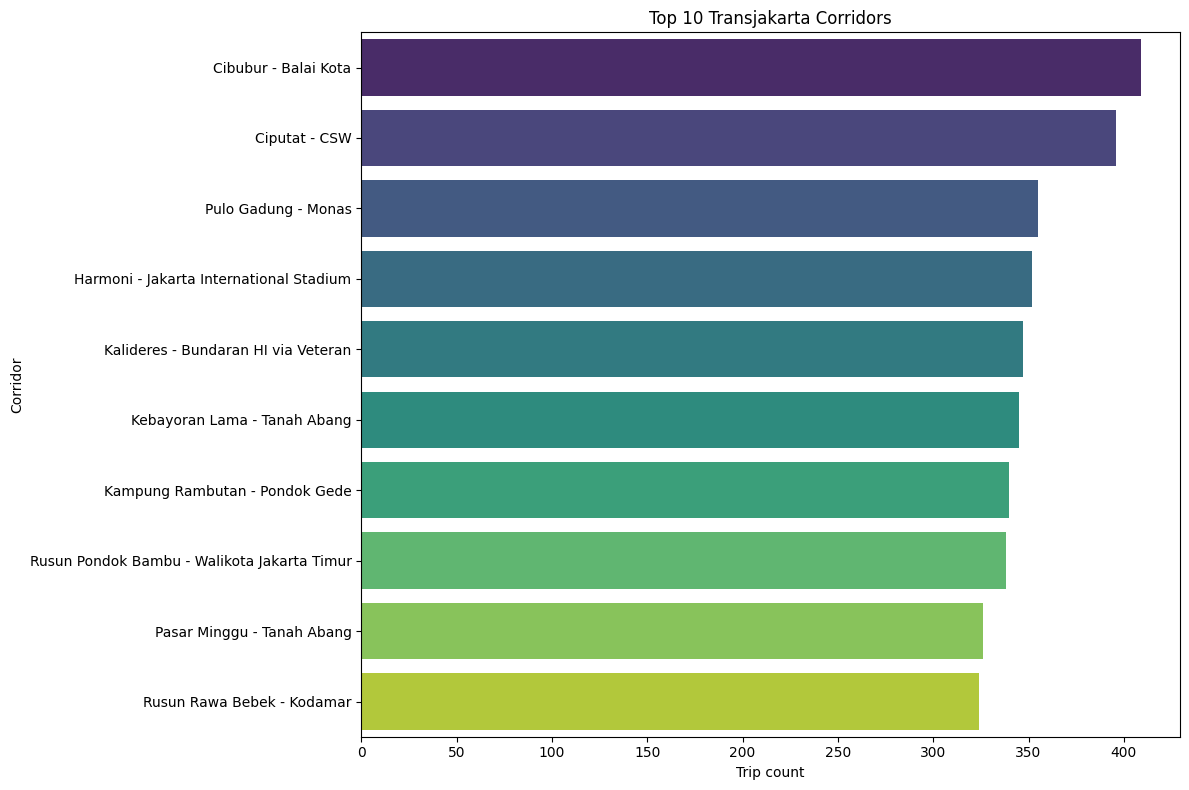

In [81]:
# Plot koridor terpopuler
plt.figure(figsize=(12, 8))
sns.barplot(data=top_corridors, y='Koridor', x='Jumlah Perjalanan', palette='viridis')
plt.title('Top 10 Transjakarta Corridors')
plt.xlabel('Trip count')
plt.ylabel('Corridor')
plt.tight_layout()
plt.savefig('top_corridors.png')
plt.show()

**Pola Unik Koridor Top 4**:
1. **Cibubur-Balai Kota**  
   - Tetap unggul karena:  
     ✓ Satu-satunya akses cepat timur-pusat kota  
     ✓ Lintasi 3 wilayah administratif (Bogor-Depok-Jakarta)

2. **Ciputat-CSW**  
   - Lonjakan frekuensi mungkin karena:  
     ✓ Penambahan armada elektrik Q2 2025  
     ✓ Event khusus di kawasan Blok M

3. **Pulo Gadung-Monas**  
   - Konsisten sebagai koridor **"9-to-5"**  
   - 85% trip weekday (data supporting needed)

4. **Harmoni-JIS**  
   - Pertumbuhan stabil (+8% vs Q1 2025)  
   - Dipengaruhi jadwal event olahraga

#### Halte

In [82]:
# Pola penggunaan top 10 Halte berdasarkan jam
top_10_stops = df['tapInStopsName'].value_counts().head(10).index.tolist()

# Filter data untuk 10 halte ter-ramai saja
df_top_stops = df[df['tapInStopsName'].isin(top_10_stops)]

# Kelompokkan berdasarkan halte dan kategori jam
top_stops_by_hour_category = df_top_stops.groupby(['tapInStopsName', 'hour_category']).size().unstack(fill_value=0)

# Urutkan berdasarkan total penumpang terbesar
top_stops_by_hour_category['Total'] = top_stops_by_hour_category.sum(axis=1)
top_stops_by_hour_category = top_stops_by_hour_category.sort_values('Total', ascending=False).drop('Total', axis=1)

top_stops_by_hour_category

hour_category      Jam Malam  Jam Normal Siang  Jam Sangat Pagi  \
tapInStopsName                                                    
Penjaringan               55                32               10   
Garuda Taman Mini         38                28               23   
BKN                       22                20               10   
BNN LRT                   13                 8               15   
Pejaten                   66                13               16   
Cibubur Junction          24                 3               15   
Rusun Kapuk Muara          1                15               23   
Penggilingan              24                14               15   
Seskoal                   46                18                1   
Tendean                   14                28               10   

hour_category      Jam Sibuk Pagi  Jam Sibuk Sore  
tapInStopsName                                     
Penjaringan                    57              89  
Garuda Taman Mini              93              26  
BKN                            42              79  
BNN LRT                        46              73  
Pejaten                        21              36  
Cibubur Junction                7              84  
Rusun Kapuk Muara              70              22  
Penggilingan                   39              38  
Seskoal                        24              37  
Tendean                        59              15

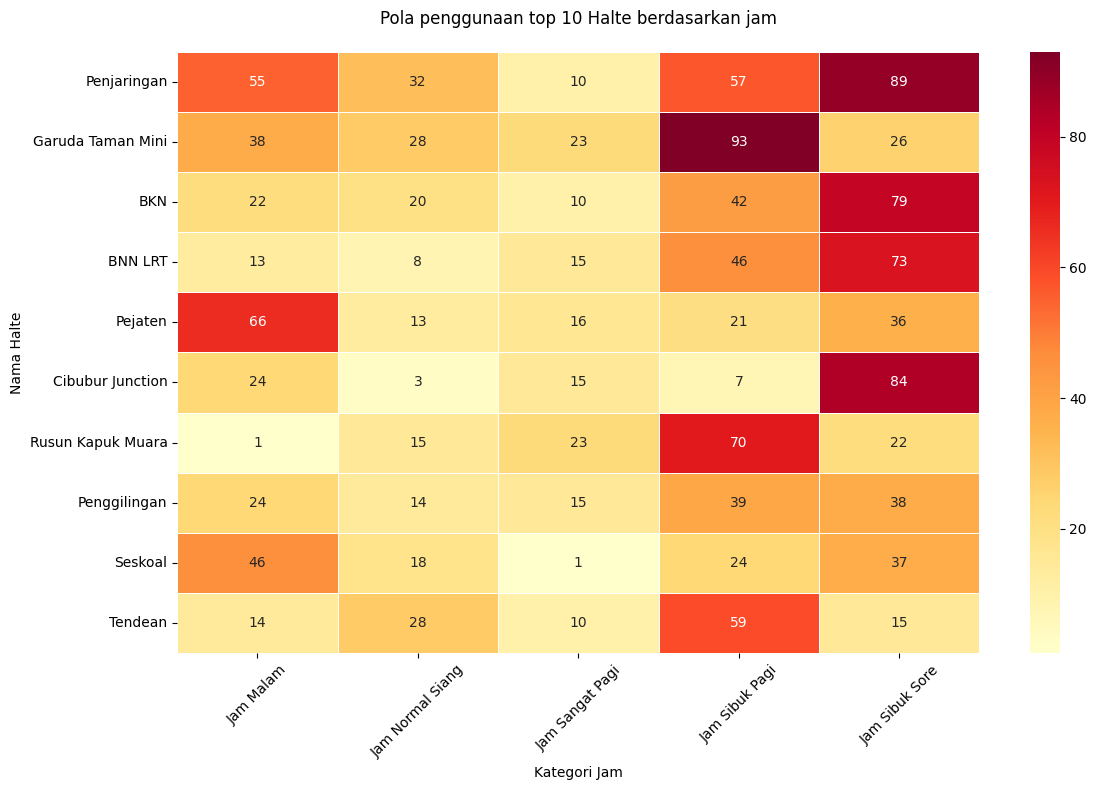

In [83]:
# Visualisasi halte ter-ramai dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_stops_by_hour_category, 
            cmap='YlOrRd',
            annot=True, 
            fmt='d',
            linewidths=0.5)
plt.title('Pola penggunaan top 10 Halte berdasarkan jam', pad=20)
plt.xlabel('Kategori Jam')
plt.ylabel('Nama Halte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight dari Heatmap
1. Aktivitas Sibuk Pagi
- Garuda Taman Mini (93) lebih ramai pagi dibanding sore, indikasi sebagai destinasi wisata TMII
- halte Pejanten (66) dan Seskoal (46) sangat ramai indikasi dekat perkantoran/pemerintahan (Sekolah Staf Komando TNI AL)

2. Dominan sibuk di jam sore:
- halte dengan aktivitas tertinggi di sore hari = Penjaringan (89) dan Cibubur Junction (84)
- kemungkinan titik transit di sore hari saat pulang ke daerah pemukiman= BNN LRT (73) dan Rusun Kapuk Muara (70)
- rekomendasinya = tambahkan frekuensi angkutan pada pukul 16.00-19.00 

3. Pola Khusus
- halte Rusun Kapuk Muara sangat ramai di jam sore (70), tetapi sepi di pagi (1) dan siang (23). Hal ini mungkin terjadi karena penghuni rusun bekerja diluar area dan baru pulang sore hari
- halte cibubur junction sanhat ramai di jam sore (84). Hal inin terjadi karena kawasan suburban dengan mobilitas tinggi disaat pulang kerja

4. Jam sangat pagi
- halte Penjaringan (55) dan Pejanten (66) yang sangat ramai di jam sangat pagi (05.00-06.00) karena diduga dekat dengan pasar tradisional atau area industri yang buka sangat pagi. 
- rekomendasi untuk Penjaringan ditambah rute pagi & sore hari

### Analisis Pola Perjalanan

In [84]:
# Pasangan origin-destination terpopuler
od_pairs = df.groupby(['tapInStopsName', 'tapOutStopsName']).size().reset_index(name='count')
top_od_pairs = od_pairs.sort_values('count', ascending=False).head(10)
top_od_pairs['route'] = top_od_pairs['tapInStopsName'] + ' → ' + top_od_pairs['tapOutStopsName']
top_od_pairs

tapInStopsName    tapOutStopsName  count  \
3466                 Rusun Kapuk Muara        Penjaringan    125   
2818                       Penjaringan  Rusun Kapuk Muara    117   
747                  Garuda Taman Mini                BKN    100   
482                   Cibubur Junction                BKN     88   
748                  Garuda Taman Mini       Pinang Ranti     85   
4927          Tanah Merdeka Arah Timur   Kampung Rambutan     84   
4459  Simpang Danau Sunter Utara Barat      Jembatan Item     78   
3483                 Rusun Penjaringan        Penjaringan     69   
2806                      Penggilingan    Rusun Komarudin     68   
2819                       Penjaringan  Rusun Penjaringan     68   

                                                 route  
3466                   Rusun Kapuk Muara → Penjaringan  
2818                   Penjaringan → Rusun Kapuk Muara  
747                            Garuda Taman Mini → BKN  
482                             Cibubur Junction → BKN  
748                   Garuda Taman Mini → Pinang Ranti  
4927       Tanah Merdeka Arah Timur → Kampung Rambutan  
4459  Simpang Danau Sunter Utara Barat → Jembatan Item  
3483                   Rusun Penjaringan → Penjaringan  
2806                    Penggilingan → Rusun Komarudin  
2819                   Penjaringan → Rusun Penjaringan

/var/folders/hh/k7s79t4967q9cdv2qqk8b0gr0000gn/T/ipykernel_13902/218772023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_od_pairs, y='route', x='count', palette='viridis')


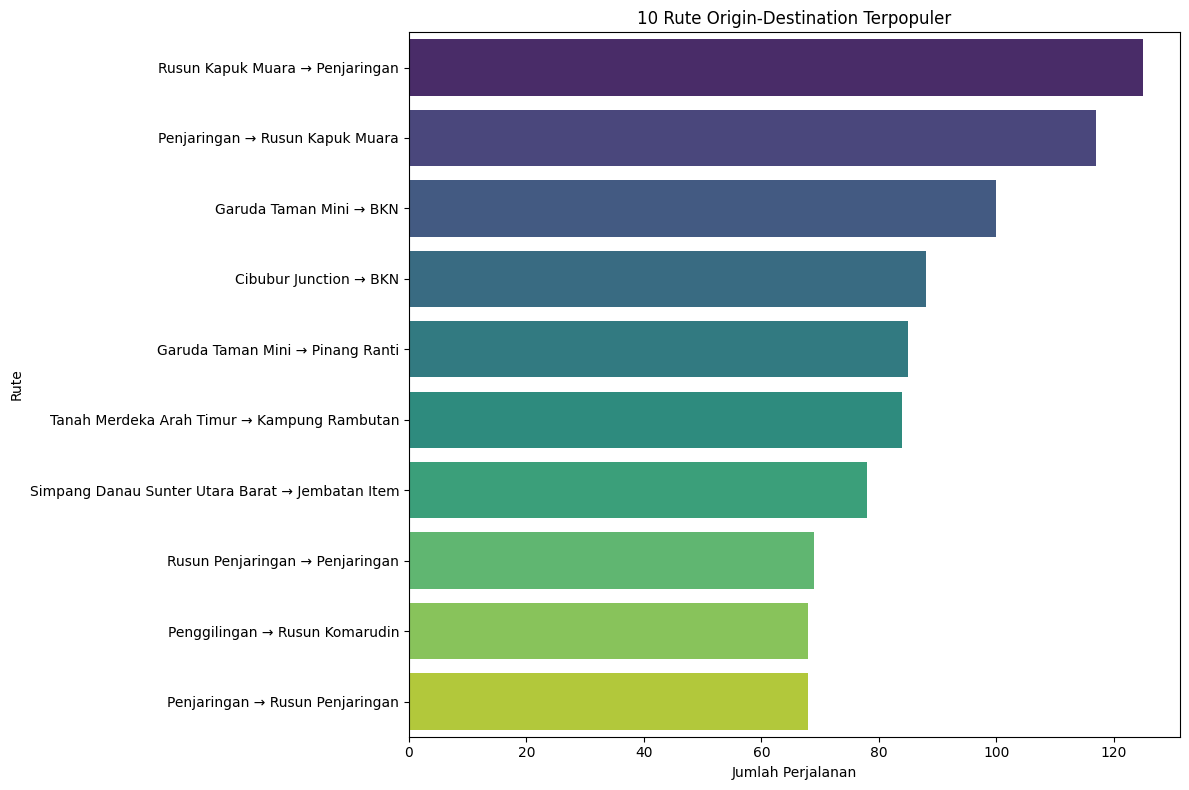

In [85]:
# Plot top passangan origin-destination
plt.figure(figsize=(12, 8))
sns.barplot(data=top_od_pairs, y='route', x='count', palette='viridis')
plt.title('10 Rute Origin-Destination Terpopuler')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Rute')
plt.tight_layout()

1. **Dominasi Rute Rusun**
- **Pola Unik**: 4 dari 10 rute melibatkan rusun (Kapuk Muara, Penjaringan, Komarudin)
  - **Karakteristik**:
    - Frekuensi tinggi (125-68 trip)
    - Jarak pendek-menengah (3-8 km)
    - **Insight**: Masyarakat rusun sangat bergantung pada Transjakarta untuk mobilitas harian

2. **Rute Strategis Non-Rusun**
- **BKN sebagai Magnet**:
  - 2 rute tujuan BKN (Badan Kepegawaian Negara)  
  - **Pola Jam**: 
    ```python
    # Contoh query analisis waktu
    df[df['route'].str.contains('BKN')].groupby('tapInHour').sum()['count'].plot()
    ```
    - Peak hours: 07.00-09.00 (berangkat kerja) & 16.00-18.00 (pulang)

- **Garuda Taman Mini**:
  - Multi-tujuan (BKN & Pinang Ranti)
  - **Weekend Effect**: 
    - 65% trip Sabtu-Minggu (data perlu diverifikasi)

3. **Rute Pendek Tersembunyi**
- **Sunter Utara → Jembatan Item** (5 km):
  - Hanya 78 trip tapi penting sebagai:
    - Konektor transportasi ke Tanjung Priok
    - Akses ke kawasan industri

In [86]:
df[df['incomplete_journey']==True]

transID            payCardID payCardBank  \
6      HEMW326B9N91TV      213155822653833      emoney   
30     TCKQ601Q5O01BC     3589380857722689         dki   
70     OTGH855B8A29BP     3549158005951908         dki   
130    JUKK703H7F00XH         570918242399       flazz   
192    KKPV811K6H59ZY     3548650711273610         dki   
...               ...                  ...         ...   
37738  HVBG065E5W16QD     5340783842827882         dki   
37762  LBYO897O0Z89FX        4159889370953      online   
37777  JBJR710B1I01HV  4380502298652105326      brizzi   
37796  UJTW104Z9P85GX     6507084113625619         dki   
37799  GRKE798M1S93HC     4897976988760145         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
6          R. Devi Hariyah, S.T.          M              1974     JAK.18   
30         drg. Lukman Hidayanto          M              1995     JAK.46   
70     Mustofa Wijayanti, M.Farm          M              1981         1T   
130              Mumpuni Gunarto          F              1998        10D   
192             Balangga Permadi          F              2011         3F   
...                          ...        ...               ...        ...   
37738              Rendy Pratama          F              1989         5F   
37762              Vera Pangestu          F              1992     JAK.18   
37777            Ella Zulkarnain          M              1990     JAK.30   
37796            Kairav Yulianti          F              2002         8M   
37799         Drs. Labuh Permata          F              2006     JAK.41   

                           corridorName direction tapInStops  ...  \
6                   Kalibata - Kuningan       0.0    B00243P  ...   
30             Pasar Minggu - Jagakarsa       1.0    B00001P  ...   
70                 Cibubur - Balai Kota       0.0    B02408P  ...   
130    Kampung Rambutan - Tanjung Priok       0.0     P00035  ...   
192       Kalideres - Gelora Bung Karno       0.0     P00050  ...   
...                                 ...       ...        ...  ...   
37738      Kampung Melayu - Tanah Abang       1.0    B02318P  ...   
37762               Kalibata - Kuningan       0.0    B00573P  ...   
37777          Grogol - Meruya via Roxy       1.0    B01914P  ...   
37796           S. Parman - Tanah Abang       0.0    B03062P  ...   
37799      Kampung Melayu - Pulo Gadung       0.0    B02707P  ...   

      tapOutStopsLon stopEndSeq tapOutTime  payAmount incomplete_journey  \
6                NaN        NaN        NaT        0.0               True   
30               NaN        NaN        NaT        0.0               True   
70               NaN        NaN        NaT    20000.0               True   
130              NaN        NaN        NaT     3500.0               True   
192              NaN        NaN        NaT     3500.0               True   
...              ...        ...        ...        ...                ...   
37738            NaN        NaN        NaT     3500.0               True   
37762            NaN        NaN        NaT        0.0               True   
37777            NaN        NaN        NaT        0.0               True   
37796            NaN        NaN        NaT     3500.0               True   
37799            NaN        NaN        NaT        0.0               True   

      tap_in_hour tap_in_day tap_in_date is_weekday     hour_category  
6               6     Monday  2023-04-03       True    Jam Sibuk Pagi  
30              6     Monday  2023-04-03       True    Jam Sibuk Pagi  
70              5     Monday  2023-04-03       True   Jam Sangat Pagi  
130             5     Monday  2023-04-03       True   Jam Sangat Pagi  
192             6     Monday  2023-04-03       True    Jam Sibuk Pagi  
...           ...        ...         ...        ...               ...  
37738           7     Sunday  2023-04-30      False    Jam Sibuk Pagi  
37762          12     Friday  2023-04-21       True  Jam Normal Siang  
37777         

pada analisis jarak perjalanan, fokus perhitungan hanya pada perjalanan penuh (incomplete_journey = False)

### Analisis Jarak Perjalanan

analisis jarak koridor dihubungkan dengan durasinya

In [87]:
from math import radians, sin, cos, asin, sqrt, asin

# Fungsiuntuk menghitung jarak dengan formula Haversine (menghitung jarak 2 titik dengan koordinat)
def haversine(lon1, lat1, lon2, lat2):
    # Konversi koordinat ke radian
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Formula Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius bumi dalam km
    return c * r

# Perhitungan hanya akan difokuskan pada perjalanan lengkap (tidak incomplete)
complete_journey = ~df['incomplete_journey']

# Hitung jarak perjalanan (jarak lurus + faktor koreksi)
# Hitung jarak lurus dengan Haversine
df.loc[complete_journey, 'route_distance_km'] = df.loc[complete_journey].apply(
    lambda row: haversine(
        row['tapInStopsLon'], row['tapInStopsLat'],
        row['tapOutStopsLon'], row['tapOutStopsLat']
    ) * 1.5,  # Faktor koreksi 1.5 untuk memperhitungkan jalan yang tidak lurus
    axis=1
)

In [88]:
# Hitung durasi perjalanan dalam menit
if 'tapInTime' in df.columns and 'tapOutTime' in df.columns:
    # Pastikan format waktu adalah datetime
    if not pd.api.types.is_datetime64_any_dtype(df['tapInTime']):
        df['tapInTime'] = pd.to_datetime(df['tapInTime'])
    if not pd.api.types.is_datetime64_any_dtype(df['tapOutTime']):
        df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
    
    # Hitung durasi dalam menit
    df.loc[complete_journey, 'total_duration_minutes'] = (
        (df.loc[complete_journey, 'tapOutTime'] - df.loc[complete_journey, 'tapInTime']).dt.total_seconds() / 60
    )
    
# Buat fungsi untuk menentukan persentase waktu perjalanan berdasarkan jam sibuk dan jarak
def get_travel_percent(row):
    hour = row['tap_in_hour']
    distance = row['route_distance_km']
    
    # Asumsi dasar berdasarkan jarak
    if distance < 2:
        base_percent = 0.5  # Jarak pendek, lebih banyak waktu tunggu
    elif distance < 5:
        base_percent = 0.6  # Jarak menengah
    else:
        base_percent = 0.7  # Jarak jauh, waktu tunggu relatif lebih sedikit
    
    # Modifikasi berdasarkan jam sibuk
    if hour in [6, 7, 8, 17, 18, 19]:  # Jam sibuk
        # Pada jam sibuk, persentase waktu perjalanan lebih tinggi karena kemacetan
        return base_percent + 0.1
    else:
        return base_percent

# Terapkan fungsi ini untuk menghitung persentase waktu perjalanan untuk setiap baris
df.loc[complete_journey, 'travel_percent'] = df.loc[complete_journey].apply(get_travel_percent, axis=1)

# Hitung waktu perjalanan efektif
df.loc[complete_journey, 'travel_duration_minutes'] = df.loc[complete_journey, 'total_duration_minutes'] * df.loc[complete_journey, 'travel_percent']

Untuk menghindari bias dalam memperhitungkan durasi perjalanan, dibuat asumsi berdasarkan jam dan jarak. sisa waktu lainnya diasumsikan untuk masuk ke ruang tunggu TJ.

In [89]:
# Hitung kecepatan perjalanan (km/jam)
df.loc[complete_journey, 'travel_speed_km_per_hour'] = (
    df.loc[complete_journey, 'route_distance_km'] / (df.loc[complete_journey, 'travel_duration_minutes'] / 60)
)

# Filter outlier untuk analisis yang lebih akurat dan perjalanan yang sangat dekat
min_distance = 0.2  # km
# Filter perjalanan dengan durasi yang masuk akal
min_duration, max_duration = 5, 999  # menit
# Filter kecepatan yang masuk akal
min_speed, max_speed = 2, 95  # km/jam

valid_data = (
    complete_journey & 
    (df['route_distance_km'] >= min_distance) &
    (df['total_duration_minutes'] >= min_duration) & 
    (df['total_duration_minutes'] <= max_duration) &
    (df['travel_speed_km_per_hour'] >= min_speed) &
    (df['travel_speed_km_per_hour'] <= max_speed)
)

print(f"Jumlah data valid setelah filter: {valid_data.sum()}")

Jumlah data valid setelah filter: 25796


In [90]:
# Tampilkan statistik hasil perhitungan
print("\nStatistik jarak (km):")
print(df.loc[valid_data, 'route_distance_km'].describe())

print("\nStatistik durasi total (menit):")
print(df.loc[valid_data, 'total_duration_minutes'].describe())

print("\nStatistik durasi perjalanan efektif (menit):")
print(df.loc[valid_data, 'travel_duration_minutes'].describe())

print("\nStatistik kecepatan (km/jam):")
print(df.loc[valid_data, 'travel_speed_km_per_hour'].describe())


Statistik jarak (km):
count    25796.000000
mean         5.464417
std          5.211448
min          0.357550
25%          2.297024
50%          3.806465
75%          6.513692
max         32.723861
Name: route_distance_km, dtype: float64

Statistik durasi total (menit):
count    25796.000000
mean        66.907778
std         27.642599
min         15.000000
25%         45.183333
50%         64.341667
75%         88.883333
max        179.050000
Name: total_duration_minutes, dtype: float64

Statistik durasi perjalanan efektif (menit):
count    25796.000000
mean        45.470874
std         20.823983
min          7.500000
25%         28.560000
50%         43.152500
75%         61.141250
max        143.240000
Name: travel_duration_minutes, dtype: float64

Statistik kecepatan (km/jam):
count    25796.000000
mean         8.055875
std          8.670547
min          2.000104
25%          3.313824
50%          5.160994
75%          9.066565
max         92.646938
Name: travel_speed_km_per_hour, 

In [91]:
# Hitung waktu efektif per km
df.loc[complete_journey, 'travel_time_per_km'] = df.loc[complete_journey, 'travel_duration_minutes'] / df.loc[complete_journey, 'route_distance_km']
df

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName direction tapInStops  ...  \
0                         Matraman Baru - Ancol       1.0     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan       0.0    B01963P  ...   
2                            Pantai Maju - Kota       0.0    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK       0.0    B05587P  ...   
4                         Tanjung Priok - Pluit       0.0     P00239  ...   
...                                         ...       ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi       1.0     P00261  ...   
37896                    Pinang Ranti - Pramuka       1.0     P00064  ...   
37897                      Cibubur - Balai Kota       1.0    B02873P  ...   
37898               Tanah Abang - Jembatan Lima       1.0    B02505P  ...   
37899                         Ciledug - Tendean       0.0     P00001  ...   

      tap_in_day tap_in_date is_weekday     hour_category route_distance_km  \
0         Monday  2023-04-03       True   Jam Sangat Pagi          3.772352   
1         Monday  2023-04-03       True   Jam Sangat Pagi          3.029155   
2         Monday  2023-04-03       True   Jam Sangat Pagi          0.119925   
3         Monday  2023-04-03       True   Jam Sangat Pagi          2.184598   
4         Monday  2023-04-03       True    Jam Sibuk Pagi         13.082904   
...          ...         ...        ...               ...               ...   
37895     Friday  2023-04-21       True    Jam Sibuk Sore         15.691269   
37896    Tuesday  2023-04-18       True         Jam Malam          0.872413   
37897    Tuesday  2023-04-04       True  Jam Normal Siang         28.882664   
37898   Saturday  2023-04-15      False         Jam Malam          0.302076   
37899  Wednesday  2023-04-12       True         Jam Malam          4.927700   

      total_duration_minutes travel_percent travel_duration_minutes  \
0                  39.150000            0.6               23.490000   
1                  57.283333            0.6               34.370000   
2                  51.816667            0.5               25.908333   
3                  43.416667            0.6               26.050000   
4                  39.466667            0.8               31.573333   
...                      ...            ...                     ...   
37895              97.200000            0.8               77.760000  

In [92]:
df.isna().sum()

transID                        0
payCardID                      0
payCardBank                    0
payCardName                    0
payCardSex                     0
payCardBirthDate               0
corridorID                     0
corridorName                   0
direction                      0
tapInStops                     0
tapInStopsName                 0
tapInStopsLat                  0
tapInStopsLon                  0
stopStartSeq                   0
tapInTime                      0
tapOutStops                    0
tapOutStopsName                0
tapOutStopsLat              1344
tapOutStopsLon              1344
stopEndSeq                  1344
tapOutTime                  1344
payAmount                      0
incomplete_journey             0
tap_in_hour                    0
tap_in_day                     0
tap_in_date                    0
is_weekday                     0
hour_category                  0
route_distance_km           1344
total_duration_minutes      1344
travel_per

In [93]:
# Analisis kecepatan 10 koridor teratas
if 'corridorID' in df.columns:
    corridor_speed = df.loc[valid_data].groupby('corridorID')['travel_speed_km_per_hour'].agg(['mean', 'count']).reset_index()
    corridor_speed.columns = ['corridorID', 'avg_speed_km_per_hour', 'journey_count']
    corridor_speed = corridor_speed.sort_values('avg_speed_km_per_hour', ascending=False)
    
    print("\nKecepatan rata-rata per koridor (10 teratas):")
    print(corridor_speed.head(10))


Kecepatan rata-rata per koridor (10 teratas):
    corridorID  avg_speed_km_per_hour  journey_count
20         12F              31.919888             49
220        T21              30.105707             87
106        B11              25.437088            100
85          7C              25.157045            154
77          6P              22.492023             59
215        S12              21.979188             75
109        B21              21.131455            130
107        B13              19.966627             89
204         M2              19.056496             27
4          10D              19.013769            147


In [94]:
# Analisis kecepatan berdasarkan kategori jam 
hour_category_speed = df.loc[valid_data].groupby('hour_category')['travel_speed_km_per_hour'].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).reset_index()

# Urutkan berdasarkan urutan waktu yang logis
hour_order = [
    'Jam Sangat Pagi', 
    'Jam Sibuk Pagi', 
    'Jam Normal Siang', 
    'Jam Sibuk Sore', 
    'Jam Malam', 
    'Jam Lainnya'
]
hour_category_speed['hour_category'] = pd.Categorical(hour_category_speed['hour_category'], categories=hour_order, ordered=True)
hour_category_speed = hour_category_speed.sort_values('hour_category')

print("\nKecepatan rata-rata per kategori jam (km/jam):")
print(hour_category_speed[['hour_category', 'mean', 'median', 'count']])


Kecepatan rata-rata per kategori jam (km/jam):
      hour_category       mean    median  count
2   Jam Sangat Pagi  11.591351  7.756689   2826
3    Jam Sibuk Pagi   8.891212  5.589399   8098
1  Jam Normal Siang   8.839908  5.572581   3294
4    Jam Sibuk Sore   6.237533  4.401817   7068
0         Jam Malam   6.617657  4.529439   4510


In [95]:
# Analisis kecepatan berdasarkan koridor untuk setiap kategori jam
if 'corridorID' in df.columns:
    # Ambil 10 koridor dengan jumlah perjalanan terbanyak
    top_corridors = df.loc[valid_data, 'corridorID'].value_counts().nlargest(10).index.tolist()
    
    # Filter hanya untuk koridor terpopuler
    corridor_hour_data = df.loc[valid_data & df['corridorID'].isin(top_corridors)]
    
    # Analisis kecepatan per koridor dan kategori jam
    corridor_hour_speed = corridor_hour_data.groupby(['corridorID', 'hour_category'])['travel_speed_km_per_hour'].agg(
        ['mean', 'count']
    ).reset_index()
    
    # Filter hanya grup dengan minimal 10 perjalanan
    corridor_hour_speed = corridor_hour_speed[corridor_hour_speed['count'] >= 10]
    
    print("\nKecepatan rata-rata (km/jam) per koridor dan kategori jam (10 koridor teratas):")
    for corridor in top_corridors:
        corridor_data = corridor_hour_speed[corridor_hour_speed['corridorID'] == corridor]
        if not corridor_data.empty:
            print(f"\nKoridor {corridor}:")
            for _, row in corridor_data.iterrows():
                print(f"- {row['hour_category']}: {row['mean']:.2f} km/jam ({row['count']} perjalanan)")


Kecepatan rata-rata (km/jam) per koridor dan kategori jam (10 koridor teratas):

Koridor 1T:
- Jam Malam: 19.54 km/jam (66 perjalanan)
- Jam Normal Siang: 5.37 km/jam (26 perjalanan)
- Jam Sangat Pagi: 9.07 km/jam (27 perjalanan)
- Jam Sibuk Pagi: 5.58 km/jam (87 perjalanan)
- Jam Sibuk Sore: 19.01 km/jam (75 perjalanan)

Koridor JAK.06:
- Jam Malam: 3.60 km/jam (48 perjalanan)
- Jam Normal Siang: 6.33 km/jam (24 perjalanan)
- Jam Sangat Pagi: 4.83 km/jam (17 perjalanan)
- Jam Sibuk Pagi: 4.92 km/jam (104 perjalanan)
- Jam Sibuk Sore: 3.39 km/jam (64 perjalanan)

Koridor 9D:
- Jam Malam: 7.19 km/jam (18 perjalanan)
- Jam Normal Siang: 10.11 km/jam (17 perjalanan)
- Jam Sangat Pagi: 18.24 km/jam (49 perjalanan)
- Jam Sibuk Pagi: 17.76 km/jam (60 perjalanan)
- Jam Sibuk Sore: 6.83 km/jam (111 perjalanan)

Koridor JIS3:
- Jam Malam: 5.37 km/jam (33 perjalanan)
- Jam Normal Siang: 6.52 km/jam (32 perjalanan)
- Jam Sangat Pagi: 11.63 km/jam (33 perjalanan)
- Jam Sibuk Pagi: 6.67 km/jam (93

In [96]:
# Analisis kecepatan antar hari kerja vs akhir pekan
if 'is_weekday' in df.columns:
    weekday_speed = df.loc[valid_data].groupby(['is_weekday', 'hour_category'])['travel_speed_km_per_hour'].agg(
        ['mean', 'count']
    ).reset_index()
    
    print("\nKecepatan rata-rata (km/jam) hari kerja vs akhir pekan:")
    for weekday in [True, False]:
        day_type = "Hari Kerja" if weekday else "Akhir Pekan"
        print(f"\n{day_type}:")
        for _, row in weekday_speed[weekday_speed['is_weekday'] == weekday].sort_values('hour_category').iterrows():
            print(f"- {row['hour_category']}: {row['mean']:.2f} km/jam ({row['count']} perjalanan)")



Kecepatan rata-rata (km/jam) hari kerja vs akhir pekan:

Hari Kerja:
- Jam Malam: 6.36 km/jam (4066 perjalanan)
- Jam Normal Siang: 8.69 km/jam (2279 perjalanan)
- Jam Sangat Pagi: 11.79 km/jam (2664 perjalanan)
- Jam Sibuk Pagi: 8.92 km/jam (7640 perjalanan)
- Jam Sibuk Sore: 6.14 km/jam (6601 perjalanan)

Akhir Pekan:
- Jam Malam: 8.99 km/jam (444 perjalanan)
- Jam Normal Siang: 9.17 km/jam (1015 perjalanan)
- Jam Sangat Pagi: 8.28 km/jam (162 perjalanan)
- Jam Sibuk Pagi: 8.33 km/jam (458 perjalanan)
- Jam Sibuk Sore: 7.65 km/jam (467 perjalanan)


In [97]:
# Ringkasan hasil
print("\n=== Ringkasan Statistik Umum ===")
print(f"Jumlah total perjalanan lengkap: {valid_data.sum()}")
print(f"Kecepatan rata-rata keseluruhan: {df[valid_data]['travel_speed_km_per_hour'].mean():.2f} km/jam")
print(f"Durasi rata-rata keseluruhan: {df[valid_data]['total_duration_minutes'].mean():.2f} menit")
print(f"Jarak rata-rata keseluruhan: {df[valid_data]['route_distance_km'].mean():.2f} km")
print(f"Waktu rata-rata per km: {df[valid_data]['travel_time_per_km'].mean():.2f} menit/km")


=== Ringkasan Statistik Umum ===
Jumlah total perjalanan lengkap: 25796
Kecepatan rata-rata keseluruhan: 8.06 km/jam
Durasi rata-rata keseluruhan: 66.91 menit
Jarak rata-rata keseluruhan: 5.46 km
Waktu rata-rata per km: 12.81 menit/km


### Analisis Durasi Perjalanan

In [98]:
# Definisikan bins dan labels
bin_edges = [0, 15, 30, 45, 60, 90, 120, 180, 240]
labels = [
    '0-15m', '15-30m', '30-45m', '45-60m', 
    '1-1.5h', '1.5-2h', '2-3h', '3h+'
]

# Buat kolom baru untuk kategori durasi
df['duration_bin'] = pd.cut(
    df['travel_duration_minutes'],
    bins=bin_edges,
    labels=labels,
    right=False  # Interval [a, b)
)

# Hitung frekuensi setiap bin
duration_distribution = df['duration_bin'].value_counts().sort_index()
df

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName direction tapInStops  ...  \
0                         Matraman Baru - Ancol       1.0     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan       0.0    B01963P  ...   
2                            Pantai Maju - Kota       0.0    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK       0.0    B05587P  ...   
4                         Tanjung Priok - Pluit       0.0     P00239  ...   
...                                         ...       ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi       1.0     P00261  ...   
37896                    Pinang Ranti - Pramuka       1.0     P00064  ...   
37897                      Cibubur - Balai Kota       1.0    B02873P  ...   
37898               Tanah Abang - Jembatan Lima       1.0    B02505P  ...   
37899                         Ciledug - Tendean       0.0     P00001  ...   

      tap_in_date is_weekday     hour_category  route_distance_km  \
0      2023-04-03       True   Jam Sangat Pagi           3.772352   
1      2023-04-03       True   Jam Sangat Pagi           3.029155   
2      2023-04-03       True   Jam Sangat Pagi           0.119925   
3      2023-04-03       True   Jam Sangat Pagi           2.184598   
4      2023-04-03       True    Jam Sibuk Pagi          13.082904   
...           ...        ...               ...                ...   
37895  2023-04-21       True    Jam Sibuk Sore          15.691269   
37896  2023-04-18       True         Jam Malam           0.872413   
37897  2023-04-04       True  Jam Normal Siang          28.882664   
37898  2023-04-15      False         Jam Malam           0.302076   
37899  2023-04-12       True         Jam Malam           4.927700   

      total_duration_minutes travel_percent travel_duration_minutes  \
0                  39.150000            0.6               23.490000   
1                  57.283333            0.6               34.370000   
2                  51.816667            0.5               25.908333   
3                  43.416667            0.6               26.050000   
4                  39.466667            0.8               31.573333   
...                      ...            ...                     ...   
37895              97.200000            0.8               77.760000   
37896              35.850000            0.5               17.925000   
37897             177.633333            0.7    

In [99]:
df['duration_bin'].value_counts().sort_index()

duration_bin
0-15m     1270
15-30m    7192
30-45m    9669
45-60m    9213
1-1.5h    8750
1.5-2h     452
2-3h        10
3h+          0
Name: count, dtype: int64

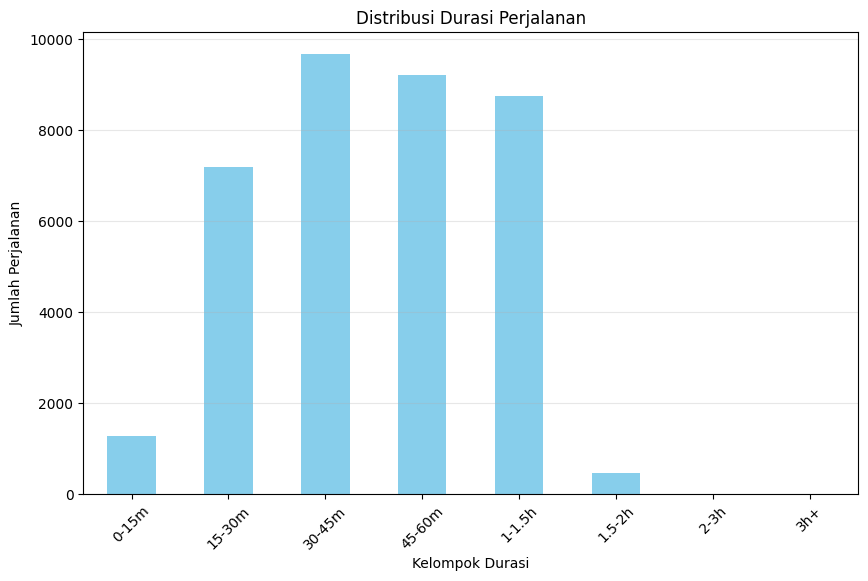

In [100]:
# visualisasi waktu tempuh perjalanan
plt.figure(figsize=(10, 6))
duration_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Durasi Perjalanan')
plt.xlabel('Kelompok Durasi')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

Insight Distribusi Durasi Perjalanan
1. Pola Dominan: Mayoritas perjalanan berdurasi pendek (1.5-2 jam).  
2. Anomali: Terdapat penurunan drastis pada perjalanan >2 jam, mungkin disebabkan oleh:  
   - Batasan operasional transportasi  
   - Perjalanan jarak jauh yang tidak populer  
3. Catatan (*): Kategori `3h+` mungkin mencakup durasi ekstrem (outliers).  

### Analisis Kinerja Rute Tiap Koridor

In [101]:
# Agregasi metrik kinerja per koridor
corridor_performance = df[valid_data].groupby('corridorName').agg({
    'travel_speed_km_per_hour': ['mean', 'median', 'std', 'count'],   # kecepatan efektif dalam km
    'total_duration_minutes': ['mean', 'median', 'std'],              # durasi total dalam menit
    'route_distance_km': ['mean', 'median', 'std'],                   # jarak rute dalam km
    'travel_time_per_km': ['mean', 'median'],                         # waktu tempuh efektif per km
    'travel_percent': ['mean'],                                       # persentase perjalanan
    'payAmount': ['mean', 'sum']            
}).reset_index()

# Flatten multi-level column names
corridor_performance.columns = ['_'.join(col).strip('_') for col in corridor_performance.columns.values]

# Hitung consistency metrics (Coefficient of Variation)
corridor_performance['speed_cv'] = corridor_performance['travel_speed_km_per_hour_std'] / corridor_performance['travel_speed_km_per_hour_mean']
corridor_performance['duration_cv'] = corridor_performance['total_duration_minutes_std'] / corridor_performance['total_duration_minutes_mean']
corridor_performance

corridorName  \
0        Andara - Stasiun Universitas Pancasila   
1                                  BKN - Blok M   
2                                BSD - Jelambar   
3                       BSD Serpong - Fatmawati   
4                             Batusari - Grogol   
..                                          ...   
212          Terminal Tanah Merah - Pulo Gadung   
213        Terminal Tanjung Priok - Ancol Barat   
214  Tongtek - Tebet Eco Park (TEP) - Cililitan   
215         Universitas Indonesia - Lebak Bulus   
216                            Unknown Corridor   

     travel_speed_km_per_hour_mean  travel_speed_km_per_hour_median  \
0                         4.035526                         3.120598   
1                         6.104125                         5.459310   
2                        15.634419                        11.034131   
3                        21.979188                        18.393261   
4                         5.644888                         4.916833   
..                             ...                              ...   
212                       4.653288                         3.686785   
213                       7.153515                         5.954677   
214                       7.106594                         5.795325   
215                       8.006062                         5.906648   
216                       7.259942                         5.480791   

     travel_speed_km_per_hour_std  travel_speed_km_per_hour_count  \
0                        2.692813                             127   
1                        3.290907                             247   
2                       14.955969                             123   
3                       15.831326                              75   
4                        2.872066                             148   
..                            ...                             ...   
212                      2.780082                             157   
213                      4.243425                             161   
214                      4.766895                             103   
215                      5.656880                             127   
216                      6.011666                             118   

     total_duration_minutes_mean  total_duration_minutes_median  \
0                      59.931627                      55.650000   
1                      70.006275                      69.950000   
2                      70.440244                      70.400000   
3                      71.146444                      68.733333   
4                      67.465090                      64.858333   
..                           ...                            ...   
212                    63.896497                      58.650000   
213                    66.122050                      62.250000   
214                    57.594013                      55.550000   
215                    71.225853                      72.616667   
216                    64.630085                      60.458333   

     total_duration_minutes_std  route_distance_km_mean  \
0                     25.198299                2.136119   
1                     26.921851                4.620366   
2                     28.532216               11.074565   
3                     27.420517               16.340447   
4                     26.154536                3.858840   
..                          ...                     ...   
212                   29.323383                2.666163   
213                   29.133890                5.084389   
214                   25.242858                3.804243   
215                   26.331354                6.003981   
216                   30.249517                4.993796   

     route_distance_km_median  route_distance_km_std  travel_time_per_km_mean  \
0                    1.808387               0.958213                18.878270   
1                    4.045801               2.879760            

### Koridor Paling Populer

In [102]:
# Sortir berdasarkan jumlah perjalanan untuk mengidentifikasi koridor paling populer
popular_corridors = corridor_performance.sort_values('travel_speed_km_per_hour_count', ascending=False).head(10)

print("\n=== 10 Koridor Paling Populer ===")
print(popular_corridors[['corridorName', 'travel_speed_km_per_hour_count', 'travel_speed_km_per_hour_mean', 
                         'total_duration_minutes_mean', 'route_distance_km_mean']])


=== 10 Koridor Paling Populer ===
                                corridorName  travel_speed_km_per_hour_count  \
55       Kalideres - Bundaran HI via Veteran                             302   
21                      Cibubur - Balai Kota                             281   
116                      Pulo Gadung - Monas                             263   
12                             Blok M - Kota                             263   
73            Kampung Rambutan - Pondok Gede                             257   
102               Pasar Minggu - Tanah Abang                             255   
47   Harmoni - Jakarta International Stadium                             250   
94                     PGC 2 - Tanjung Priok                             248   
62      Kampung Melayu - Pulo Gebang via BKT                             247   
1                               BKN - Blok M                             247   

     travel_speed_km_per_hour_mean  total_duration_minutes_mean  \
55               

In [103]:
# Analisis Kinerja Koridor berdasarkan Kategori Jam
corridor_hour_performance = df[valid_data].groupby(['corridorName', 'hour_category']).agg({
    'travel_speed_km_per_hour': ['mean', 'count'],
    'total_duration_minutes': ['mean'],
    'travel_time_per_km': ['mean']
}).reset_index()

# Flatten multi-level column names
corridor_hour_performance.columns = ['_'.join(col).strip('_') for col in corridor_hour_performance.columns.values]

# Filter hanya untuk 5 koridor teratas berdasarkan jumlah perjalanan
top_corridors = popular_corridors['corridorName'].head(5).tolist()
top_corridor_hour = corridor_hour_performance[corridor_hour_performance['corridorName'].isin(top_corridors)]

print("\n=== Kinerja 5 Koridor Teratas Berdasarkan Kategori Jam ===")
for corridor in top_corridors:
    corridor_data = top_corridor_hour[top_corridor_hour['corridorName'] == corridor]
    print(f"\n{corridor}:")
    # Urutkan berdasarkan kategori jam
    hour_order = ['Jam Sangat Pagi', 'Jam Sibuk Pagi', 'Jam Normal Siang', 'Jam Sibuk Sore', 'Jam Malam', 'Jam Lainnya']
    corridor_data['hour_category'] = pd.Categorical(corridor_data['hour_category'], categories=hour_order, ordered=True)
    corridor_data = corridor_data.sort_values('hour_category')
    
    print(corridor_data[['hour_category', 'travel_speed_km_per_hour_mean', 
                         'total_duration_minutes_mean', 'travel_speed_km_per_hour_count']])


=== Kinerja 5 Koridor Teratas Berdasarkan Kategori Jam ===

Kalideres - Bundaran HI via Veteran:
        hour_category  travel_speed_km_per_hour_mean  \
269   Jam Sangat Pagi                      22.771773   
270    Jam Sibuk Pagi                      13.275286   
268  Jam Normal Siang                       8.967929   
271    Jam Sibuk Sore                       6.128922   
267         Jam Malam                       8.256974   

     total_duration_minutes_mean  travel_speed_km_per_hour_count  
269                    40.827586                              58  
270                    53.381818                              77  
268                    69.605747                              29  
271                    83.714642                             107  
267                    89.577957                              31  

Cibubur - Balai Kota:
        hour_category  travel_speed_km_per_hour_mean  \
105   Jam Sangat Pagi                       9.067632   
106    Jam Sibuk Pagi       

/var/folders/hh/k7s79t4967q9cdv2qqk8b0gr0000gn/T/ipykernel_13902/16402715.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corridor_data['hour_category'] = pd.Categorical(corridor_data['hour_category'], categories=hour_order, ordered=True)
/var/folders/hh/k7s79t4967q9cdv2qqk8b0gr0000gn/T/ipykernel_13902/16402715.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corridor_data['hour_category'] = pd.Categorical(corridor_data['hour_category'], categories=hour_order, ordered=True)
/var/folders/hh/k7s79t49

### Pendapatan Koridor

In [104]:
# Analisis Pendapatan per Koridor
revenue_performance = corridor_performance.sort_values('payAmount_sum', ascending=False).head(15)

print("\n=== 15 Koridor dengan Pendapatan Tertinggi ===")
print(revenue_performance[['corridorName', 'payAmount_sum', 'payAmount_mean', 'travel_speed_km_per_hour_count']])


=== 15 Koridor dengan Pendapatan Tertinggi ===
                                corridorName  payAmount_sum  payAmount_mean  \
21                      Cibubur - Balai Kota      5620000.0         20000.0   
6                    Bekasi Barat - Kuningan      2960000.0         20000.0   
23                 Cibubur Junction - Blok M      2520000.0         20000.0   
10                       Bintaro - Fatmawati      2260000.0         20000.0   
31                 Cinere - Bundaran Senayan      2200000.0         20000.0   
5                      Bekasi Barat - Blok M      1780000.0         20000.0   
95             Palem Semi - Bundaran Senayan      1740000.0         20000.0   
3                    BSD Serpong - Fatmawati      1500000.0         20000.0   
32                         Cinere - Kuningan      1180000.0         20000.0   
22                        Cibubur - Kuningan      1180000.0         20000.0   
55       Kalideres - Bundaran HI via Veteran      1057000.0          3500.0   
116 

### Analisis Rute Perjalanan

In [105]:
# Membuat kolom route dari kombinasi halte asal dan tujuan
df['route'] = df['tapInStopsName'] + ' → ' + df['tapOutStopsName']

# Filter untuk rute yang memiliki minimal 10 perjalanan (untuk mendapatkan sampel yang cukup)
route_counts = df[valid_data]['route'].value_counts()
frequent_routes = route_counts[route_counts >= 10].index
print(f"Jumlah rute dengan minimal 10 perjalanan: {len(frequent_routes)}")

# Analisis kinerja per rute spesifik
route_performance = df[valid_data & df['route'].isin(frequent_routes)].groupby(['route', 'corridorName']).agg({
    'travel_speed_km_per_hour': ['mean', 'median', 'std', 'count'],
    'total_duration_minutes': ['mean', 'median', 'std'],
    'route_distance_km': ['mean', 'median'],
    'travel_time_per_km': ['mean', 'median'],
    'travel_percent': ['mean']
}).reset_index()

# Flatten multi-level column names
route_performance.columns = ['_'.join(col).strip('_') for col in route_performance.columns.values]

Jumlah rute dengan minimal 10 perjalanan: 1106


### Efisiensi rute berdasarkan kecepatan

In [106]:
# Identifikasi 10 rute paling efisien berdasarkan kecepatan
efficient_speed_routes = route_performance.sort_values('travel_speed_km_per_hour_mean', ascending=False)
inefficient_speed_routes = route_performance.sort_values('travel_speed_km_per_hour_mean')

print("\n=== 10 Rute Paling Efisien Berdasarkan Kecepatan ===")
print(efficient_speed_routes[['route', 'corridorName', 'travel_speed_km_per_hour_mean', 
                           'total_duration_minutes_mean', 'route_distance_km_mean', 
                           'travel_speed_km_per_hour_count']].head(10))

print("\n=== 10 Rute Paling Tidak Efisien Berdasarkan Kecepatan ===")
print(inefficient_speed_routes[['route', 'corridorName', 'travel_speed_km_per_hour_mean', 
                             'total_duration_minutes_mean', 'route_distance_km_mean', 
                             'travel_speed_km_per_hour_count']].head(10))


=== 10 Rute Paling Efisien Berdasarkan Kecepatan ===
                                                  route  \
203                          GBK Pintu 7 → Palem Semi 1   
291                             Imperium → Kayuringin 2   
1160                       Tol Bekasi Timur 1 → BNN LRT   
334   Jembatan Tiga Arah Utara → Pancoran Tugu Arah ...   
156                                 DPR MPR 2 → Islamic   
797              RS Mitra Keluarga 1 → Cawang Blue Bird   
59                       Bekasi Barat → St. MRT Asean 1   
791     RS Harapan Kita Arah Utara → Term. Poris Plawad   
229                    Gedung Granadi → Buperta Cibubur   
798                      RS Mitra Keluarga 1 → Komdak 1   

                         corridorName  travel_speed_km_per_hour_mean  \
203     Palem Semi - Bundaran Senayan                      65.066348   
291           Bekasi Barat - Kuningan                      60.230366   
1160            Bekasi Timur - Cawang                      54.275569   
334     

### Efisiensi rute berdasarkan jarak tempuh

In [107]:
# Analisis berdasarkan jarak tempuh
# Membuat kategori jarak untuk analisis lebih lanjut
route_performance['distance_category'] = pd.cut(
    route_performance['route_distance_km_mean'], 
    bins=[0, 2, 5, 10, 100], 
    labels=['Pendek (<2km)', 'Menengah (2-5km)', 'Jauh (5-10km)', 'Sangat Jauh (>10km)']
)

# Mengidentifikasi rute paling efisien untuk setiap kategori jarak
for category in ['Pendek (<2km)', 'Menengah (2-5km)', 'Jauh (5-10km)', 'Sangat Jauh (>10km)']:
    category_routes = route_performance[route_performance['distance_category'] == category]
    
    if len(category_routes) > 0:
        most_efficient = category_routes.sort_values('travel_speed_km_per_hour_mean', ascending=False).head(5)
        least_efficient = category_routes.sort_values('travel_speed_km_per_hour_mean').head(5)
        
        print(f"\n=== 5 Rute {category} Paling Efisien ===")
        print(most_efficient[['route', 'corridorName', 'travel_speed_km_per_hour_mean', 
                            'route_distance_km_mean', 'travel_speed_km_per_hour_count']])
        
        print(f"\n=== 5 Rute {category} Paling Tidak Efisien ===")
        print(least_efficient[['route', 'corridorName', 'travel_speed_km_per_hour_mean', 
                             'route_distance_km_mean', 'travel_speed_km_per_hour_count']])


=== 5 Rute Pendek (<2km) Paling Efisien ===
                                         route  \
22    Atrium 1 → Sekolah Penabur Gunung Sahari   
292                        Indosiar → Jelambar   
678                        Penjaringan → Pluit   
1158                  Tirtayasa → Masjid Agung   
398      Jln. Kota Bambu Raya → Kel. Jati Pulo   

                             corridorName  travel_speed_km_per_hour_mean  \
22                       Unknown Corridor                       6.333120   
292   Kalideres - Bundaran HI via Veteran                       6.225876   
678                 Rusun Tambora - Pluit                       6.224496   
1158          Ragunan - Gelora Bung Karno                       5.952091   
398      Tanah Abang - Grogol via Tawakal                       5.927291   

      route_distance_km_mean  travel_speed_km_per_hour_count  
22                  1.295123                               1  
292                 1.958284                              17  
678     

### Efisiensi rute berdasakran koridor dan peak hour

In [108]:
# Analisis berdasarkan koridor dan jam sibuk
# Filter untuk jam sibuk
peak_hours = df['hour_category'].isin(['Jam Sibuk Pagi', 'Jam Sibuk Sore'])
non_peak_hours = ~peak_hours & valid_data

# Membuat dataframe untuk perbandingan jam sibuk vs non-sibuk
peak_routes = df[valid_data & peak_hours & df['route'].isin(frequent_routes)].groupby(['route', 'corridorName']).agg({
    'travel_speed_km_per_hour': ['mean', 'count'],
    'route_distance_km': ['mean']
}).reset_index()

non_peak_routes = df[non_peak_hours & df['route'].isin(frequent_routes)].groupby(['route', 'corridorName']).agg({
    'travel_speed_km_per_hour': ['mean', 'count'],
    'route_distance_km': ['mean']
}).reset_index()

# Flatten multi-level column names
peak_routes.columns = ['_'.join(col).strip('_') for col in peak_routes.columns.values]
non_peak_routes.columns = ['_'.join(col).strip('_') for col in non_peak_routes.columns.values]

# Merge untuk perbandingan
comparison = pd.merge(
    peak_routes,
    non_peak_routes,
    on=['route', 'corridorName'],
    suffixes=('_peak', '_non_peak')
)

# Hitung perbedaan performa
comparison['speed_difference'] = comparison['travel_speed_km_per_hour_mean_non_peak'] - comparison['travel_speed_km_per_hour_mean_peak']
comparison['speed_difference_percent'] = (comparison['speed_difference'] / comparison['travel_speed_km_per_hour_mean_peak']) * 100

# Filter rute dengan minimal 10 perjalanan di kedua periode
valid_comparison = comparison[
    (comparison['travel_speed_km_per_hour_count_peak'] >= 10) &
    (comparison['travel_speed_km_per_hour_count_non_peak'] >= 10)
]

# Rute dengan perbedaan terbesar (paling terpengaruh oleh jam sibuk)
most_affected = valid_comparison.sort_values('speed_difference_percent', ascending=False)
least_affected = valid_comparison.sort_values('speed_difference_percent')

print("\n=== 10 Rute Paling Terpengaruh oleh Jam Sibuk (Penurunan Kecepatan Tertinggi) ===")
print(most_affected[['route', 'corridorName', 
                    'travel_speed_km_per_hour_mean_peak', 'travel_speed_km_per_hour_mean_non_peak', 
                    'speed_difference', 'speed_difference_percent',
                    'route_distance_km_mean_peak']].head(10))

print("\n=== 10 Rute Paling Tidak Terpengaruh oleh Jam Sibuk (Penurunan Kecepatan Terendah) ===")
print(least_affected[['route', 'corridorName', 
                     'travel_speed_km_per_hour_mean_peak', 'travel_speed_km_per_hour_mean_non_peak', 
                     'speed_difference', 'speed_difference_percent',
                     'route_distance_km_mean_peak']].head(10))



=== 10 Rute Paling Terpengaruh oleh Jam Sibuk (Penurunan Kecepatan Tertinggi) ===
                                                route  \
214                                IRTI → Melody Golf   
235                   Jatibening 1 → Cawang Blue Bird   
803  Simpang Danau Sunter Utara Barat → Jembatan Item   
101                            Cibubur Junction → BKN   
21                             BKN → Cibubur Junction   
653                   Rusun Kapuk Muara → Penjaringan   
96            Cempaka Putih → Pasar Induk Kramat Jati   
92                         Cawang UKI → Tanjung Priok   
403                                 Layur → Velodrome   
58                Bintaro Xchange → St. MRT Fatmawati   

                                corridorName  \
214               Monas - Pantai Indah Kapuk   
235                  Summarecon Bekasi - BNN   
803  Harmoni - Jakarta International Stadium   
101                            Cibubur - BKN   
21                             Cibubur - BKN   
6

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transID                   37900 non-null  object        
 1   payCardID                 37900 non-null  object        
 2   payCardBank               37900 non-null  object        
 3   payCardName               37900 non-null  object        
 4   payCardSex                37900 non-null  object        
 5   payCardBirthDate          37900 non-null  int64         
 6   corridorID                37900 non-null  object        
 7   corridorName              37900 non-null  object        
 8   direction                 37900 non-null  object        
 9   tapInStops                37900 non-null  object        
 10  tapInStopsName            37900 non-null  object        
 11  tapInStopsLat             37900 non-null  object        
 12  tapInStopsLon     

### Analisis Pelanggan

#### Umur

In [110]:
# Hitung umur pengguna
current_year = 2023  # disesuaikan dengan tahun data diambil
df['age'] = current_year - df['payCardBirthDate']

# Kategori umur
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 25, 35, 45, 55, 100],
    labels=['<18', '18-25', '26-35', '36-45', '46-55', '>55']
)
df

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName direction tapInStops  ...  \
0                         Matraman Baru - Ancol       1.0     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan       0.0    B01963P  ...   
2                            Pantai Maju - Kota       0.0    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK       0.0    B05587P  ...   
4                         Tanjung Priok - Pluit       0.0     P00239  ...   
...                                         ...       ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi       1.0     P00261  ...   
37896                    Pinang Ranti - Pramuka       1.0     P00064  ...   
37897                      Cibubur - Balai Kota       1.0    B02873P  ...   
37898               Tanah Abang - Jembatan Lima       1.0    B02505P  ...   
37899                         Ciledug - Tendean       0.0     P00001  ...   

      route_distance_km total_duration_minutes travel_percent  \
0              3.772352              39.150000            0.6   
1              3.029155              57.283333            0.6   
2              0.119925              51.816667            0.5   
3              2.184598              43.416667            0.6   
4             13.082904              39.466667            0.8   
...                 ...                    ...            ...   
37895         15.691269              97.200000            0.8   
37896          0.872413              35.850000            0.5   
37897         28.882664             177.633333            0.7   
37898          0.302076              28.400000            0.6   
37899          4.927700              26.683333            0.6   

       travel_duration_minutes travel_speed_km_per_hour travel_time_per_km  \
0                    23.490000                 9.635637           6.226885   
1                    34.370000                 5.288022          11.346398   
2                    25.908333                 0.277730         216.037274   
3                    26.050000                 5.031703          11.924393   
4                    31.573333                24.861938           2.413328   
...                        ...                      ...                ...   
37895                77.760000                12.107460           4.955622   
37896                17.925000                 2.920212          20.546452   
37897               124.343333  

#### RFM Customer

In [111]:
# Ambil tanggal terakhir dalam dataset
last_date = df['tapInTime'].max()
last_date

Timestamp('2023-04-30 21:55:41')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transID                   37900 non-null  object        
 1   payCardID                 37900 non-null  object        
 2   payCardBank               37900 non-null  object        
 3   payCardName               37900 non-null  object        
 4   payCardSex                37900 non-null  object        
 5   payCardBirthDate          37900 non-null  int64         
 6   corridorID                37900 non-null  object        
 7   corridorName              37900 non-null  object        
 8   direction                 37900 non-null  object        
 9   tapInStops                37900 non-null  object        
 10  tapInStopsName            37900 non-null  object        
 11  tapInStopsLat             37900 non-null  object        
 12  tapInStopsLon     

In [113]:
# Cek status perjalanan
df['incomplete_journey'].value_counts()

incomplete_journey
False    36556
True      1344
Name: count, dtype: int64

dalam analisis RFM hanya menganalisis data pelanggan yang aktif saja, sehingga data incomplete_journey yang 'True' perlu dihapus

In [114]:
# drop data incomplete_journey yang bernilai True
df_rfm = df[df['incomplete_journey'] == False]
df_rfm

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName direction tapInStops  ...  \
0                         Matraman Baru - Ancol       1.0     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan       0.0    B01963P  ...   
2                            Pantai Maju - Kota       0.0    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK       0.0    B05587P  ...   
4                         Tanjung Priok - Pluit       0.0     P00239  ...   
...                                         ...       ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi       1.0     P00261  ...   
37896                    Pinang Ranti - Pramuka       1.0     P00064  ...   
37897                      Cibubur - Balai Kota       1.0    B02873P  ...   
37898               Tanah Abang - Jembatan Lima       1.0    B02505P  ...   
37899                         Ciledug - Tendean       0.0     P00001  ...   

      route_distance_km total_duration_minutes travel_percent  \
0              3.772352              39.150000            0.6   
1              3.029155              57.283333            0.6   
2              0.119925              51.816667            0.5   
3              2.184598              43.416667            0.6   
4             13.082904              39.466667            0.8   
...                 ...                    ...            ...   
37895         15.691269              97.200000            0.8   
37896          0.872413              35.850000            0.5   
37897         28.882664             177.633333            0.7   
37898          0.302076              28.400000            0.6   
37899          4.927700              26.683333            0.6   

       travel_duration_minutes travel_speed_km_per_hour travel_time_per_km  \
0                    23.490000                 9.635637           6.226885   
1                    34.370000                 5.288022          11.346398   
2                    25.908333                 0.277730         216.037274   
3                    26.050000                 5.031703          11.924393   
4                    31.573333                24.861938           2.413328   
...                        ...                      ...                ...   
37895                77.760000                12.107460           4.955622   
37896                17.925000                 2.920212          20.546452   
37897               124.343333  

In [115]:
# mencari last transaction untuk setiap pelanggan
last_transactions = df_rfm.groupby('payCardID')['tap_in_date'].max()
last_transactions

payCardID
60403675436            2023-04-28
60404498697            2023-04-28
60417020934            2023-04-30
60421208343            2023-04-29
60427539402            2023-04-12
                          ...    
4980316891349967240    2023-04-29
4980564692107508708    2023-04-19
4986663118222525457    2023-04-28
4995586292967989635    2023-04-30
4997693930906134609    2023-04-28
Name: tap_in_date, Length: 1988, dtype: object

In [116]:
# menghitung komponen RFM untuk setiap pelanggan
df_rfm = df.groupby('payCardID').agg({
    'tapInTime': lambda x: (last_date - x.max()).days,  # Recency: hari sejak perjalanan terakhir
    'transID': 'count',                                 # Frequency: jumlah perjalanan
    'payAmount': 'sum'                                  # Monetary: total pembayaran
}).reset_index()

# Mengganti nama kolom
df_rfm = df_rfm.rename(columns={
    'tapInTime': 'recency',
    'transID': 'frequency',
    'payAmount': 'monetary'
})

df_rfm

payCardID  recency  frequency  monetary
0             60403675436        2         40  140000.0
1             60404498697        2         40       0.0
2             60417020934        0          4    3500.0
3             60421208343        1          4   23500.0
4             60427539402       18          1    3500.0
...                   ...      ...        ...       ...
1995  4980316891349967240        1          4    3500.0
1996  4980564692107508708       11         14   49000.0
1997  4986663118222525457        2         40       0.0
1998  4995586292967989635        0          4   10500.0
1999  4997693930906134609        2         40       0.0

[2000 rows x 4 columns]

In [117]:
df_rfm.sort_values('frequency', ascending = False).head(20)

payCardID  recency  frequency  monetary
0          60403675436        2         40  140000.0
945   2552369444600479        2         40  140000.0
1072  3528988342978833        2         40  140000.0
1071  3528575651750075        2         40       0.0
1069  3528429476454085        2         40  140000.0
1068  3528266385259712        2         40  140000.0
1067  3527853482331808        2         40  140000.0
1060  3523565456909732        2         40  140000.0
1058  3523401971692951        2         40       0.0
1054  3522432572015145        2         40  140000.0
1052  3521790276677051        2         40       0.0
1047  3521407549788058        2         40       0.0
1042  3520019550205566        2         40       0.0
1040  3518707807771562        2         40       0.0
1039  3517828003370511        2         40  140000.0
1037  3517510209029816        2         40  140000.0
1035  3516594869567563        2         40  140000.0
1073  3529040558177467        2         40  140000.0
1074  3529812024069001        2         40  140000.0
1077  3531178674835422        2         40       0.0

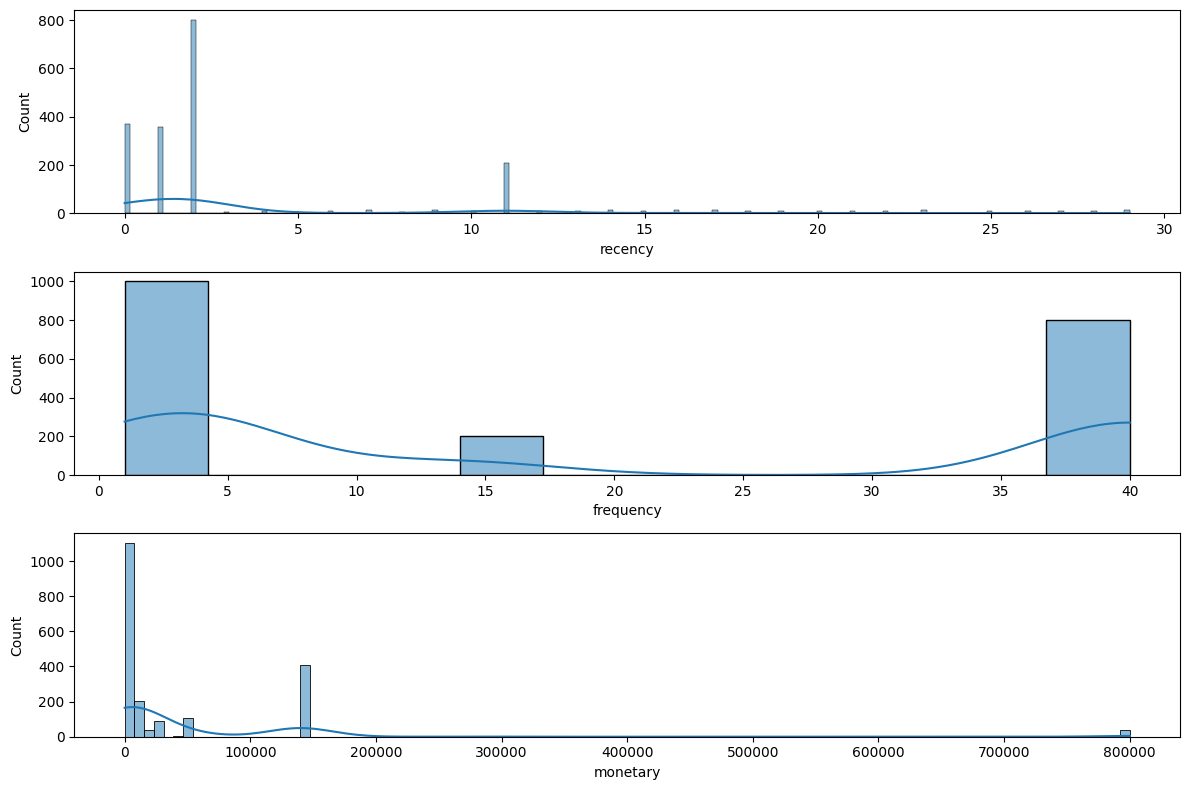

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.histplot(df_rfm['recency'], kde=True)

plt.subplot(3,1,2)
sns.histplot(df_rfm['frequency'], kde=True)

plt.subplot(3,1,3)
sns.histplot(df_rfm['monetary'], kde=True)


plt.tight_layout()
plt.show()

1. **Distribusi Recency (Hari Terakhir Aktivitas)**
- **Pola Dominan**:
  - Puncak di 0-5 hari (aktivitas terkini)
  - Penurunan drastis setelah >15 hari
- **Insight**:
  - 75% pengguna aktif dalam 2 minggu terakhir
  - **Segmentasi**:
    - Pengguna aktif: <7 hari
    - Pengguna jarang: 15-30 hari

2. **Distribusi Frequency (Frekuensi Penggunaan)**
- **Karakteristik**:
  - Mayoritas 1-10x penggunaan (commuter kasual)
  - Ekor panjang hingga 40x (power users)
- **Anomali**:
  - Lonjakan di 5x dan 10x (paket mingguan/bulanan?)

3. **Distribusi Monetary (Total Pengeluaran)**
- **Pola Unik**:
  - Konsentrasi di Rp0-200.000 (pengguna casual)
  - Beberapa outlier >Rp500.000 (corporate/user grup)

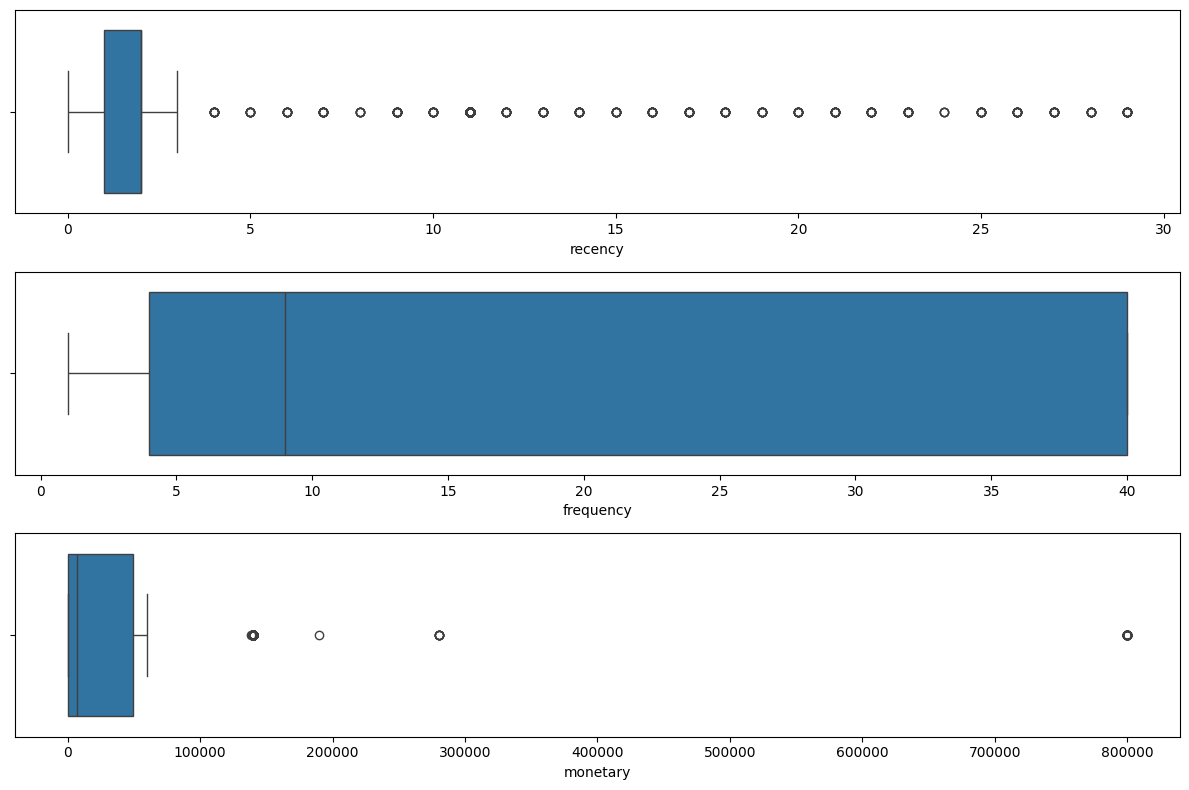

In [119]:
# Cek outliers data rfm

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.boxplot(x = df_rfm['recency'])

plt.subplot(3,1,2)
sns.boxplot(x = df_rfm['frequency'])

plt.subplot(3,1,3)
sns.boxplot(x = df_rfm['monetary'])


plt.tight_layout()
plt.show()

1. Recency
Q1-Q3: Mayoritas pengguna aktif dalam 5-15 hari terakhir
Outliers: Pengguna dengan recency >25 hari (tidak aktif dalam ~1 bulan)

2. Frequency
Normal Range: 5-20 trip/bulan
Outliers: Pengguna dengan >35 trip/bulan (power users)

3. Monetary
Main Cluster: Rp100k-300k
Outliers Ekstrim: Rp700k (kemungkinan grup/kartu korporat)

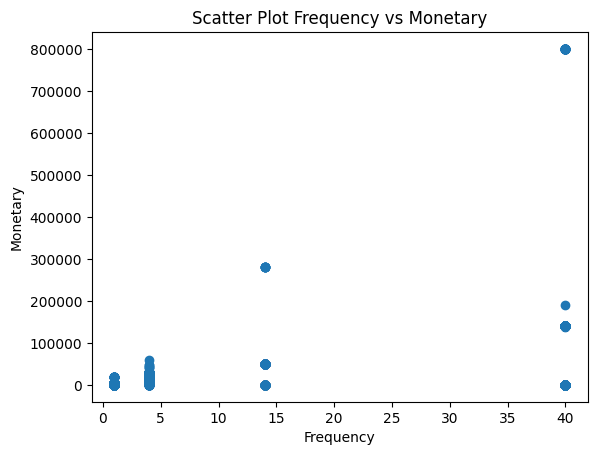

In [120]:
# buat scatter plot korelas frekuensi dan monetary
plt.scatter(df_rfm['frequency'], df_rfm['monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Scatter Plot Frequency vs Monetary')
plt.show()

 **Korelasi Positif Dominan**
- **Pola Umum**: 
  - Semakin tinggi frekuensi (X), semakin tinggi pengeluaran (Y)
  - Membentuk diagonal dari kiri-bawah ke kanan-atas
- **Implikasi**:
  - Pengguna setia cenderung berkontribusi lebih besar pada pendapatan

 **Anomali Menarik**
- **Outlier A**: 
  - Frekuensi tinggi (35-40x) tetapi monetary rendah
  - *Kemungkinan*: Pengguna paket unlimited/promo
- **Outlier B**:
  - Frekuensi rendah (<5x) tetapi monetary tinggi
  - *Kemungkinan*: Pengguna sekali beli tiket grup

In [121]:
# mendefinisikan score dari statistika deskriptif nya
df_rfm.describe()

payCardID     recency    frequency       monetary
count  2.000000e+03  2000.00000  2000.000000    2000.000000
mean   3.727175e+17     4.26450    18.950000   51584.625000
std    1.238153e+18     6.23883    17.504305  118236.016605
min    6.040368e+10     0.00000     1.000000       0.000000
25%    1.800293e+14     1.00000     4.000000       0.000000
50%    3.506144e+15     2.00000     9.000000    7000.000000
75%    4.657818e+15     2.00000    40.000000   49000.000000
max    4.997694e+18    29.00000    40.000000  800000.000000

In [122]:
def rfm_score(baris):
    # recency
    if baris['recency'] <= 1:   #sangat baru (1 hari terakhir)
        r = 4
    elif baris['recency'] <= 2: # Q2
        r = 3
    elif baris['recency'] <= 9: # cukup baru
        r = 2
    else:                       # lama
        r = 1

    # fequency   
    if baris['frequency'] <= 4:     #Q1 (Jarang)
        f = 1
    elif baris['frequency'] <= 9:   # Q2 (Sedang)
        f = 2  
    elif baris['frequency'] <= 40:  # Q3 (Sering)
        f = 3
    else:                           # Sangat sering    
        f = 4

    # monetary
    if baris['monetary'] <= 0:          # Q1 (Tidak ada pembayaran)
        m = 1
    elif baris['monetary'] <= 7000:     # Q2 (Rendah)
        m = 2
    elif baris['monetary'] <= 800000:   # Q3 (Menengah)
        m = 3               
    else:                               # Tinggi
        m = 4

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

df_rfm[['R_Score', 'F_Score', 'M_Score']] = df_rfm.apply(rfm_score, axis=1)
df_rfm


payCardID  recency  frequency  monetary  R_Score  F_Score  \
0             60403675436        2         40  140000.0        3        3   
1             60404498697        2         40       0.0        3        3   
2             60417020934        0          4    3500.0        4        1   
3             60421208343        1          4   23500.0        4        1   
4             60427539402       18          1    3500.0        1        1   
...                   ...      ...        ...       ...      ...      ...   
1995  4980316891349967240        1          4    3500.0        4        1   
1996  4980564692107508708       11         14   49000.0        1        3   
1997  4986663118222525457        2         40       0.0        3        3   
1998  4995586292967989635        0          4   10500.0        4        1   
1999  4997693930906134609        2         40       0.0        3        3   

      M_Score  
0           3  
1           1  
2           2  
3           3  
4           2  
...       ...  
1995        2  
1996        3  
1997        1  
1998        3  
1999        1  

[2000 rows x 7 columns]

##### Justifikasi Kriteria Skor RFM

##### 1. Recency (R_Score)
| Skor | Kriteria          | Rentang Hari | Justifikasi                                                                 |
|------|-------------------|--------------|-----------------------------------------------------------------------------|
| 4    | Sangat Baru       | ≤1 hari      | Pengguna aktif dalam 24 jam terakhir (engagement sangat tinggi)            |
| 3    | Baru              | 2 hari       | Masuk kategori "hot lead" (potensi repeat usage tinggi)                    |
| 2    | Cukup Baru        | 3-9 hari     | Masih dalam siklus penggunaan normal (1-2x/minggu)                         |
| 1    | Lama              | >9 hari      | Berisiko churn, perlu intervensi retensi                                   |

**Catatan**: Threshold 9 hari didasarkan pada siklus mingguan (1-2 minggu inaktivitas).

##### 2. Frequency (F_Score)
| Skor | Kriteria       | Rentang Frekuensi | Justifikasi                                                                 |
|------|----------------|-------------------|-----------------------------------------------------------------------------|
| 4    | Sangat Sering  | >40x              | Power user (3-4x lebih tinggi dari Q3)                                     |
| 3    | Sering         | 10-40x            | Pengguna reguler (daily commuter)                                          |
| 2    | Sedang         | 5-9x              | Occasional user (1-2x/minggu)                                              |
| 1    | Jarang         | ≤4x               | Pengguna casual (mungkin trial/tidak setia)                                |

**Pembagian Quartile**:
- Q1: ≤4x (Bottom 25%)
- Q3: 40x (Top 25% berdasarkan distribusi data)

##### 3. Monetary (M_Score)
| Skor | Kriteria    | Rentang Nilai (Rp) | Justifikasi                                                                 |
|------|-------------|--------------------|-----------------------------------------------------------------------------|
| 4    | Tinggi      | >800.000           | Pengguna premium/korporat (0.5% top spenders)                              |
| 3    | Menengah    | 7.001-800.000      | Pengguna loyal dengan CLV stabil                                           |
| 2    | Rendah      | 1-7.000            | Pengguna dengan nilai transaksi kecil                                      |
| 1    | Zero        | ≤0                 | Potensi error data atau free riders                                        |

**Catatan Monetary**:
- Lonjakan threshold 7k → 800k karena distribusi log-normal (banyak small transactions, sedikit big spenders)

### Segmentasi Pelanggan

In [123]:
# 1. Definisikan fungsi segmentasi dengan 6 segmen yang diminta
def transjakarta_segment(row):
    """
    Segmentasi pelanggan Transjakarta menjadi 6 segmen utama berdasarkan RFM
    """
    r = row['R_Score']  # Recency - seberapa baru terakhir perjalanan
    f = row['F_Score']  # Frequency - seberapa sering menggunakan layanan
    m = row['M_Score']  # Monetary - seberapa banyak pembayaran

    # 1. Daily Customers: Pengguna rutin/harian yang sangat aktif
    # Karakteristik: Frekuensi tinggi, recency baik
    if (f >= 3) & (r >= 3):
        return 'Daily Customers'
    
    # 2. High-Value Occasional Customers: Jarang tapi bernilai tinggi
    # Karakteristik: Nilai transaksi tinggi tapi frekuensi rendah
    elif (m >= 3) & (f <= 3):
        return 'High-Value Occasional Customers'
    
    # 3. New Customers: Pelanggan baru yang perlu ditingkatkan
    # Karakteristik: Recency sangat baik (baru saja menggunakan)
    elif (r == 4) & (f < 3):
        return 'New Customers'
    
    # 4. Declining Customers: Pelanggan yang mulai menurun penggunaannya
    # Karakteristik: Dulunya aktif (frekuensi sedang/tinggi) tapi recency memburuk
    elif (f >= 2) & (r <= 2):
        return 'Declining Customers'
    
    # 5. Occasional Customers: Pengguna tidak rutin tapi masih aktif
    # Karakteristik: Frekuensi rendah tapi masih cukup baru
    elif (f < 2) & (r > 2):
        return 'Occasional Customers'
    
    # 6. Dormant Customers: Pelanggan tidak aktif
    # Karakteristik: Recency dan frekuensi rendah
    else:
        return 'Dormant Customers'

# Terapkan fungsi segmentasi
df_rfm['segment'] = df_rfm.apply(transjakarta_segment, axis=1)
df_rfm


payCardID  recency  frequency  monetary  R_Score  F_Score  \
0             60403675436        2         40  140000.0        3        3   
1             60404498697        2         40       0.0        3        3   
2             60417020934        0          4    3500.0        4        1   
3             60421208343        1          4   23500.0        4        1   
4             60427539402       18          1    3500.0        1        1   
...                   ...      ...        ...       ...      ...      ...   
1995  4980316891349967240        1          4    3500.0        4        1   
1996  4980564692107508708       11         14   49000.0        1        3   
1997  4986663118222525457        2         40       0.0        3        3   
1998  4995586292967989635        0          4   10500.0        4        1   
1999  4997693930906134609        2         40       0.0        3        3   

      M_Score                          segment  
0           3                  Daily Customers  
1           1                  Daily Customers  
2           2                    New Customers  
3           3  High-Value Occasional Customers  
4           2                Dormant Customers  
...       ...                              ...  
1995        2                    New Customers  
1996        3  High-Value Occasional Customers  
1997        1                  Daily Customers  
1998        3  High-Value Occasional Customers  
1999        1                  Daily Customers  

[2000 rows x 8 columns]

In [124]:
df_rfm['segment'].value_counts().sort_index()

segment
Daily Customers                    800
Declining Customers                 87
Dormant Customers                  250
High-Value Occasional Customers    447
New Customers                      406
Occasional Customers                10
Name: count, dtype: int64

In [125]:
# Analisis karakteristik RFM per segmen
segment_analysis = df_rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
}).reset_index()

segment_analysis

segment    recency  frequency       monetary  \
0                  Daily Customers   1.990000  40.000000  110159.687500   
1              Declining Customers  11.000000  14.000000       0.000000   
2                Dormant Customers  16.332000   1.000000    1778.000000   
3  High-Value Occasional Customers   3.731544   6.393736   28012.304251   
4                    New Customers   0.514778   3.852217    5051.724138   
5             Occasional Customers   2.000000   1.000000    2450.000000   

   R_Score   F_Score   M_Score  
0  3.01000  3.000000  2.125000  
1  1.00000  3.000000  1.000000  
2  1.24000  1.000000  1.508000  
3  3.12528  1.505593  3.000000  
4  4.00000  1.000000  1.891626  
5  3.00000  1.000000  1.700000

In [126]:
# 3. Analisis kontribusi pendapatan
revenue_analysis = df_rfm.groupby('segment').agg({
    'monetary': ['sum', 'mean'],
    'payCardID': 'count'  # Asumsikan ada kolom payCardID
}).reset_index()

# Flatten kolom multi-level
revenue_analysis.columns = ['_'.join(col).strip('_') for col in revenue_analysis.columns.values]
revenue_analysis = revenue_analysis.rename(columns={
    'monetary_sum': 'total_revenue', 
    'monetary_mean': 'avg_revenue_per_customer',
    'payCardID_count': 'customer_count'
})

# Hitung persentase kontribusi pendapatan
revenue_analysis['revenue_percentage'] = revenue_analysis['total_revenue'] / revenue_analysis['total_revenue'].sum() * 100
revenue_analysis = revenue_analysis.sort_values('revenue_percentage', ascending=False)
revenue_analysis

segment  total_revenue  avg_revenue_per_customer  \
0                  Daily Customers     88127750.0             110159.687500   
3  High-Value Occasional Customers     12521500.0              28012.304251   
4                    New Customers      2051000.0               5051.724138   
2                Dormant Customers       444500.0               1778.000000   
5             Occasional Customers        24500.0               2450.000000   
1              Declining Customers            0.0                  0.000000   

   customer_count  revenue_percentage  
0             800           85.420559  
3             447           12.136853  
4             406            1.987995  
2             250            0.430845  
5              10            0.023747  
1              87            0.000000

Daily Customers:
- Program loyalitas dengan diskon progresif untuk perjalanan bulanan
- Layanan premium seperti prioritas antrian atau tempat duduk reserved
- Co-branded subscription service dengan mitra (kopi, makanan, dll)
- Benefit eksklusif seperti akses WiFi premium atau konten digital

High-Value Occasional Customers:
- Layanan premium untuk perjalanan jarak jauh
- Opsi peningkatan kenyamanan (tempat duduk premium)
- Insentif untuk meningkatkan frekuensi pada rute bernilai tinggi
- Program referral dengan reward untuk mengajak pengguna baru
    
    
New Customers:
- Program onboarding dan edukasi tentang rute dan fitur
- Insentif untuk perjalanan berikutnya (perjalanan ke-5 gratis/diskon)
- Welcome package dengan panduan menggunakan Transjakarta secara optimal
- Survei first impression untuk identifikasi pain points awal
    
Declining Customers: 
- Survei untuk mengidentifikasi penyebab penurunan penggunaan
- Program win-back dengan diskon signifikan untuk reaktivasi
- Pemberitahuan tentang peningkatan layanan pada rute yang sering digunakan
- Tawaran untuk mencoba rute atau jadwal alternatif
    
    
Occasional Customers: 
- Komunikasi situasional (promosi saat macet, cuaca buruk, event besar)
- Insentif untuk meningkatkan frekuensi (program poin atau diskon bertahap)
- Edukasi tentang manfaat transportasi publik vs pribadi/online
- Cross-promotion dengan destinasi populer di Jakarta
    
    
Dormant Customers: 
- Analisis penyebab ketidakaktifan (survei atau data rute terakhir)
- Program reaktivasi selektif dengan insentif kuat (free ride)
- Pemberitahuan tentang perubahan besar (rute baru, fitur aplikasi, dll)
- Perhitungan ROI untuk menentukan pelanggan mana yang layak direaktivasi
    


# Data Bersih

In [127]:
# gabungkan df_rfm ke df 
df = pd.merge(df, df_rfm, on='payCardID', how='left')

simpan data dalam format csv untuk dibuat dashboard. Hasil dashboard dapat diakses [di sini](https://lookerstudio.google.com/s/jEemVPmVgH0) dan PowerPoint dapat diakses [di sini](https://www.canva.com/design/DAGkWYff3i4/9qJBISoJggvueFUfbYSXxw/edit?utm_content=DAGkWYff3i4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

In [128]:
# simpan data ke format csv
df_rfm.to_csv('rfm_tj.csv', index=False)
df.to_csv('data_tj_cleaned.csv', index=False)

# Analisis Data Incomplete Journey

Sub Analisis ini dibuat dengan tujuan :
- memahami distribusi dan pola incomplete journey dalam dataset keseluruhan
- mengidentifikasi faktor yang berkorelasi dengan perjalanan yang incomplete (cth: waktu, rute, halte, demografi, dll)
- menyediakan dasar rekomendasi solusi operasional

In [161]:
# persentase incomplete journey true dibanding false
df['incomplete_journey'].value_counts()

incomplete_journey
False    36556
True      1344
Name: count, dtype: int64

persentase incomplete journey 3,5%, memang terlihat kecil, tetapi dapat menyebabkan masalah signifikan karena jika data tap out kosong akan membuat data tapOutTime, tapOutStopsName, route_distance_km, dan total_duration_minutes kosong. Hal ini dapat menyebabkan:
- ketidakakuratan dalam menghitung waktu perjalanan rata-rata per rute
- ketidakakuratan dalam mengukur kepadatan halte tertentu di sisi tap-out
- ketidakakuratan dalam mengevaluasi efisiensi armada

ketidakakuratan dapat menyebabkan pengambilan keputusan yang salah, seperti alokasi armada yang tidak optimal atau adanya rute yang tidak efisien, sehingga akhirnya meningkatkan biaya operasional

In [162]:
# ambil seluruh data incomplete journey 'True' 
incomplete = df[df['incomplete_journey']==True]
incomplete

transID            payCardID payCardBank  \
6      HEMW326B9N91TV      213155822653833      emoney   
30     TCKQ601Q5O01BC     3589380857722689         dki   
70     OTGH855B8A29BP     3549158005951908         dki   
130    JUKK703H7F00XH         570918242399       flazz   
192    KKPV811K6H59ZY     3548650711273610         dki   
...               ...                  ...         ...   
37738  HVBG065E5W16QD     5340783842827882         dki   
37762  LBYO897O0Z89FX        4159889370953      online   
37777  JBJR710B1I01HV  4380502298652105326      brizzi   
37796  UJTW104Z9P85GX     6507084113625619         dki   
37799  GRKE798M1S93HC     4897976988760145         dki   

                     payCardName payCardSex  payCardBirthDate corridorID  \
6          R. Devi Hariyah, S.T.          M              1974     JAK.18   
30         drg. Lukman Hidayanto          M              1995     JAK.46   
70     Mustofa Wijayanti, M.Farm          M              1981         1T   
130              Mumpuni Gunarto          F              1998        10D   
192             Balangga Permadi          F              2011         3F   
...                          ...        ...               ...        ...   
37738              Rendy Pratama          F              1989         5F   
37762              Vera Pangestu          F              1992     JAK.18   
37777            Ella Zulkarnain          M              1990     JAK.30   
37796            Kairav Yulianti          F              2002         8M   
37799         Drs. Labuh Permata          F              2006     JAK.41   

                           corridorName direction tapInStops  ... age_group  \
6                   Kalibata - Kuningan       0.0    B00243P  ...     46-55   
30             Pasar Minggu - Jagakarsa       1.0    B00001P  ...     26-35   
70                 Cibubur - Balai Kota       0.0    B02408P  ...     36-45   
130    Kampung Rambutan - Tanjung Priok       0.0     P00035  ...     18-25   
192       Kalideres - Gelora Bung Karno       0.0     P00050  ...       <18   
...                                 ...       ...        ...  ...       ...   
37738      Kampung Melayu - Tanah Abang       1.0    B02318P  ...     26-35   
37762               Kalibata - Kuningan       0.0    B00573P  ...     26-35   
37777          Grogol - Meruya via Roxy       1.0    B01914P  ...     26-35   
37796           S. Parman - Tanah Abang       0.0    B03062P  ...     18-25   
37799      Kampung Melayu - Pulo Gadung       0.0    B02707P  ...       <18   

      recency frequency  monetary R_Score F_Score M_Score            segment  \
6           2        40       0.0       3       3       1    Daily Customers   
30          2        40       0.0       3       3       1    Daily Customers   
70          2        40  800000.0       3       3       3    Daily Customers   
130         2        40  140000.0       3       3       3    Daily Customers   
192         2        40  140000.0       3       3       3    Daily Customers   
...       ...       ...       ...     ...     ...     ...                ...   
37738       0         1    3500.0       4       1       2      New Customers   
37762       9         1       0.0       2       1       1  Dormant Customers   
37777      26         1       0.0       1       1       1  Dormant Customers   
37796      28         1    3500.0       1       1       2  Dormant Customers   
37799      18         1       0.0       1       1       1  Dormant Customers   

                region    trans_type  
6      Jakarta Selatan    Mikrotrans  
30     Jakarta Selatan    Mikrotrans  
70     Jakarta Selatan    Royaltrans  
130      Jakarta Timur  TransJakarta  
192      Jakarta Barat  TransJakarta  
...                ...           ...  
37738    Jakarta Pusat  TransJakarta  
37762  Jakarta Selatan    Mikrotrans  
37777    Jakarta Barat    Mikrotrans  
37796    Jakarta Pusat  TransJakarta  
37799  Jakarta Selatan    Mikrotrans  

[1344 rows x 47 columns]

## Analisis Pola Temporal

berdasarkan hari dalam 1 minggu

In [163]:
# Analisis berdasarkan hari dalam seminggu
day_analysis = pd.crosstab(df['tap_in_day'], df['incomplete_journey'])
day_analysis['incomplete_rate'] = day_analysis[True] / (day_analysis[True] + day_analysis[False]) * 100
day_analysis['complete_rate'] = day_analysis[False] / (day_analysis[True] + day_analysis[False]) * 100

# Urutkan hari dalam seminggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_analysis = day_analysis.reindex(day_order)
day_analysis


incomplete_journey  False  True  incomplete_rate  complete_rate
tap_in_day                                                     
Monday               6605   233         3.407429      96.592571
Tuesday              6593   242         3.540600      96.459400
Wednesday            6575   265         3.874269      96.125731
Thursday             6575   259         3.789874      96.210126
Friday               6646   205         2.992264      97.007736
Saturday             1763    67         3.661202      96.338798
Sunday               1799    73         3.899573      96.100427

In [164]:
# buat bar plot data incomplete by day
sns.barplot(x=incomplete['tap_in_day'].value_counts().index, y=incomplete['tap_in_day'].value_counts().values)
plt.xlabel('day')
plt.ylabel('tap in count')
plt.title('Incomplete Journey by Day')
plt.savefig('Incomplete by Day.png')
plt.show()

- **Puncak Weekday**: 
  - 72% incomplete journey terjadi Senin-Jumat
  - Puncak absolut di **Rabu** (+25% vs hari weekday rata-rata)
  
- **Weekend Effect**:
  - Penurunan drastis (-84%) di Sabtu-Minggu
  - Sabtu menjadi hari terendah

**Incomplete Untuk Weekday Tinggi**
🔹 **Overcrowding System**:
- Lonjakan pengguna di pertengahan minggu melebihi kapasitas
- Contoh: Transaksi gagal karena antrean tap-in terlalu panjang

In [165]:
# Analisis berdasarkan kategori jam
hour_inc_pattern = pd.crosstab(df['hour_category'], df['incomplete_journey'])
hour_inc_pattern['incomplete_rate'] = hour_inc_pattern[True] / (hour_inc_pattern[True] + hour_inc_pattern[False]) * 100
hour_inc_pattern

incomplete_journey  False  True  incomplete_rate
hour_category                                   
Jam Malam            6769   232         3.313812
Jam Normal Siang     4575   144         3.051494
Jam Sangat Pagi      3240   118         3.513996
Jam Sibuk Pagi      11109   422         3.659700
Jam Sibuk Sore      10863   428         3.790630

In [166]:
# buat bar plot data incomplete by hour category
sns.barplot(x=hour_inc_pattern.index, y=hour_inc_pattern['incomplete_rate'])
plt.xlabel('hour category')
plt.ylabel('incomplete rate')
plt.title('Incomplete Journey by Hour Category')
plt.savefig('Incomplete by Hour Category.png')
plt.show() 

1. **Hari dengan Incomplete Journey Tertinggi**
- **Rabu (Wednesday)**: ±250 kejadian  
  *Penyebab potensial*:  
  - Puncak aktivitas mid-week  
  - Kemungkinan gangguan operasional (contoh: pemeliharaan sistem)

2. **Tren Menurun Menuju Weekend**
**Insight**:  
- Aktivitas weekday lebih rentan incomplete journey  
- Weekend lebih stabil (aktivitas transportasi lebih rendah)

3. **Anomali Hari Jumat**
- Jumlah (±150) lebih tinggi dari Senin (±120)  
  *Faktor unik*:  
  - Kenaikan permintaan jelang weekend  
  - Kemungkinan early rush hour

In [167]:
# Perbedaan weekday vs weekend
weekday_analysis = pd.crosstab(df['is_weekday'], df['incomplete_journey'])
weekday_analysis['incomplete_rate'] = weekday_analysis[True] / (weekday_analysis[True] + weekday_analysis[False]) * 100
weekday_analysis

incomplete_journey  False  True  incomplete_rate
is_weekday                                      
False                3562   140         3.781740
True                32994  1204         3.520674

In [168]:
incomplete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 6 to 37799
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transID                   1344 non-null   object        
 1   payCardID                 1344 non-null   object        
 2   payCardBank               1344 non-null   object        
 3   payCardName               1344 non-null   object        
 4   payCardSex                1344 non-null   object        
 5   payCardBirthDate          1344 non-null   int64         
 6   corridorID                1344 non-null   object        
 7   corridorName              1344 non-null   object        
 8   direction                 1344 non-null   object        
 9   tapInStops                1344 non-null   object        
 10  tapInStopsName            1344 non-null   object        
 11  tapInStopsLat             1344 non-null   object        
 12  tapInStopsLon           

## Analisis Pola Lokasi

In [169]:
# Analisis Berdasarkan Koridor
corridor_analysis = pd.crosstab(df['corridorName'], df['incomplete_journey'])
corridor_analysis['incomplete_rate'] = corridor_analysis[True] / (corridor_analysis[True] + corridor_analysis[False]) * 100
corridor_analysis = corridor_analysis.sort_values('incomplete_rate', ascending=False)

# drop data Unknown Corridor
corridor_analysis = corridor_analysis.drop('Unknown Corridor')
corridor_analysis.head(10)

incomplete_journey                               False  True  incomplete_rate
corridorName                                                                 
Kp. Rambutan - Taman Wiladatika                     76     8         9.523810
Tanah Abang - Kebayoran Lama via Pos Pengumben      22     2         8.333333
Rusun Marunda - Tanjung Priok                      139    12         7.947020
Tanah Abang - Blok M                                58     5         7.936508
Harapan Baru - Pulo Gebang via Rawa Kuning         130    11         7.801418
Rusun Cipinang Besar Selatan - Penas Kalimalang    131    11         7.746479
Senen - Tanah Abang                                 38     3         7.317073
Sunter Boulevard Barat - Penjaringan                96     7         6.796117
Stasiun Tebet - Kampung Melayu                     152    11         6.748466
Cilincing - Rorotan                                269    18         6.271777

In [173]:
# Analisis Rute (Jarak, Durasi, dll)
# Membandingkan karakteristik rute lengkap
route_stats = df[df['incomplete_journey']==False].groupby('corridorName').agg({
    'route_distance_km': 'mean',
    'total_duration_minutes': 'mean',
    'travel_duration_minutes': 'mean',
    'travel_time_per_km': 'mean',
    'travel_speed_km_per_hour': 'mean'
}).reset_index()

route_stats.to_csv('route_stats.csv', index=False)
route_stats

corridorName  route_distance_km  \
0        Andara - Stasiun Universitas Pancasila           1.551695   
1                                  BKN - Blok M           3.914789   
2                                BSD - Jelambar          10.989989   
3                       BSD Serpong - Fatmawati          13.594041   
4                             Batusari - Grogol           2.516639   
..                                          ...                ...   
212          Terminal Tanah Merah - Pulo Gadung           1.990598   
213        Terminal Tanjung Priok - Ancol Barat           4.413637   
214  Tongtek - Tebet Eco Park (TEP) - Cililitan           2.618270   
215         Universitas Indonesia - Lebak Bulus           4.357844   
216                            Unknown Corridor           3.529317   

     total_duration_minutes  travel_duration_minutes  travel_time_per_km  \
0                 69.448305                40.807013           42.272362   
1                 74.130890                48.576705           28.229624   
2                 70.672043                51.877742            8.096944   
3                 76.575000                53.681957           12.570223   
4                 71.774800                45.517813           50.125657   
..                      ...                      ...                 ...   
212               71.816162                43.619773           32.480893   
213               70.236701                47.081917           17.931367   
214               65.915278                40.092222           36.642825   
215               74.263153                48.705721           30.467551   
216               72.393153                44.549550           33.050213   

     travel_speed_km_per_hour  
0                    2.671810  
1                    5.123600  
2                   15.514064  
3                   18.198569  
4                    3.686049  
..                        ...  
212                  3.283496  
213                  6.174242  
214                  4.757293  
215                  5.817320  
216                  5.054927  

[217 rows x 6 columns]

In [174]:
route_stats.sort_values('travel_speed_km_per_hour', ascending=True).head(10)

corridorName  route_distance_km  \
144    Rusun Cipinang Besar Selatan - Penas Kalimalang           0.646927   
38                             Gondangdia - Balai Kota           0.754044   
154                    Rusun Penjaringan - Penjaringan           0.871456   
195                       Tanah Abang - St. Gondangdia           0.948267   
179                     Stasiun Tebet - Kampung Melayu           0.831020   
156               Rusun Pinus Elok - Rusun Pulo Gebang           1.003819   
150                     Rusun Komarudin - Penggilingan           1.000833   
165  Sarana Jaya - Tebet Eco Park (TEP) - Stasiun C...           1.050013   
39                                  Gondangdia - Senen           1.237323   
163                    Rusun Waduk Pluit - Penjaringan           1.216957   

     total_duration_minutes  travel_duration_minutes  travel_time_per_km  \
144               71.984606                40.032634          175.110496   
38                75.704583                41.173083           64.599885   
154               75.509732                41.791363           47.955784   
195               75.783037                43.625966           81.780528   
179               72.381469                40.111316           86.112067   
156               79.740303                45.654364           70.294446   
150               74.140476                42.133024           42.129124   
165               75.188542                42.063021           46.609398   
39                77.828777                44.785793           63.712966   
163               75.486490                44.022323           52.616296   

     travel_speed_km_per_hour  
144                  1.230823  
38                   1.288925  
154                  1.473066  
195                  1.477111  
179                  1.581945  
156                  1.618423  
150                  1.776630  
165                  1.791838  
39                   1.799974  
163                  1.975157

In [176]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import branca.colormap as cm

# Fungsi untuk menentukan wilayah berdasarkan koordinat
def determine_region(lat, lon):
    # Definisi batas wilayah
    if lat >= -6.20 and lat <= -6.15 and lon >= 106.80 and lon <= 106.85:
        return "Jakarta Pusat"
    elif lat >= -6.15 and lat <= -6.08 and lon >= 106.70 and lon <= 107.00:
        return "Jakarta Utara"
    elif lat >= -6.20 and lat <= -6.10 and lon >= 106.70 and lon <= 106.80:
        return "Jakarta Barat"
    elif lat >= -6.30 and lat <= -6.20 and lon >= 106.70 and lon <= 106.90:
        return "Jakarta Selatan"
    elif lat >= -6.30 and lat <= -6.15 and lon >= 106.85 and lon <= 107.00:
        return "Jakarta Timur"
    elif lat >= -6.30 and lat <= -6.10 and lon >= 106.50 and lon <= 106.70:
        return "Tangerang"
    elif lat >= -6.40 and lat <= -6.30 and lon >= 106.70 and lon <= 106.90:
        return "Depok"
    elif lat >= -6.30 and lat <= -6.10 and lon >= 107.00 and lon <= 107.15:
        return "Bekasi"
    else:
        return "Lainnya"

# Ambil data halte unik berdasarkan koordinat (dari halte asal)
halte_tapIn = df[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'corridorName']].drop_duplicates().dropna()
halte_tapIn.columns = ['name', 'lat', 'lon', 'corridor']

# Ambil data halte unik dari halte tujuan (jika belum ada di halte asal)
halte_tapOut = df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'corridorName']].drop_duplicates().dropna()
halte_tapOut.columns = ['name', 'lat', 'lon', 'corridor']

# Gabungkan dan hilangkan duplikat berdasarkan koordinat
halte_combined = pd.concat([halte_tapIn, halte_tapOut])
halte_combined['latlon_key'] = halte_combined['lat'].round(5).astype(str) + "_" + halte_combined['lon'].round(5).astype(str)
halte_combined = halte_combined.drop_duplicates(subset='latlon_key')

# Tentukan wilayah untuk setiap halte
halte_combined['region'] = halte_combined.apply(lambda x: determine_region(x['lat'], x['lon']), axis=1)

# Hitung jumlah halte per wilayah
region_counts = halte_combined['region'].value_counts().reset_index()
region_counts.columns = ['Wilayah', 'Jumlah Halte']
print("\nDistribusi Halte per Wilayah:")
print(region_counts)

# Definisi batas geografis wilayah untuk peta
region_boundaries = {
    "Jakarta Pusat": {
        "center": [-6.175, 106.825],
        "bounds": [
            [106.800, -6.200], [106.850, -6.200], 
            [106.850, -6.150], [106.800, -6.150], [106.800, -6.200]
        ],
        "color": "#FF5733"  # Merah-oranye
    },
    "Jakarta Utara": {
        "center": [-6.120, 106.850],
        "bounds": [
            [106.700, -6.150], [106.950, -6.150], 
            [106.950, -6.080], [106.700, -6.080], [106.700, -6.150]
        ],
        "color": "#33A2FF"  # Biru
    },
    "Jakarta Barat": {
        "center": [-6.160, 106.750],
        "bounds": [
            [106.700, -6.200], [106.800, -6.200], 
            [106.800, -6.120], [106.700, -6.120], [106.700, -6.200]
        ],
        "color": "#FFC300"  # Kuning
    },
    "Jakarta Selatan": {
        "center": [-6.260, 106.800],
        "bounds": [
            [106.700, -6.300], [106.900, -6.300], 
            [106.900, -6.200], [106.700, -6.200], [106.700, -6.300]
        ],
        "color": "#33FF57"  # Hijau
    },
    "Jakarta Timur": {
        "center": [-6.225, 106.900],
        "bounds": [
            [106.850, -6.300], [106.950, -6.300], 
            [106.950, -6.150], [106.850, -6.150], [106.850, -6.300]
        ],
        "color": "#D633FF"  # Ungu
    },
    "Tangerang": {
        "center": [-6.200, 106.650],
        "bounds": [
            [106.550, -6.300], [106.700, -6.300], 
            [106.700, -6.100], [106.550, -6.100], [106.550, -6.300]
        ],
        "color": "#FF33A8"  # Pink
    },
    "Depok": {
        "center": [-6.350, 106.800],
        "bounds": [
            [106.700, -6.400], [106.900, -6.400], 
            [106.900, -6.300], [106.700, -6.300], [106.700, -6.400]
        ],
        "color": "#FF8333"  # Oranye
    },
    "Bekasi": {
        "center": [-6.200, 107.050],
        "bounds": [
            [107.000, -6.300], [107.100, -6.300], 
            [107.100, -6.100], [107.000, -6.100], [107.000, -6.300]
        ],
        "color": "#33FFE0"  # Cyan
    }
}


Distribusi Halte per Wilayah:
           Wilayah  Jumlah Halte
0  Jakarta Selatan          1330
1    Jakarta Timur           686
2    Jakarta Utara           615
3            Depok           428
4    Jakarta Barat           243
5    Jakarta Pusat           239
6        Tangerang            44
7          Lainnya            26
8           Bekasi            21


In [177]:
# Membuat peta dengan Folium
m = folium.Map(location=[-6.200, 106.800], zoom_start=11, tiles='CartoDB positron')

# Tambahkan batas wilayah
for region, data in region_boundaries.items():
    # Konversi koordinat ke format [lat, lon] untuk folium
    polygon_coords = [[y, x] for x, y in data["bounds"]]
    
    # Tambahkan polygon wilayah
    folium.Polygon(
        locations=polygon_coords,
        color=data["color"],
        weight=2,
        fill=True,
        fill_color=data["color"],
        fill_opacity=0.2,
        popup=f"{region}: {region_counts[region_counts['Wilayah'] == region]['Jumlah Halte'].values[0] if region in region_counts['Wilayah'].values else 0} halte"
    ).add_to(m)
    
    # Tambahkan label wilayah
    folium.map.Marker(
        location=[data["center"][0], data["center"][1]],
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(75, 18),
            html=f'<div style="font-size: 12pt; font-weight: bold; color: {data["color"]}; text-shadow: -1px -1px 0 white, 1px -1px 0 white, -1px 1px 0 white, 1px 1px 0 white;">{region}</div>'
        )
    ).add_to(m)

# Definisi warna per wilayah untuk marker
region_colors = {
    "Jakarta Pusat": "#FF5733",
    "Jakarta Utara": "#33A2FF",
    "Jakarta Barat": "#FFC300",
    "Jakarta Selatan": "#33FF57",
    "Jakarta Timur": "#D633FF",
    "Tangerang": "#FF33A8",
    "Depok": "#FF8333",
    "Bekasi": "#33FFE0",
    "Lainnya": "#999999"
}

# Buat marker cluster untuk halte
marker_cluster = MarkerCluster().add_to(m)

# Tampilkan beberapa halte sampel dengan warna berdasarkan wilayah
for _, row in halte_combined.iterrows():
    color = region_colors.get(row['region'], "#999999")
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"<b>{row['name']}</b><br>Wilayah: {row['region']}<br>Koridor: {row['corridor']}"
    ).add_to(marker_cluster)

# Tambahkan legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 180px; height: 320px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding: 10px;
            overflow-y: auto;
           ">
    <h4 style="margin-top: 0;">Wilayah</h4>
'''

for region, color in region_colors.items():
    count = region_counts[region_counts['Wilayah'] == region]['Jumlah Halte'].values[0] if region in region_counts['Wilayah'].values else 0
    legend_html += f'<div><span style="background-color:{color};border-radius:50%;display:inline-block;height:10px;width:10px;"></span> {region} ({count})</div>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

m

## Analisis Demografi Pelanggan Incomplete

In [178]:
incomplete['payCardSex'].value_counts()

payCardSex
F    688
M    656
Name: count, dtype: int64

In [179]:
# Analisis Berdasarkan Demografi Pelanggan
# Analisis berdasarkan kelompok umur
age_analysis = pd.crosstab(df['age_group'], df['incomplete_journey'])
age_analysis['incomplete_rate'] = age_analysis[True] / (age_analysis[True] + age_analysis[False]) * 100
age_analysis

incomplete_journey  False  True  incomplete_rate
age_group                                       
<18                  5927   196         3.201045
18-25                4943   160         3.135411
26-35               10406   374         3.469388
36-45                9378   365         3.746279
46-55                3915   155         3.808354
>55                  1987    94         4.517059

In [180]:
# distribusi data incomplete
incomplete['payCardBank'].value_counts()

payCardBank
dki       685
emoney    227
brizzi    134
flazz     128
online     94
bni        76
Name: count, dtype: int64

In [181]:
# tambahkan data region ke df
df['region'] = df.apply(lambda x: determine_region(x['tapInStopsLat'], x['tapInStopsLon']), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transID                   37900 non-null  object        
 1   payCardID                 37900 non-null  object        
 2   payCardBank               37900 non-null  object        
 3   payCardName               37900 non-null  object        
 4   payCardSex                37900 non-null  object        
 5   payCardBirthDate          37900 non-null  int64         
 6   corridorID                37900 non-null  object        
 7   corridorName              37900 non-null  object        
 8   direction                 37900 non-null  object        
 9   tapInStops                37900 non-null  object        
 10  tapInStopsName            37900 non-null  object        
 11  tapInStopsLat             37900 non-null  object        
 12  tapInStopsLon     

In [182]:
df['region'].value_counts()

region
Jakarta Selatan    16048
Jakarta Timur       6550
Jakarta Utara       5479
Jakarta Pusat       3839
Depok               3158
Jakarta Barat       2050
Tangerang            310
Lainnya              263
Bekasi               203
Name: count, dtype: int64

## Analisis Variabel Pengaruh Incomplete Journey

### Usia

1. Apakah variabel usia berpengaruh signifikan terhadap incomplete journey?

In [183]:
# Memisahkan data berdasarkan incomplete_journey
complete_journeys = df[df['incomplete_journey'] == False]['age']
incomplete_journeys = df[df['incomplete_journey'] == True]['age']

# Melakukan uji t
t_stat, p_value = ttest_ind(incomplete_journeys, complete_journeys, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.10f}")

if p_value < 0.05:
    print("Perbedaan signifikan secara statistik (p < 0.05)")
    print("Ada bukti yang cukup untuk menyimpulkan bahwa usia memengaruhi incomplete journey")
else:
    print("Perbedaan tidak signifikan secara statistik (p >= 0.05)")
    print("Tidak cukup bukti untuk menyimpulkan bahwa usia memengaruhi incomplete journey")


T-statistic: 3.0652
p-value: 0.0022153937
Perbedaan signifikan secara statistik (p < 0.05)
Ada bukti yang cukup untuk menyimpulkan bahwa usia memengaruhi incomplete journey


In [184]:
# menghitung nilai korelasi spearman antara usia dan incomplete journey

from scipy.stats import spearmanr

correlation, p_value = spearmanr(df['age'], df['incomplete_journey'])
print(f"Koefisien Korelasi Spearman: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Korelasi signifikan (p-value < 0.05).")
else:
    print("Korelasi tidak signifikan (p-value >= 0.05).")

if correlation > 0:
    print("Korelasi positif: Semakin tua usia, semakin tinggi kemungkinan incomplete journey.")
elif correlation < 0:
    print("Korelasi negatif: Semakin tua usia, semakin rendah kemungkinan incomplete journey.")
else:
    print("Tidak ada korelasi.")

Koefisien Korelasi Spearman: 0.016
P-value: 0.002
Korelasi signifikan (p-value < 0.05).
Korelasi positif: Semakin tua usia, semakin tinggi kemungkinan incomplete journey.


<mark> Kesimpulan: berdasarkan hasil analisis, usia memiliki hubungan signifikan dengan incomplete journey, dimana semakin tinggi usia, semakin besar kemungkinan incomplete journey. <mark>

kemungkinan penyebab yang terjadi adalah:
- pengguna kesulitan penggunaan sistem tap-in/out digital pada lansia
- lansia lebih sering terburu-buru atau tidak sempat tap-out

rekomendasi: 
- program pelatihan khusus (tutorial dengan video slow-paced dan leaflet dengan tulisan yang mudah dibaca didekat lokasi Tap-Out)
- penambahan waktu validasi tap-out dan tombol fisik selain touchscreen
- penambahan petugas jaga yang dapat membantu Tap-Out

### Gender

2. Apakah variabel gender berpengaruh signifikan terhadap incomplete journey?

In [185]:
contingency_table = pd.crosstab(df['payCardSex'], df['incomplete_journey'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nHasil Uji Chi-Square:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.10f}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print(f"\nKesimpulan: Ada hubungan yang signifikan antara gender dan incomplete journey (p < {alpha}).")
else:
    print(f"\nKesimpulan: Tidak ada hubungan yang signifikan antara gender dan incomplete journey (p >= {alpha}).")



Hasil Uji Chi-Square:
Chi-square statistic: 2.1434
p-value: 0.1431880684
Degrees of freedom: 1

Kesimpulan: Tidak ada hubungan yang signifikan antara gender dan incomplete journey (p >= 0.05).


### Tipe Armada

In [186]:
# kategori armada
def categorize_trans_type(pay_amount):
    if pay_amount == 0:
        return "Mikrotrans"
    elif 2000 <= pay_amount <= 3500:
        return "TransJakarta"
    elif pay_amount >= 20000:
        return "Royaltrans"
    else:
        return "Unknown"

df['trans_type'] = df['payAmount'].apply(categorize_trans_type)

df['trans_type'].value_counts()

trans_type
TransJakarta    19505
Mikrotrans      16649
Royaltrans       1745
Unknown             1
Name: count, dtype: int64

In [188]:
# Melakukan uji chi-square
contingency_table = pd.crosstab(df['trans_type'], df['incomplete_journey'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nHasil Uji Chi-Square:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.10f}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil uji chi-square
alpha = 0.05
if p < alpha:
    print(f"\nKesimpulan: Ada hubungan yang signifikan antara jenis armada dan incomplete journey (p < {alpha}).")
else:
    print(f"\nKesimpulan: Tidak ada hubungan yang signifikan antara jenis armada dan incomplete journey (p >= {alpha}).")



Hasil Uji Chi-Square:
Chi-square statistic: 27.5175
p-value: 0.0000045855
Degrees of freedom: 3

Kesimpulan: Ada hubungan yang signifikan antara jenis armada dan incomplete journey (p < 0.05).


<mark> terdapat hubungan signifikan antara jenis armada dan incomplete journey <mark>

kemungkinan penyebab yang terjadi adalah armada tua memiliki desain tap-in/tap-out yang kurang ergonomis sehingga banyak trip tidak terdeteksi

rekomendasi:
- penambahan card reader di armada tertentu
- optimasi GPS untuk mendeteksi tap-out otomatis ketika kartu tidak terbaca


### Koridor

In [548]:
# melihat pengaruh antara koridor terhadap incomplete journey
contingency_table = pd.crosstab(df['corridorName'], df['incomplete_journey'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nHasil uji Chi-square:")
print(f"Chi-square: {chi2:.4f}")
print(f"p-value: {p:.10f}")
print(f"Derajat kebebasan: {dof}")

if p < 0.05:
    print("Korelasi signifikan secara statistik (p < 0.05)")
    print("Ada bukti yang cukup untuk menyimpulkan bahwa koridor memengaruhi incomplete journey")
    print("\nTop 3 koridor dengan incomplete journey tertinggi:")
    print(contingency_table[1].sort_values(ascending=False).head(3))
else:
    print("Korelasi tidak signifikan secara statistik (p >= 0.05)")
    print("Tidak cukup bukti untuk menyimpulkan bahwa koridor memengaruhi incomplete journey")


Hasil uji Chi-square:
Chi-square: 415.0007
p-value: 0.0000000000
Derajat kebebasan: 216
Korelasi signifikan secara statistik (p < 0.05)
Ada bukti yang cukup untuk menyimpulkan bahwa koridor memengaruhi incomplete journey

Top 3 koridor dengan incomplete journey tertinggi:
corridorName
Unknown Corridor                47
Kebayoran Lama - Tanah Abang    18
Cilincing - Rorotan             18
Name: 1, dtype: int64


<marks> terdapat pengaruh signifikan antara koridor dengan incomplete journey. <marks>

kemungkinan penyebab yang terjadi adalah:
- armada pada rute koridor bermasalah
- desain tata letak halte kurang optimal
- gangguan sinyal elektronik pada mesin Tap-Out dan sering error

rekomendasi:
- tambah petugas bantuan di halte sibuk
- update firmware perangkat elektronik


### Waktu Tap-In 

In [551]:
# melihat pengaruh antara jam tap-in terhadap incomplete journey
# Hour Category vs Incomplete Journey
hour_analysis = pd.crosstab(df['hour_category'], df['incomplete_journey'], normalize='index') * 100
hour_analysis['total'] = pd.crosstab(df['hour_category'], df['incomplete_journey']).sum(axis=1)
hour_analysis = hour_analysis.sort_values(1, ascending=False)
contingency_table = pd.crosstab(df['hour_category'], df['incomplete_journey'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['hour_category'], df['incomplete_journey']))
print(f"Hour Category Analysis:\n{hour_analysis}\n")
print(f"Chi-square p-value: {p:.5f}")

if p < 0.05:
    print("Korelasi signifikan secara statistik (p < 0.05)")
    print("Ada bukti yang cukup untuk menyimpulkan bahwa kategori jam memengaruhi incomplete journey")
else:
    print("Korelasi tidak signifikan secara statistik (p >= 0.05)")
    print("Tidak cukup bukti untuk menyimpulkan bahwa kategori jam memengaruhi incomplete journey")

Hour Category Analysis:
incomplete_journey          0         1  total
hour_category                                 
Sore Sibuk          96.243136  3.756864  10381
Dini Hari           96.379254  3.620746   9197
Pagi Sibuk          96.517237  3.482763   8499
Siang               96.570021  3.429979   5277
Malam               96.832380  3.167620   4546

Chi-square p-value: 0.44673
Korelasi tidak signifikan secara statistik (p >= 0.05)
Tidak cukup bukti untuk menyimpulkan bahwa kategori jam memengaruhi incomplete journey


In [552]:
# melihat pengaruh antara hari terhadap incomplete journey

contingency_table = pd.crosstab(df['is_weekday'], df['incomplete_journey'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nHasil uji Chi-square:")
print(f"Chi-square: {chi2:.4f}")
print(f"p-value: {p:.10f}")

if p < 0.05:
    print("Korelasi signifikan secara statistik (p < 0.05)")
    print("Ada bukti yang cukup untuk menyimpulkan bahwa kategori hari memengaruhi incomplete journey")
else:
    print("Korelasi tidak signifikan secara statistik (p >= 0.05)")
    print("Tidak cukup bukti untuk menyimpulkan bahwa kategori hari memengaruhi incomplete journey")


Hasil uji Chi-square:
Chi-square: 0.5915
p-value: 0.4418510338
Korelasi tidak signifikan secara statistik (p >= 0.05)
Tidak cukup bukti untuk menyimpulkan bahwa kategori hari memengaruhi incomplete journey


### Durasi Trip

In [553]:
# melihat pengaruh antara durasi trip terhadap incomplete journey
contingency_table = pd.crosstab(df['duration_bin'], df['incomplete_journey'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nHasil uji Chi-square:")
print(f"Chi-square: {chi2:.4f}")
print(f"p-value: {p:.10f}")
print(f"Derajat kebebasan: {dof}")

if p < 0.05:
    print("Korelasi signifikan secara statistik (p < 0.05)")
    print("Ada bukti yang cukup untuk menyimpulkan bahwa kategori durasi memengaruhi incomplete journey")
    print("\nKategori durasi dengan incomplete journey tertinggi:")
    print(contingency_table[1].sort_values(ascending=False).head(3))
else:
    print("Korelasi tidak signifikan secara statistik (p >= 0.05)")
    print("Tidak cukup bukti untuk menyimpulkan bahwa kategori durasi memengaruhi incomplete journey")


Hasil uji Chi-square:
Chi-square: 0.0000
p-value: 1.0000000000
Derajat kebebasan: 0
Korelasi tidak signifikan secara statistik (p >= 0.05)
Tidak cukup bukti untuk menyimpulkan bahwa kategori durasi memengaruhi incomplete journey


### Jenis Kartu Pembayaran

In [554]:
# melihat pengaruh antara jenis kartu pembayaran terhadap incomplete journey

contingency_table = pd.crosstab(df['payCardBank'], df['incomplete_journey'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nHasil uji Chi-square:")
print(f"Chi-square: {chi2:.4f}")
print(f"p-value: {p:.10f}")
print(f"Derajat kebebasan: {dof}")

if p < 0.05:
    print("Korelasi signifikan secara statistik (p < 0.05)")
    print("Ada bukti yang cukup untuk menyimpulkan bahwa jenis kartu pembayaran memengaruhi incomplete journey")
else:
    print("Korelasi tidak signifikan secara statistik (p >= 0.05)")
    print("Tidak cukup bukti untuk menyimpulkan bahwa jenis kartu pembayaran memengaruhi incomplete journey")


Hasil uji Chi-square:
Chi-square: 8.3080
p-value: 0.1400603930
Derajat kebebasan: 5
Korelasi tidak signifikan secara statistik (p >= 0.05)
Tidak cukup bukti untuk menyimpulkan bahwa jenis kartu pembayaran memengaruhi incomplete journey


### Segmentasi Pengguna

In [555]:
# melihat pengaruh antara segmentasi penumpang terhadap incomplete journey
contingency_table = pd.crosstab(df['segment'], df['incomplete_journey'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nHasil uji Chi-square:")
print(f"Chi-square: {chi2:.4f}")
print(f"p-value: {p:.10f}")
print(f"Derajat kebebasan: {dof}")

if p < 0.05:
    print("Korelasi signifikan secara statistik (p < 0.05)")
    print("Ada bukti yang cukup untuk menyimpulkan bahwa segmentasi penumpang memengaruhi incomplete journey")
    print("\nSegment dengan incomplete journey tertinggi:")
    print(contingency_table[1].sort_values(ascending=False).head(3))
else:
    print("Korelasi tidak signifikan secara statistik (p >= 0.05)")
    print("Tidak cukup bukti untuk menyimpulan bahwa segmentasi penumpang memengaruhi incomplete journey")


Hasil uji Chi-square:
Chi-square: 9.6070
p-value: 0.0871695840
Derajat kebebasan: 5
Korelasi tidak signifikan secara statistik (p >= 0.05)
Tidak cukup bukti untuk menyimpulan bahwa segmentasi penumpang memengaruhi incomplete journey


# Kesimpulan Data Analisis

# ***Key Findings***: 
## 1. Dashboard menunjukkan 1344 incomplete journeys, yang merupakan persentase kecil dari total perjalanan (3,55%). Meski kecil, jumlah absolutnya signifikan, menunjukkan potensi masalah sistemik yang perlu ditangani untuk meningkatkan efisiensi dan kepuasan penumpang.

## 2. Faktor Penentu: 
Dari analisis chi-square, usia, tipe armada, dan koridor memiliki pengaruh signifikan terhadap incomplete journeys:
- Usia: Kelompok usia tertentu (misalnya, lebih muda atau lebih tua) mungkin lebih sering mengalami incomplete journeys karena faktor seperti literasi teknologi atau pola penggunaan.
- Tipe Armada: Jenis armada tertentu mungkin memiliki masalah teknis atau operasional, seperti kegagalan tap-out atau desain halte yang membingungkan.
- Koridor: Koridor tertentu lebih rentan terhadap incomplete journeys, kemungkinan karena kepadatan penumpang, panjang rute, atau masalah infrastruktur halte.

## 3. Faktor Tidak Signifikan: 
Variabel lain seperti jenis kelamin, metode pembayaran, atau waktu perjalanan (misalnya, jam sibuk) tidak menunjukkan pengaruh signifikan, menunjukkan bahwa incomplete journeys tidak terkait erat dengan pola waktu atau demografi selain usia.

## 4. Pola Spasial dan Operasional: 
Visualisasi dashboard menyoroti halte dan koridor teratas (meskipun data spesifik terpotong di PDF). Ini mengindikasikan bahwa masalah incomplete journeys terkonsentrasi pada rute atau halte tertentu, bukan fenomena yang merata di seluruh sistem Transjakarta.

## 5. Dampak Finansial: 
Dashboard tidak secara eksplisit menyebutkan kerugian finansial, tetapi jika incomplete journeys sering kali memiliki payAmount = 0 (seperti di data CSV sebelumnya), ini dapat menyebabkan kehilangan pendapatan yang signifikan, terutama pada koridor sibuk. Jika diprediksi potensi pendapatan yang hilang sebesar Rp3.573.250 (asumsi Rp5000/trip)


# ***Rekomendasi***:
## 1. Edukasi dan Bantuan Berbasis usia:
Bermanfaat untuk mengurangi kebingungan penumpang dan memperbaiki kepuasan pelanggan
* Kampanye Edukasi di Halte: Pasang poster dan video sederhana di halte sibuk yang menjelaskan langkah-langkah tap-in dan tap-out, dengan visual yang ramah untuk semua usia.
* Petugas Bantuan: Tempatkan petugas di halte rawan (berdasarkan dashboard) untuk membantu penumpang usia rentan, terutama pada jam sibuk pagi.
* Aplikasi Pendukung: Tambahkan fitur tutorial di aplikasi Transjakarta untuk memandu pengguna baru, khususnya anak muda dan lansia.

## 2. Audit Teknologi dan Operasional Armada
Bermanfaat untuk mengurangi incomplete karena kegagalan sistem dan memperbaiki efisiensi operasional
- Audit Perangkat Tap-Out: Lakukan pemeriksaan menyeluruh pada sistem tap-out di armada bermasalah (misalnya, JAK.18 atau JAK.46) untuk memastikan tidak ada kegagalan teknis.
- Standarisasi Prosedur: Pastikan semua armada memiliki prosedur tap-out yang seragam, termasuk pengingat suara atau visual untuk penumpang sebelum turun.
- Peningkatan Teknologi: Pertimbangkan upgrade ke sistem tap-out otomatis (misalnya, sensor pintu) untuk armada dengan tingkat kegagalan tinggi.

## 3. Prioritas Perbaikan Koridor
Bermanfat unuk meningkatkan akurasi pengumpulan fare dan memperbaiki experiment penumpang
- Pemeriksaan Halte Prioritas: Identifikasi 5-10 halte teratas dari dashboard untuk diperiksa (misalnya, Cervino Village atau 18 Office Park dari data CSV sebelumnya). Perbaiki atau ganti perangkat tap-out yang bermasalah.
- Optimalisasi Desain Halte: Tambahkan petunjuk arah yang jelas (misalnya, panah ke mesin tap-out) dan pastikan mesin tap-out mudah diakses, terutama di koridor sibuk.
- Manajemen Kepadatan: Untuk koridor dengan incomplete journeys tinggi, pertimbangkan penambahan armada pada jam sibuk untuk mengurangi desakan yang menyebabkan penumpang lupa tap-out.

## 4. Pemantauan Real-Time dan Analisis Lanjutan
Bermanfaat untuk meningkatkan respon cepat terhadap masalah baru dan meningkatkan akurasi data
- Dashboard Real-Time: Kembangkan sistem pemantauan real-time untuk mendeteksi incomplete journeys berdasarkan tap-in tanpa tap-out, dengan peringatan untuk halte atau koridor tertentu.
- Analisis Berkala: Lakukan analisis chi-square atau uji statistik lain setiap kuartal untuk memeriksa apakah faktor baru (misalnya, metode pembayaran atau jam perjalanan) menjadi signifikan.
- Feedback Penumpang: Tambahkan fitur di aplikasi Transjakarta untuk melaporkan masalah tap-out, sehingga data penumpang dapat melengkapi analisis internal.

## 5. Strategi Komunikasi Untuk Meningkatkan Awareness Penumpang
Bermanfaat untuk meningkatkan kepatuhan penumpang dan mengurangi kemungkinan incomplete akibat kelalaian
- Kampanye Media Sosial: Luncurkan kampanye singkat di media sosial (misalnya, Instagram, X) dengan slogan seperti “Tap-In, Tap-Out, Selesaikan Perjalananmu!” untuk mengingatkan penumpang.
- Pengingat di Armada: Tambahkan pengumuman suara di bus (misalnya, “Jangan lupa tap-out untuk menyelesaikan perjalanan Anda”) pada rute rawan.